In [53]:
import wandb
import pandas as pd

wandb.login()

True

In [63]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v7_hp_sweepHP_sweep'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    val_class_metrics = run.history(samples=1000, keys=['epoch','val_num_dead_features','val_loss','val_l1_loss','val_l2_loss','val_l0_norm','val_l1_norm','val_aux_loss'])
    train_metrics = run.history(samples=1000, keys=['epoch','train_num_dead_features','train_loss','train_l1_loss','train_l2_loss','train_l0_norm','train_l1_norm','train_aux_loss'])
    # print(f'{val_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not val_class_metrics.empty) and (not train_metrics.empty):
        val_class_metrics.loc[0,'epoch'] = -1
        metrics = pd.merge(left=val_class_metrics.drop(columns='_step'), right=train_metrics.drop(columns='_step'), on='epoch', how='outer')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'],run.config['cfg']['num_workers'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','num_workers','epoch']

metrics

Metrics                                                epoch  \
dict_size topk topk_aux aux_penalty num_workers epoch          
512       16   16       0.01        16          0         -1   
                                                1          0   
                                                2          1   
                        0.10        16          0         -1   
                                                1          0   
...                                                      ...   
          24   32       0.01        16          74        73   
                                                75        74   
                                                76        75   
                                                77        76   
                                                78        77   

Metrics                                                val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch                          
512       16   16       0.01        16          0                  77.179550   
                                                1                   7.633723   
                                                2                  35.285564   
                        0.10        16          0                  77.179550   
                                                1                   3.355665   
...                                                                      ...   
          24   32       0.01        16          74                447.242462   
                                                75                446.962372   
                                                76                447.682281   
                                                77                447.014374   
                                                78                447.748627   

Metrics                                                  val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch               
512       16   16       0.01        16          0      177.318512   
                                                1       15.272491   
                                                2        7.366134   
                        0.10        16          0      192.664856   
                                                1       16.876232   
...                                                           ...   
          24   32       0.01        16          74       0.430441   
                                                75       0.430383   
                                                76       0.430358   
                                                77       0.430262   
                                                78       0.430196   

Metrics                                                val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
512       16   16       0.01        16          0                0   
                                                1                0   
                                                2                0   
                        0.10        16          0                0   
                                                1                0   
...                                                            ...   
          24   32       0.01        16          74               0   
                                                75               0   
                                                76               0   
                                                77               0   
                                                78               0   

Metrics                                                val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
512       16   16       0.01        16          0       175.613373   
                                                1        15.122019   
                                     

In [64]:
metrics.to_csv('./v7_hp_sweepHP_sweep-Training_traces.csv')

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v7_hp_sweepHP_sweep-Training_traces.csv',index_col=[0,1,2,3,4,5,6,7], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                                                                val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 val_num_dead_features               
512       16   16       0.01        16          0     -1      77.179550              177.318512   
                                                1      0      7.633723                15.272491   
                                                2      1      35.285564                7.366134   
                        0.10        16          0     -1      77.179550              192.664856   
                                                1      0      3.355665                16.876232   
...                                                                                         ...   
          24   32       0.01        16          74     73     447.242462               0.430441   
                                                75     74     446.962372               0.430383   
                                                76     75     447.682281               0.430358   
                                                77     76     447.014374               0.430262   
                                                78     77     447.748627               0.430196   

Metrics                                                                              val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 val_num_dead_features                
512       16   16       0.01        16          0     -1      77.179550                        0   
                                                1      0      7.633723                         0   
                                                2      1      35.285564                        0   
                        0.10        16          0     -1      77.179550                        0   
                                                1      0      3.355665                         0   
...                                                                                          ...   
          24   32       0.01        16          74     73     447.242462                       0   
                                                75     74     446.962372                       0   
                                                76     75     447.682281                       0   
                                                77     76     447.014374                       0   
                                                78     77     447.748627                       0   

Metrics                                                                              val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 val_num_dead_features                
512       16   16       0.01        16          0     -1      77.179550               175.613373   
                                                1      0      7.633723                 15.122019   
                                                2      1      35.285564                 7.295802   
                        0.10        16          0     -1      77.179550               175.613373   
                                                1      0      3.355665                 15.363020   
...                                                                                          ...   
          24   32       0.01        16          74     73     447.242462                0.426196   
                                                75     74     446.962372                0.426141   
                                                76     75     447.682281                0.426057   
                                                77     76     447.014374                0.426007   
                                                78     77     447.748627                0.425961   

Metrics                                                                              val_l0_norm  \
dict_size 

In [96]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ') for col in to_plot.columns]
to_plot['val live features'] = to_plot['dict size'] - to_plot['val num dead features']
to_plot['train live features'] = to_plot['dict size'] - to_plot['train num dead features']
display(to_plot)

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,val num dead features,val loss,val l1 loss,...,val aux loss,train num dead features,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features
0,512,16,16,0.01,16,0,-1,77.179550,177.318512,0,...,1.705151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.820450,NaN
1,512,16,16,0.01,16,1,0,7.633723,15.272491,0,...,0.150472,12.853321,35.105904,0.0,34.759182,16.0,258.195618,0.346705,504.366277,499.146679
2,512,16,16,0.01,16,2,1,35.285564,7.366134,0,...,0.070331,4.881828,10.863183,0.0,10.757610,16.0,278.734039,0.105563,476.714436,507.118172
3,512,16,16,0.10,16,0,-1,77.179550,192.664856,0,...,17.051516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,434.820450,NaN
4,512,16,16,0.10,16,1,0,3.355665,16.876232,0,...,1.513206,9.295724,38.128761,0.0,34.899963,16.0,257.251770,3.228779,508.644335,502.704276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,512,24,32,0.01,16,74,73,447.242462,0.430441,0,...,0.004246,446.792603,0.429060,0.0,0.424815,24.0,279.017548,0.004245,64.757538,65.207397
1235,512,24,32,0.01,16,75,74,446.962372,0.430383,0,...,0.004242,447.402863,0.428991,0.0,0.424750,24.0,279.009277,0.004242,65.037628,64.597137
1236,512,24,32,0.01,16,76,75,447.682281,0.430358,0,...,0.004301,446.964935,0.428935,0.0,0.424686,24.0,279.002808,0.004249,64.317719,65.035065
1237,512,24,32,0.01,16,77,76,447.014374,0.430262,0,...,0.004255,447.374969,0.428872,0.0,0.424624,24.0,278.993835,0.004249,64.985626,64.625031


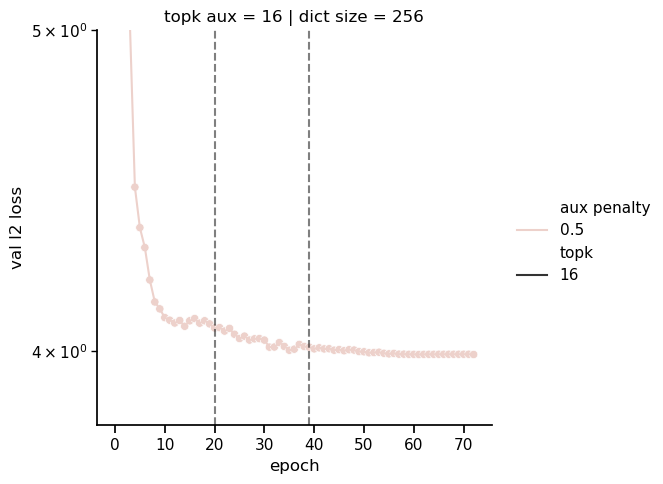

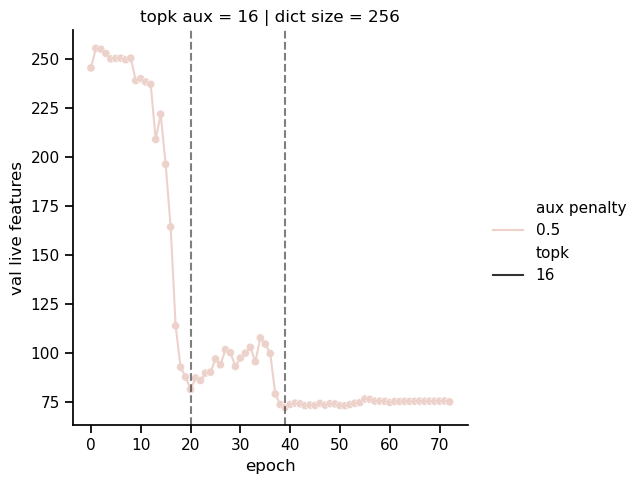

In [113]:
test_cols = ['val l2 loss','val live features']

sel_df = to_plot[(to_plot['dict size'] == 256) & (to_plot['topk aux'] == 16) & (to_plot['topk'] == 16) & (to_plot['aux penalty'] == 0.5)]

for col in test_cols:
    g= sns.relplot(data=sel_df, kind='line',
                x= 'epoch', y=col, 
                hue='aux penalty',
                style='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                style='topk', hue='aux penalty')
    g.refline(x=20, color='k', linestyle='--', alpha=0.5)
    g.refline(x=39, color='k', linestyle='--', alpha=0.5)
    if col == 'val l2 loss':
        plt.ylim(3.8,5)
        plt.yscale('log')
        
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

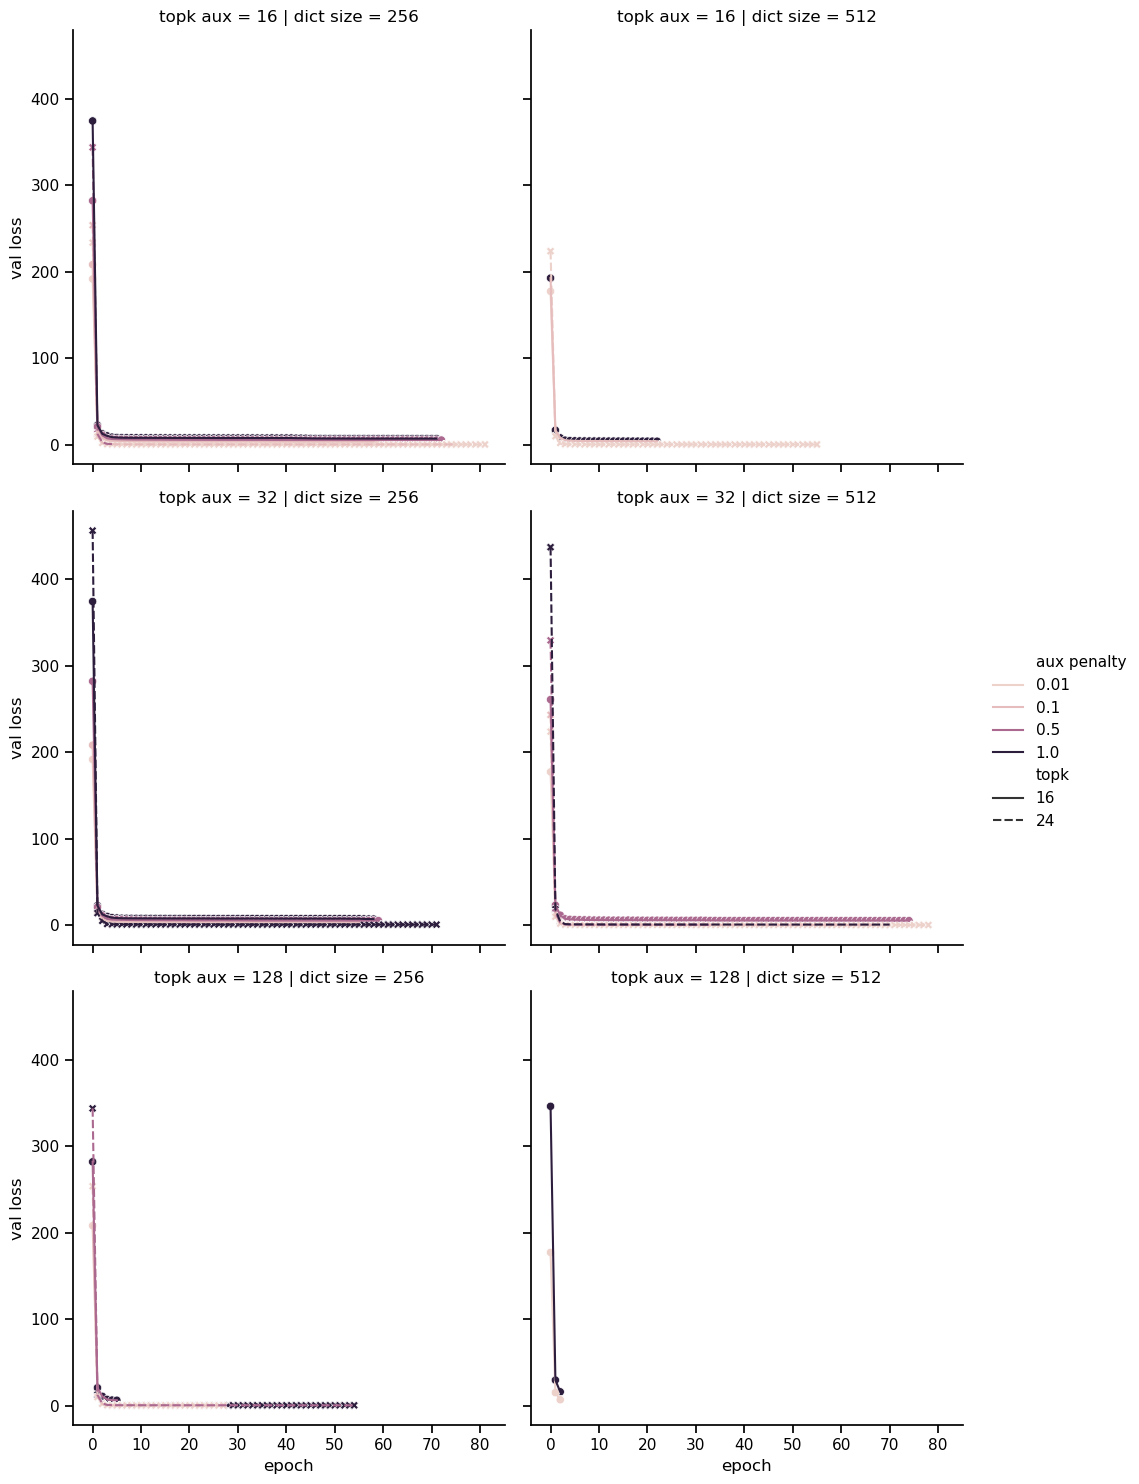

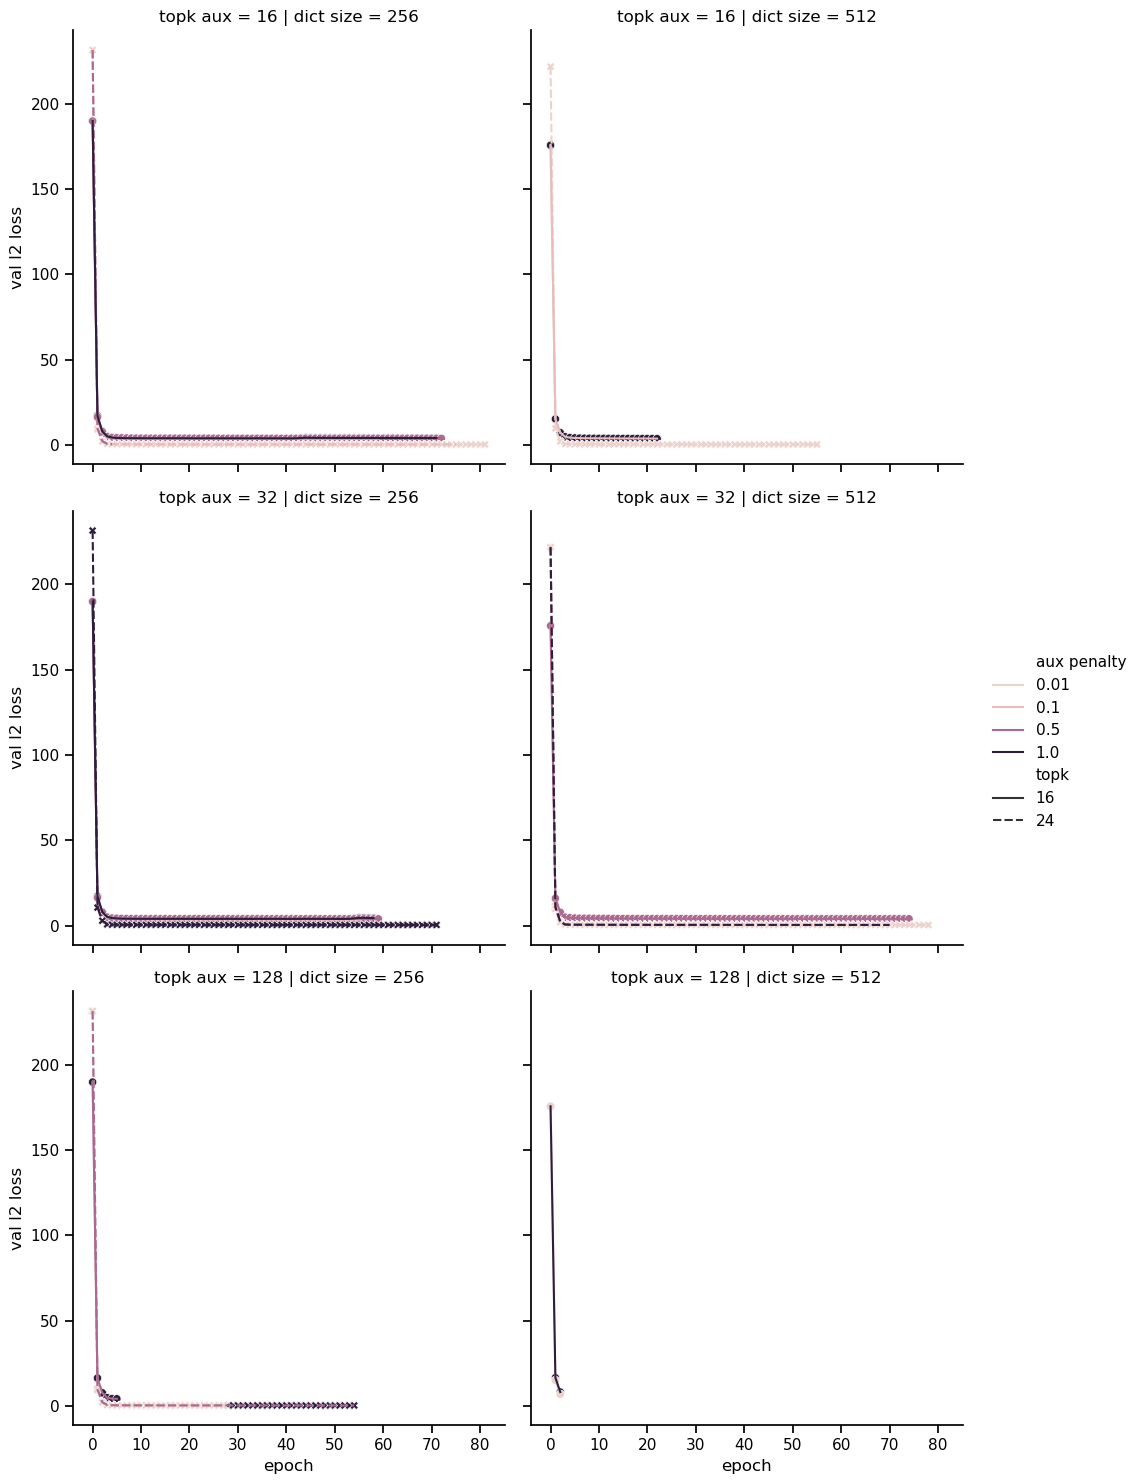

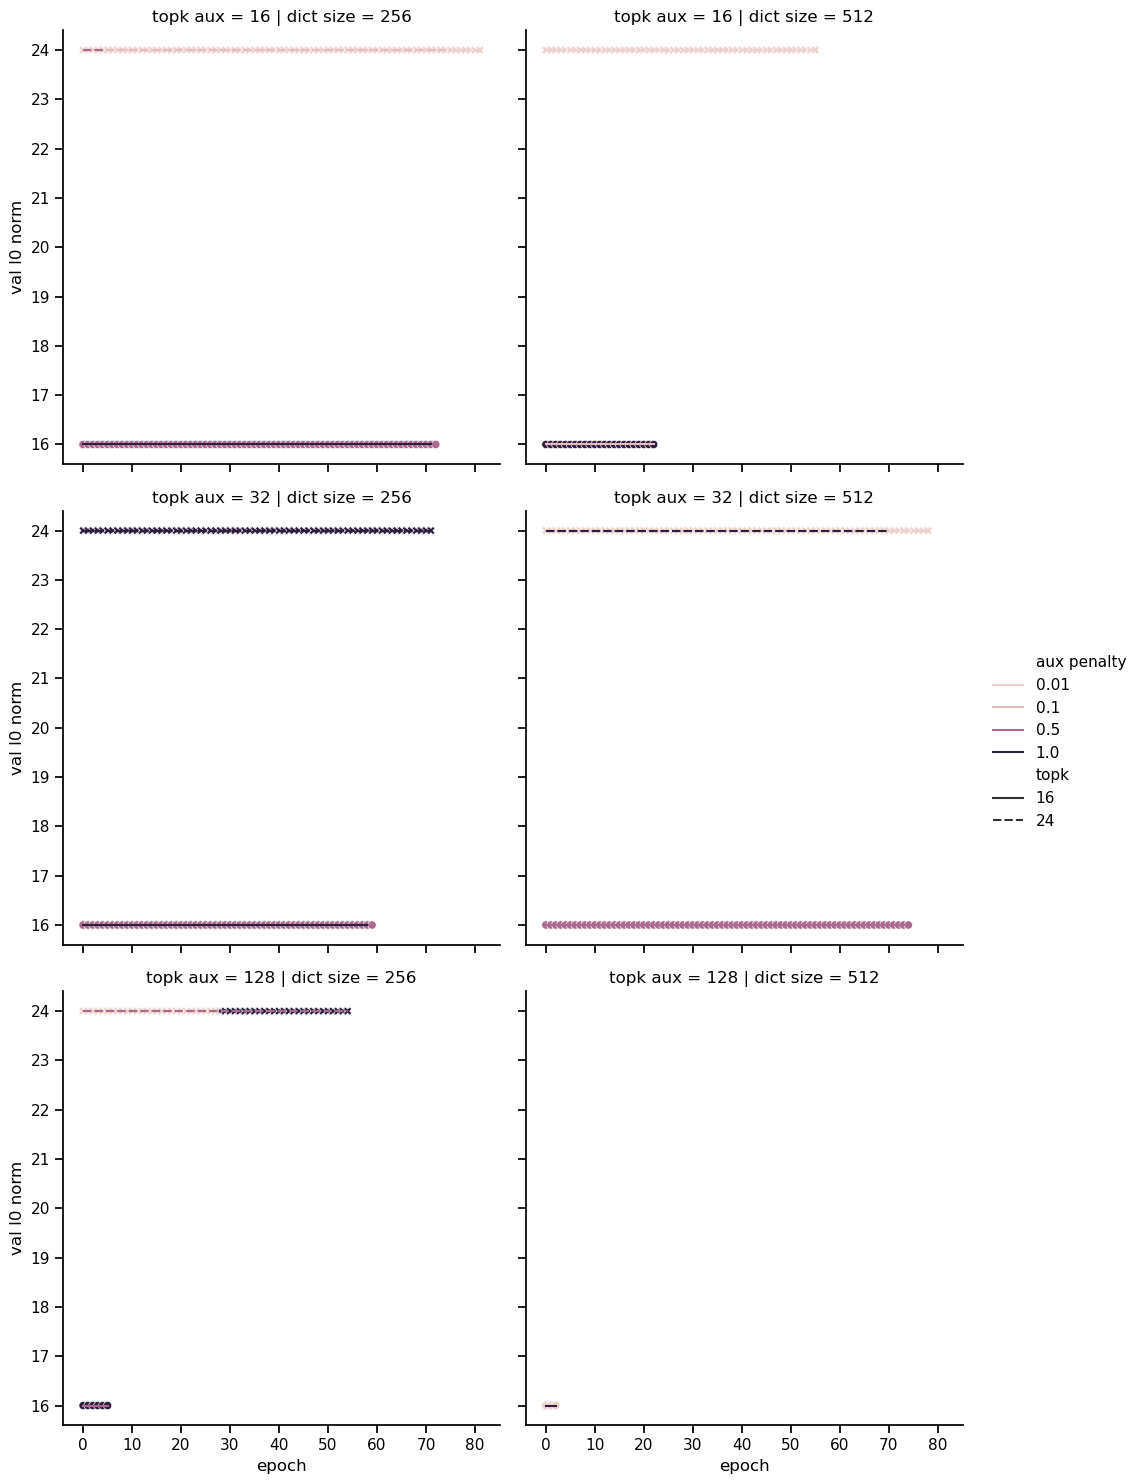

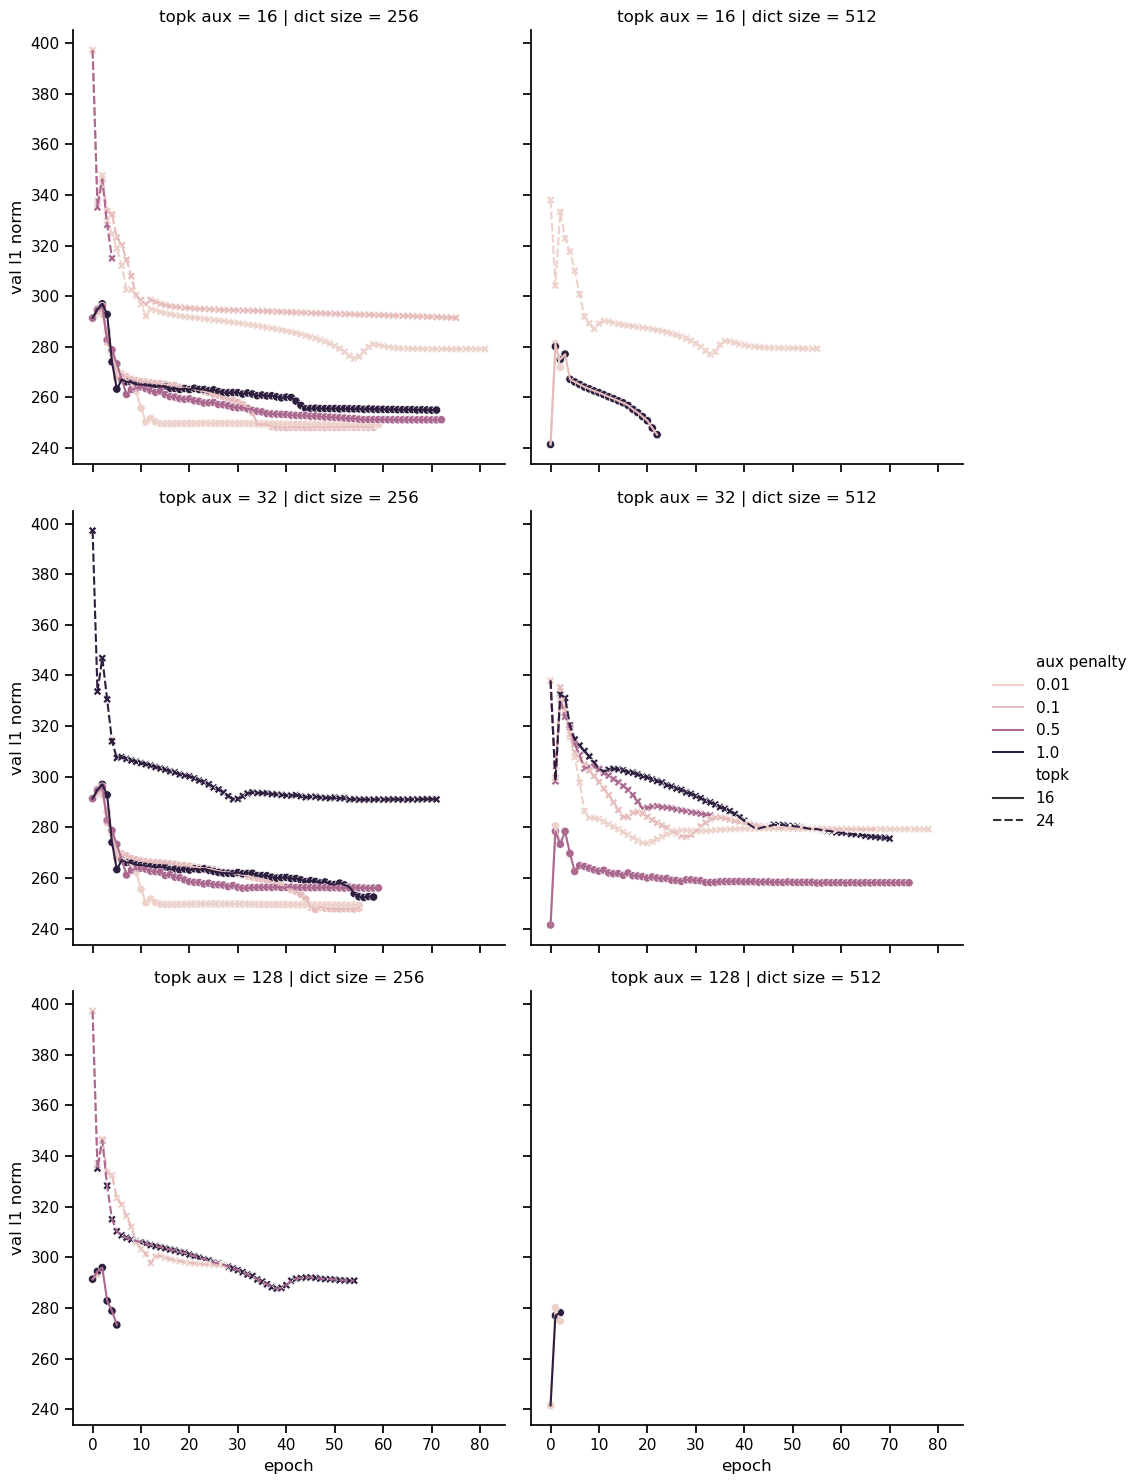

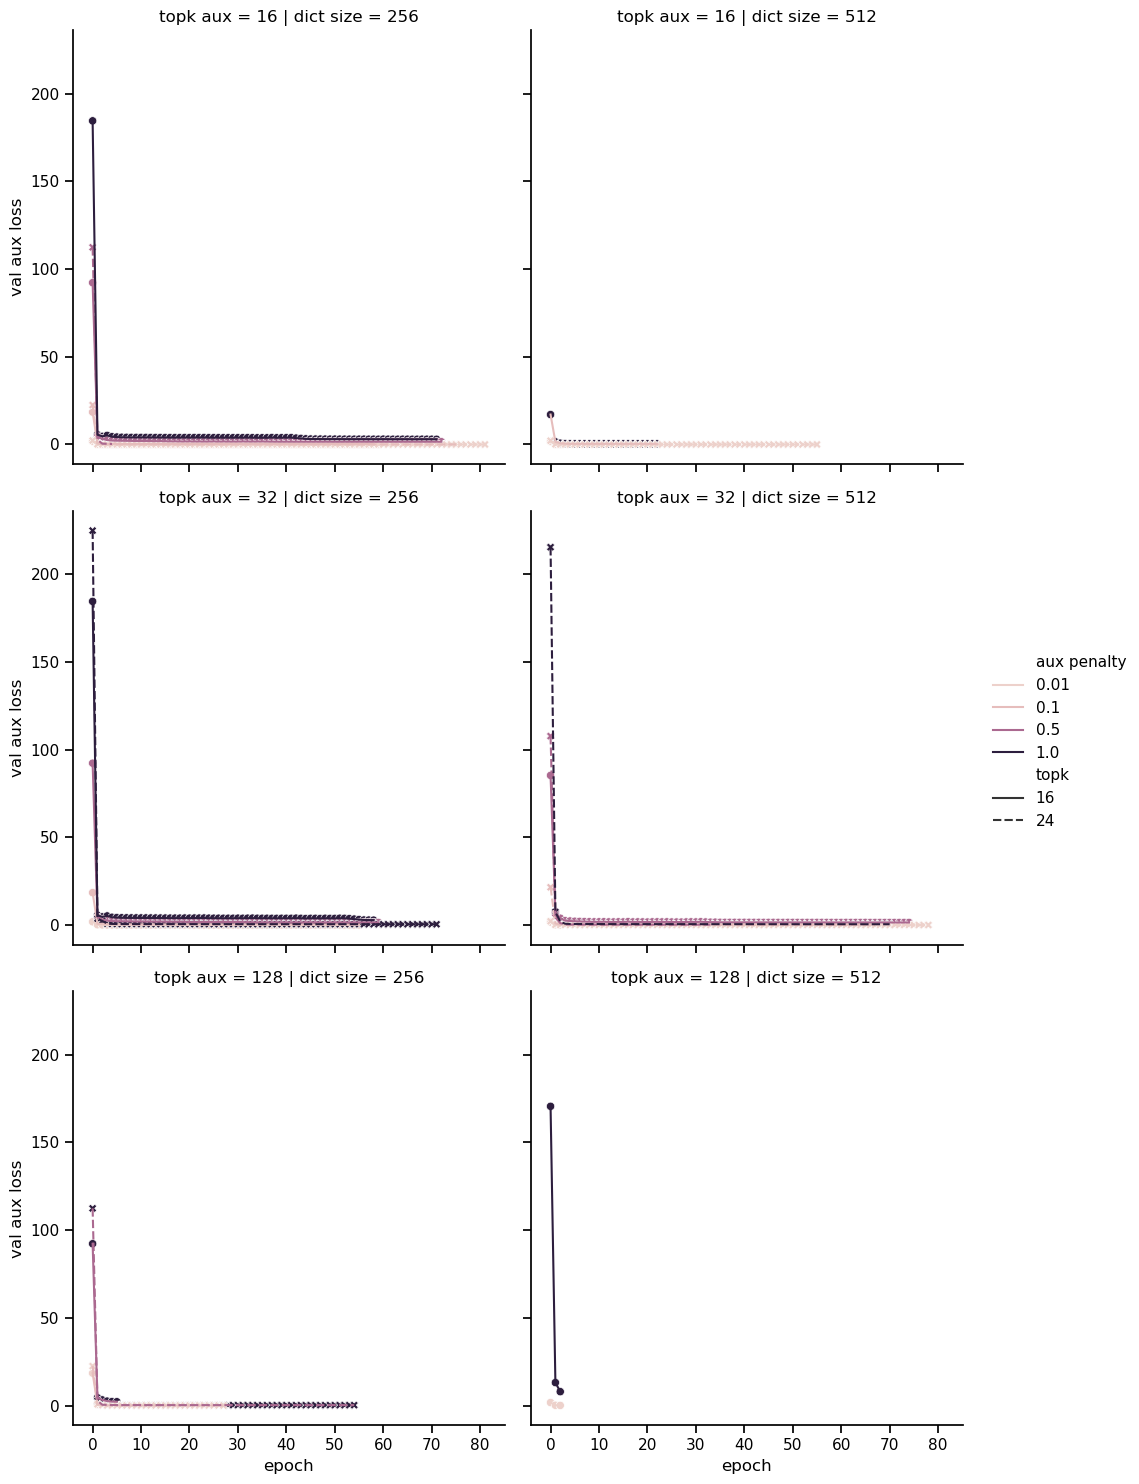

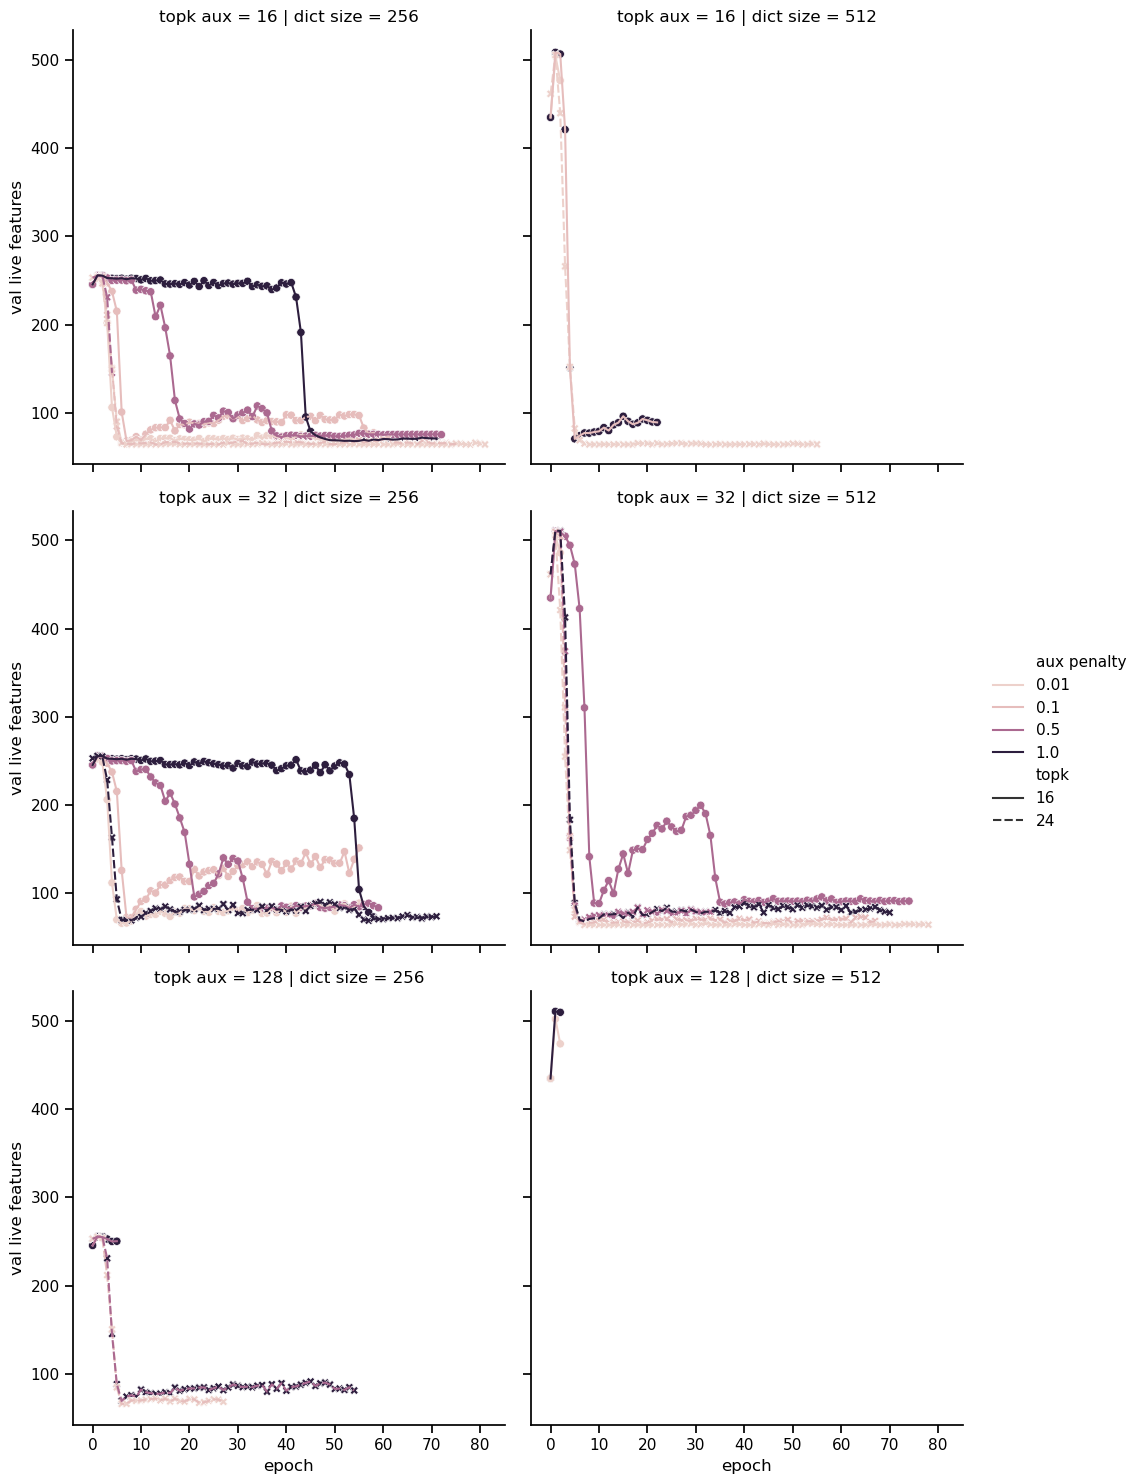

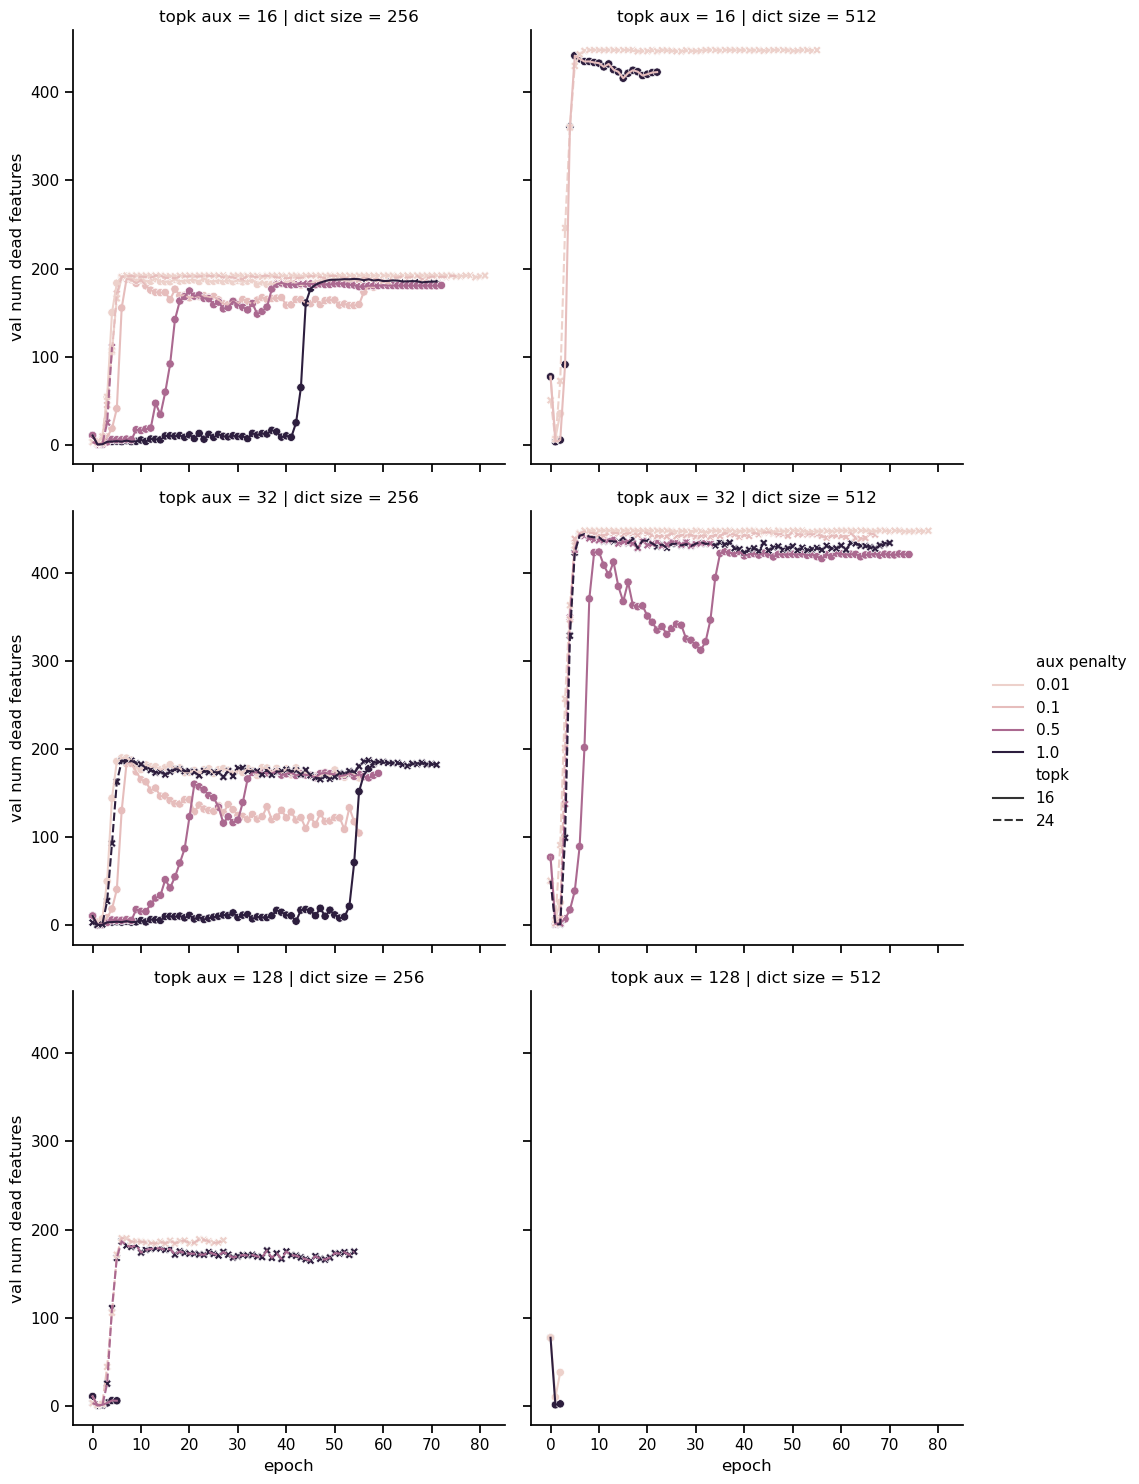

In [89]:
test_cols = ['val loss', 'val l2 loss', 'val l0 norm', 'val l1 norm', 'val aux loss','val live features','val num dead features']


for col in test_cols:
    g= sns.relplot(data=to_plot, kind='line',
                x= 'epoch', y=col, 
                hue='aux penalty',
                style='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                style='topk', hue='aux penalty')
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

In [90]:
bar = to_plot.loc[to_plot.groupby(['topk aux','topk','dict size', 'aux penalty'], observed=True)['val loss'].idxmin()]
bar

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,val num dead features,val loss,val l1 loss,...,val aux loss,train num dead features,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features
262,256,16,16,0.01,16,57,56,187.682281,3.707379,0,...,0.032866,185.885986,3.702175,0.0,3.668962,16.0,249.080826,0.033214,68.317719,70.114014
204,256,16,16,0.10,16,58,57,178.777374,4.005780,0,...,0.320152,176.453552,4.003361,0.0,3.680391,16.0,247.987564,0.322972,77.222626,79.546448
409,256,16,16,0.50,16,72,71,180.868698,5.560529,0,...,1.568998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.131302,NaN
336,256,16,16,1.00,16,71,70,185.170654,7.167975,0,...,2.968305,182.799057,7.202081,0.0,4.192035,16.0,254.826935,3.010044,70.829346,73.200943
2,512,16,16,0.01,16,2,1,35.285564,7.366134,0,...,0.070331,4.881828,10.863183,0.0,10.757610,16.0,278.734039,0.105563,476.714436,507.118172
25,512,16,16,0.10,16,22,21,422.958649,4.192501,0,...,0.343648,421.446747,4.220725,0.0,3.876829,16.0,245.857025,0.343894,89.041351,90.553253
775,256,24,16,0.01,16,81,80,192.000000,0.427981,0,...,0.004225,191.740738,0.426864,0.0,0.422635,24.0,278.863007,0.004229,64.000000,64.259262
692,256,24,16,0.10,16,74,73,191.841995,0.483375,0,...,0.043262,191.532486,0.482156,0.0,0.438896,24.0,291.331268,0.043259,64.158005,64.467514
614,256,24,16,0.50,16,4,3,110.798912,0.892789,0,...,0.296169,71.145485,0.972232,0.0,0.648941,24.0,321.734436,0.323292,145.201088,184.854515
986,512,24,16,0.01,16,55,54,447.919281,0.431413,0,...,0.004258,447.539307,0.430123,0.0,0.425856,24.0,279.053467,0.004266,64.080719,64.460693


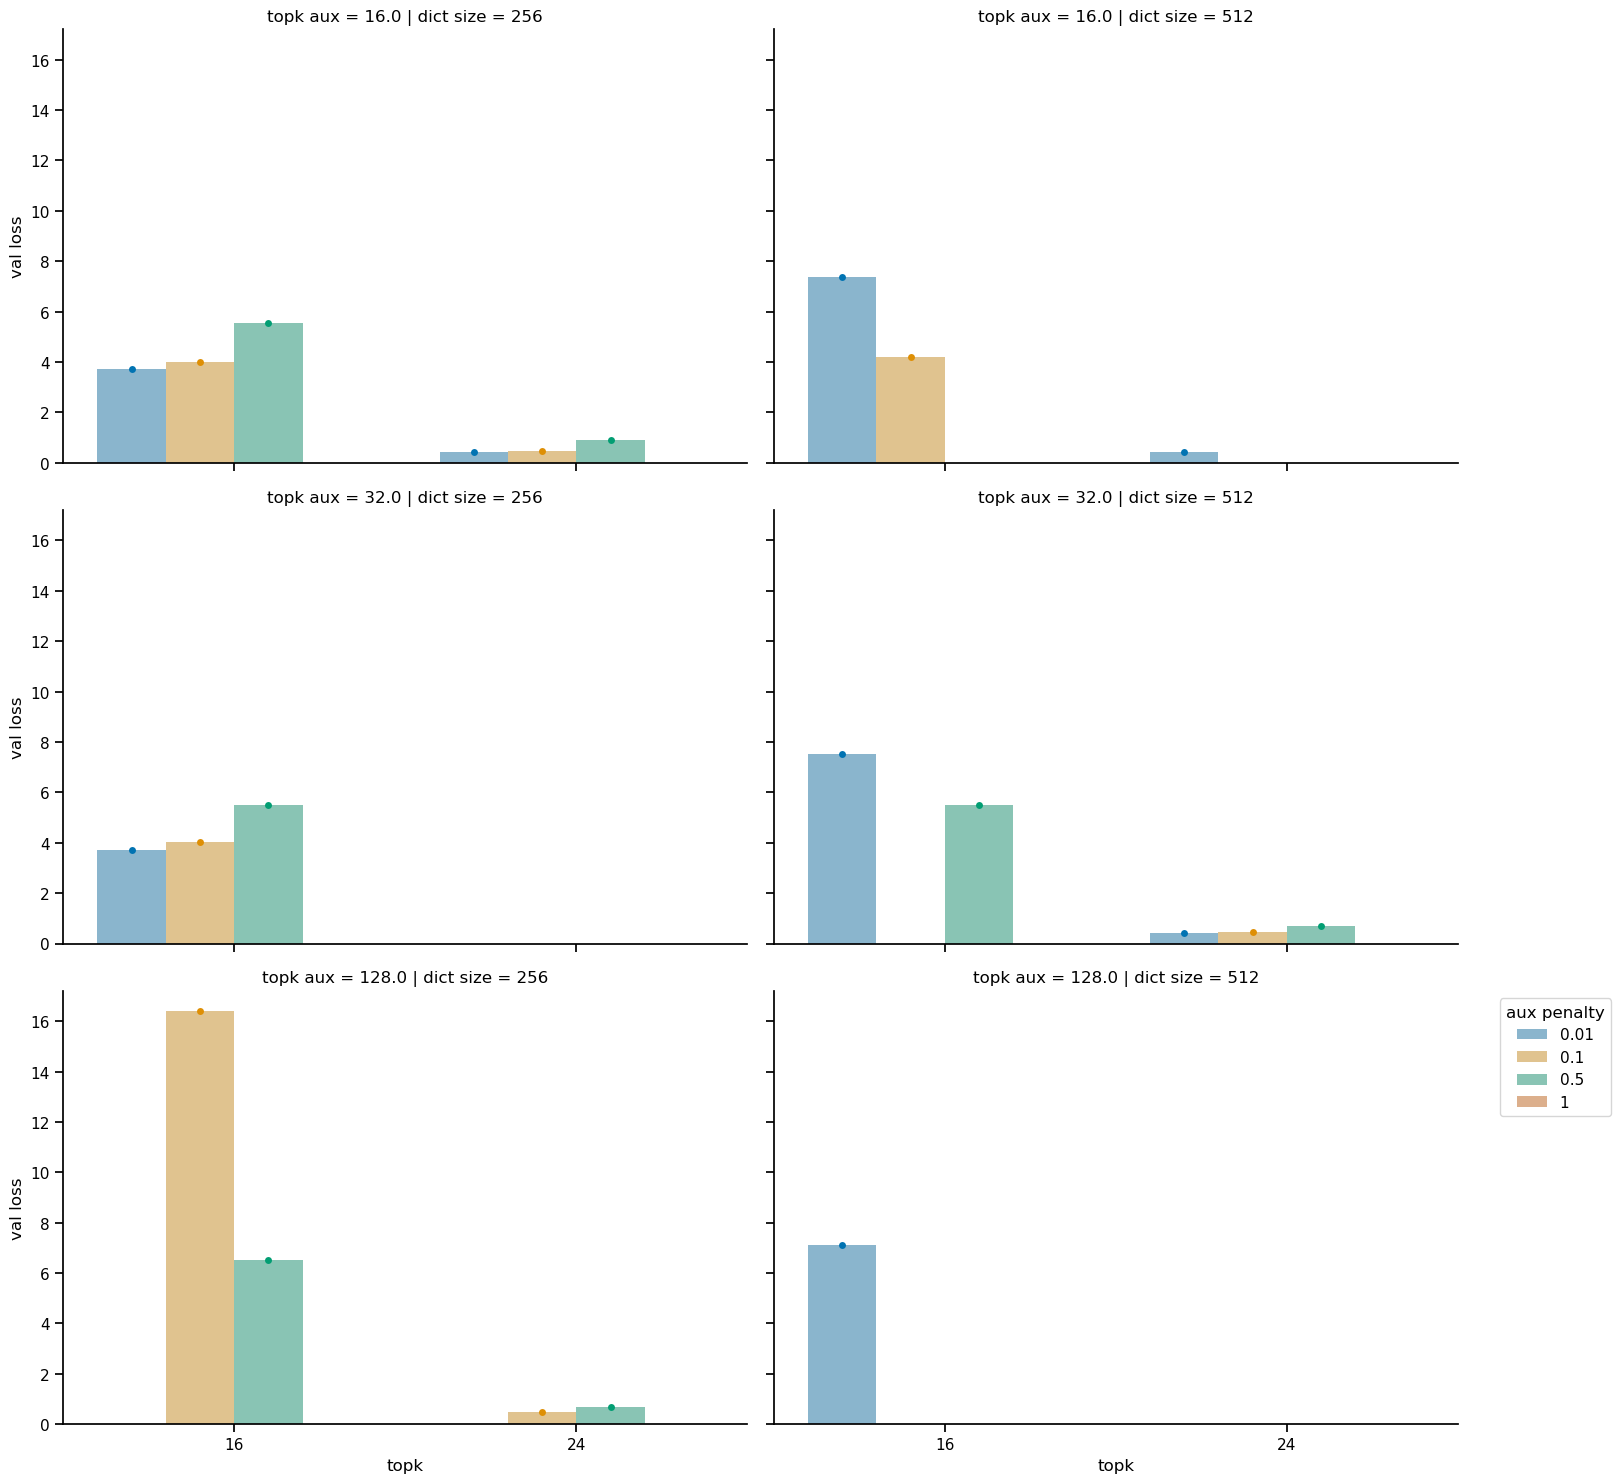

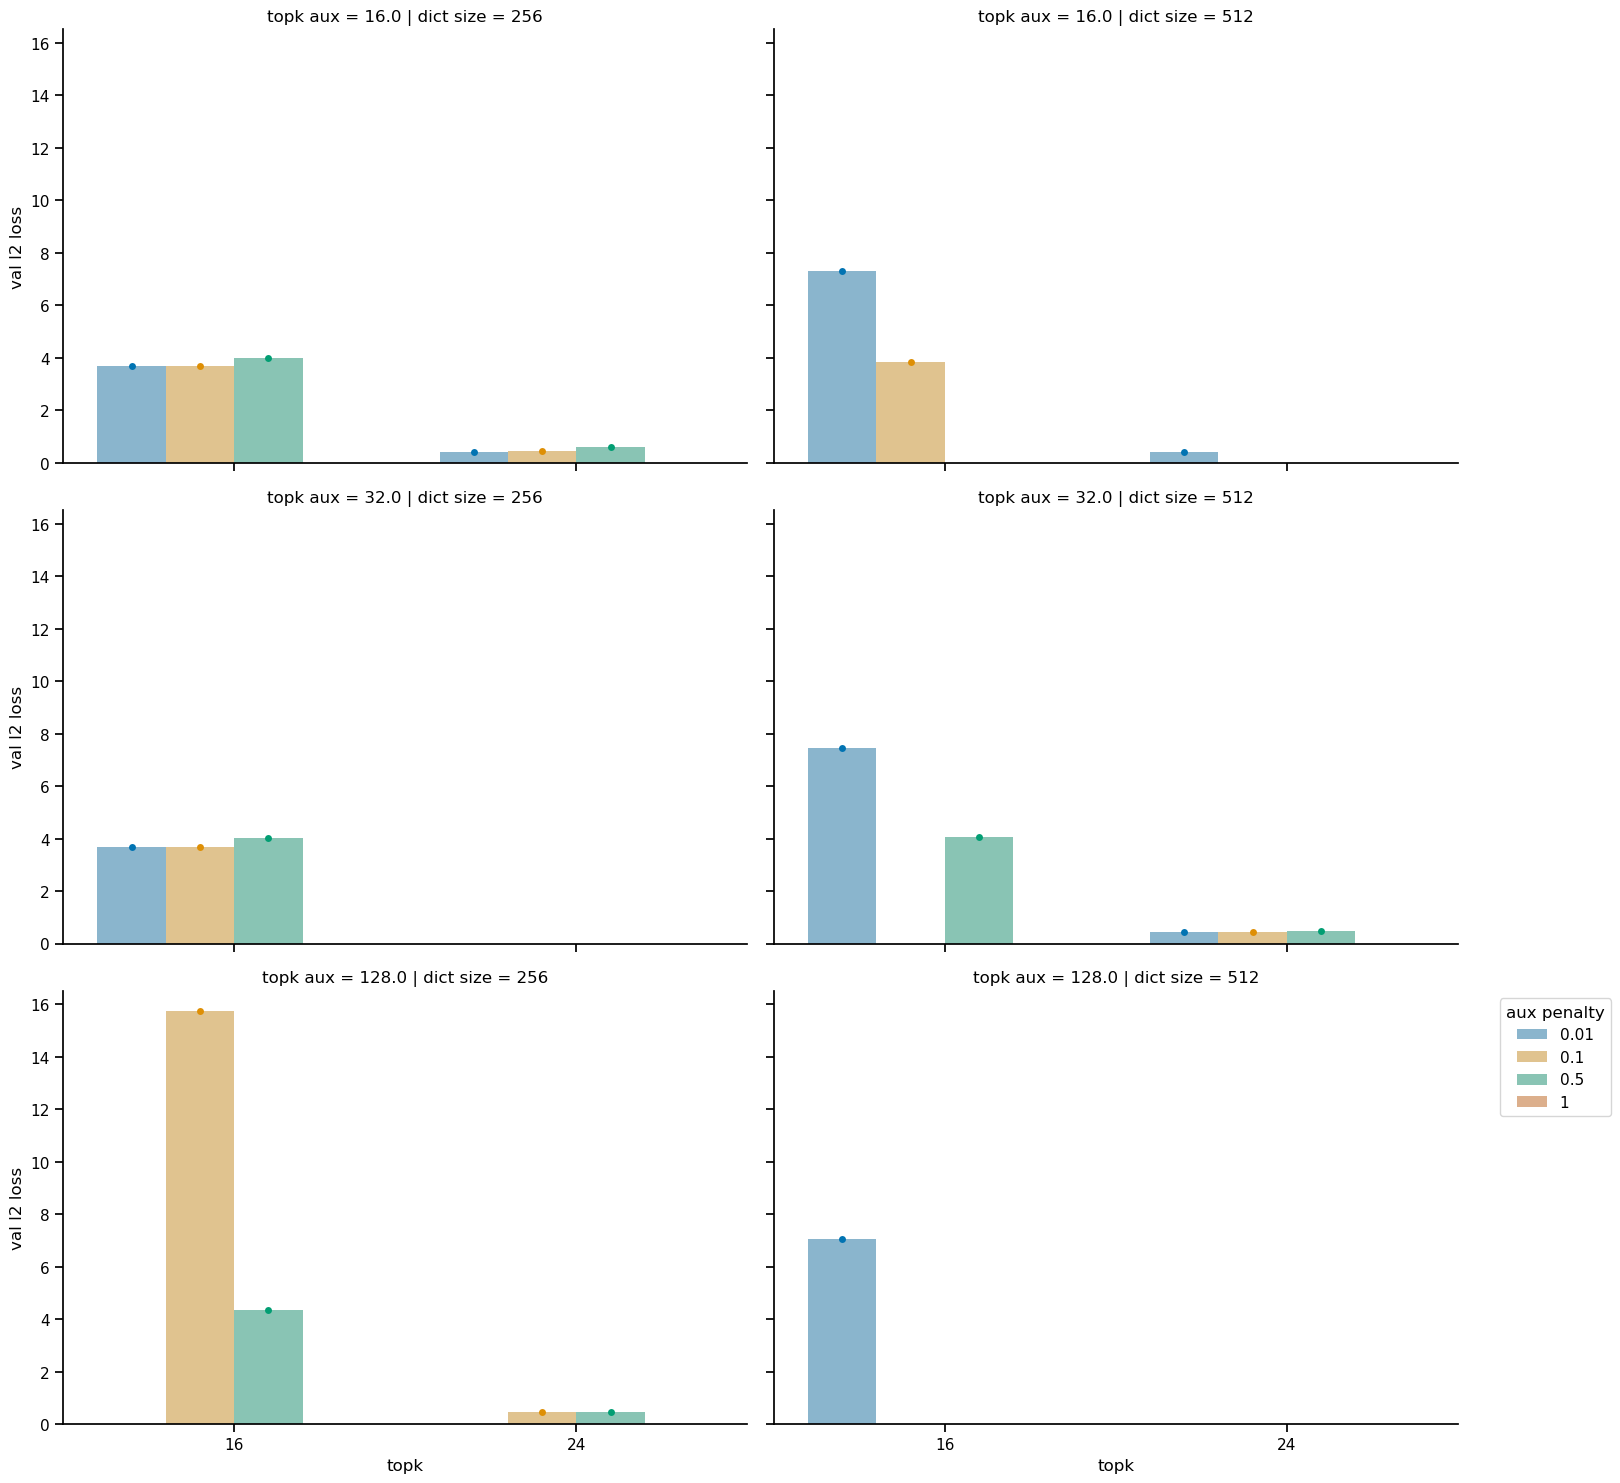

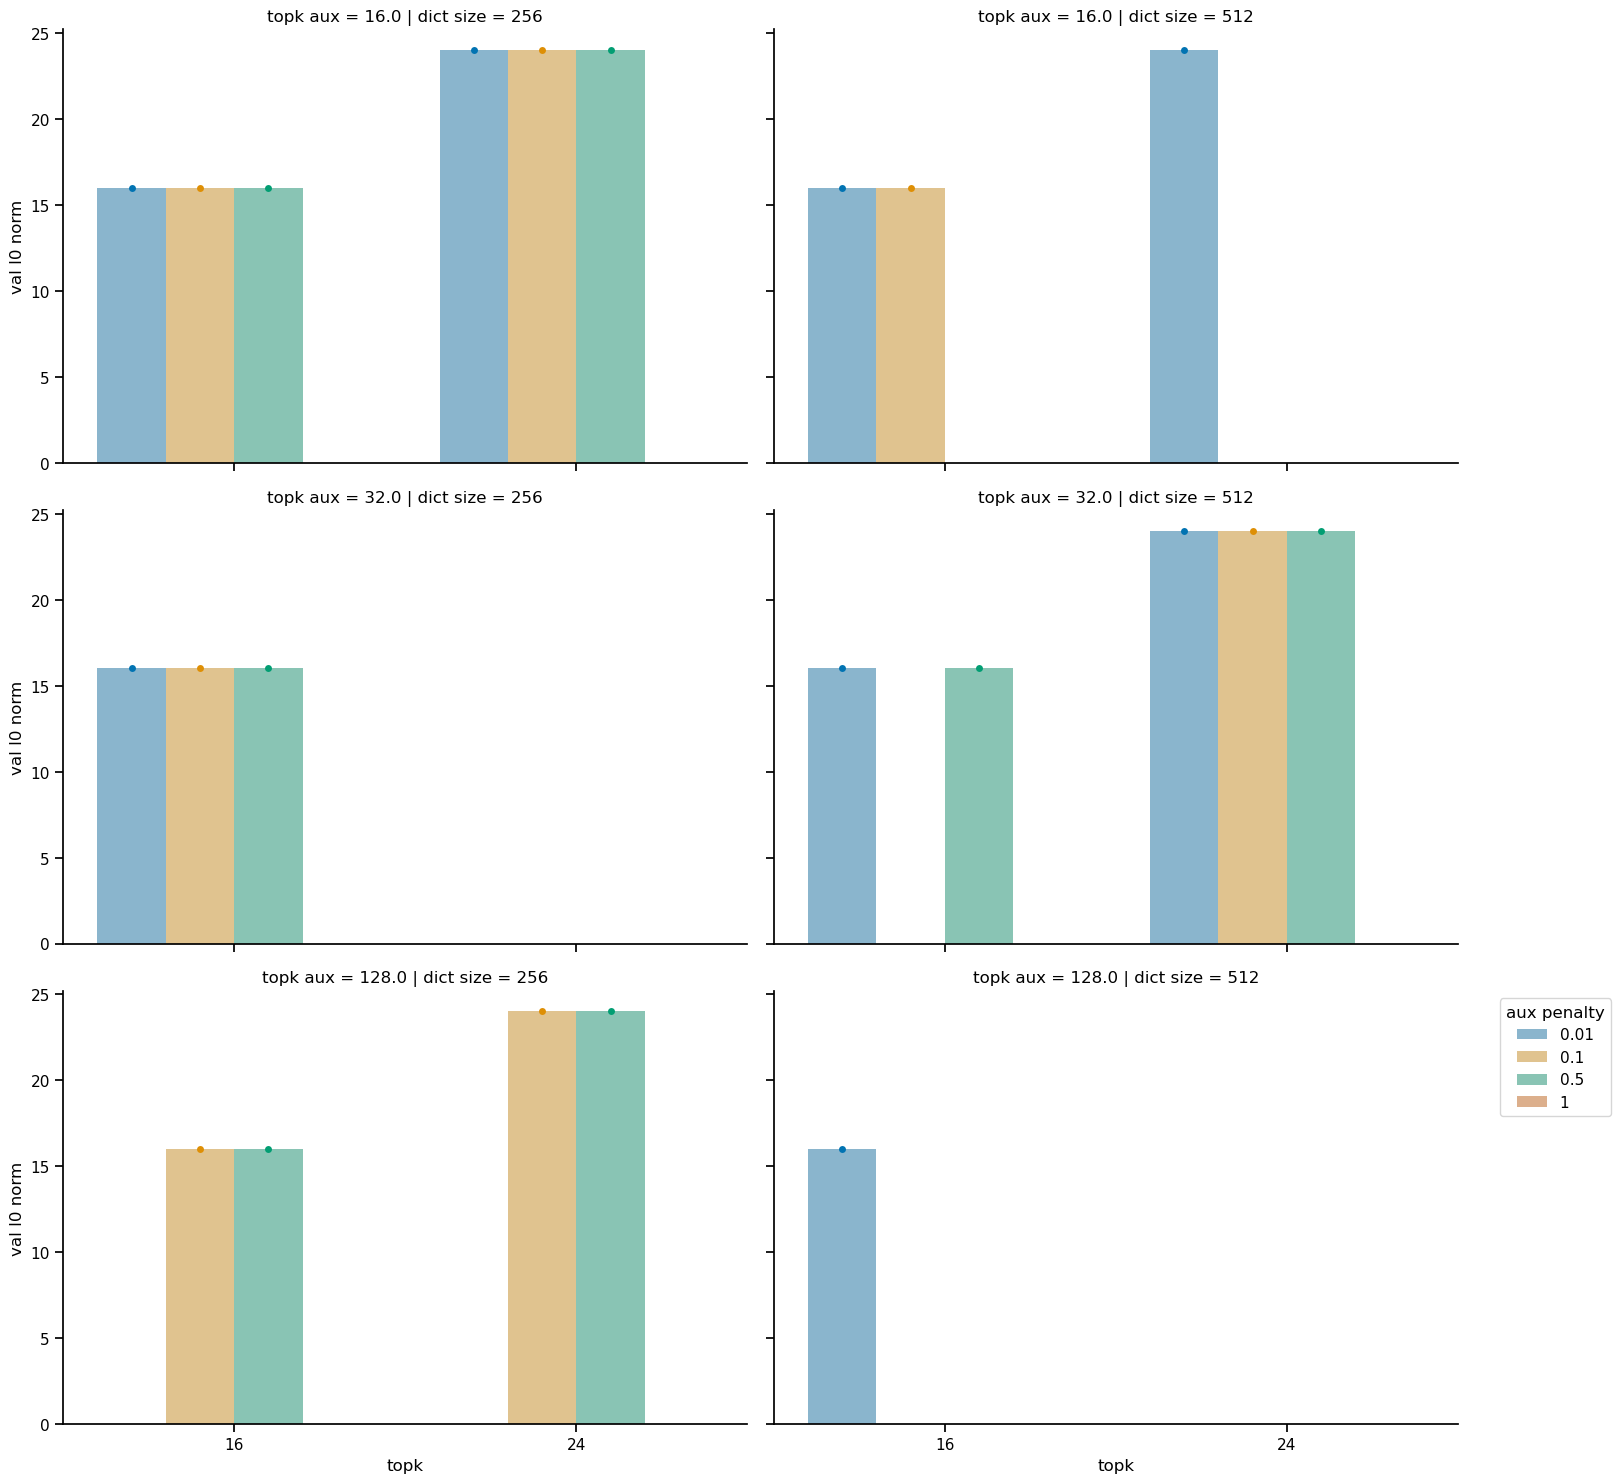

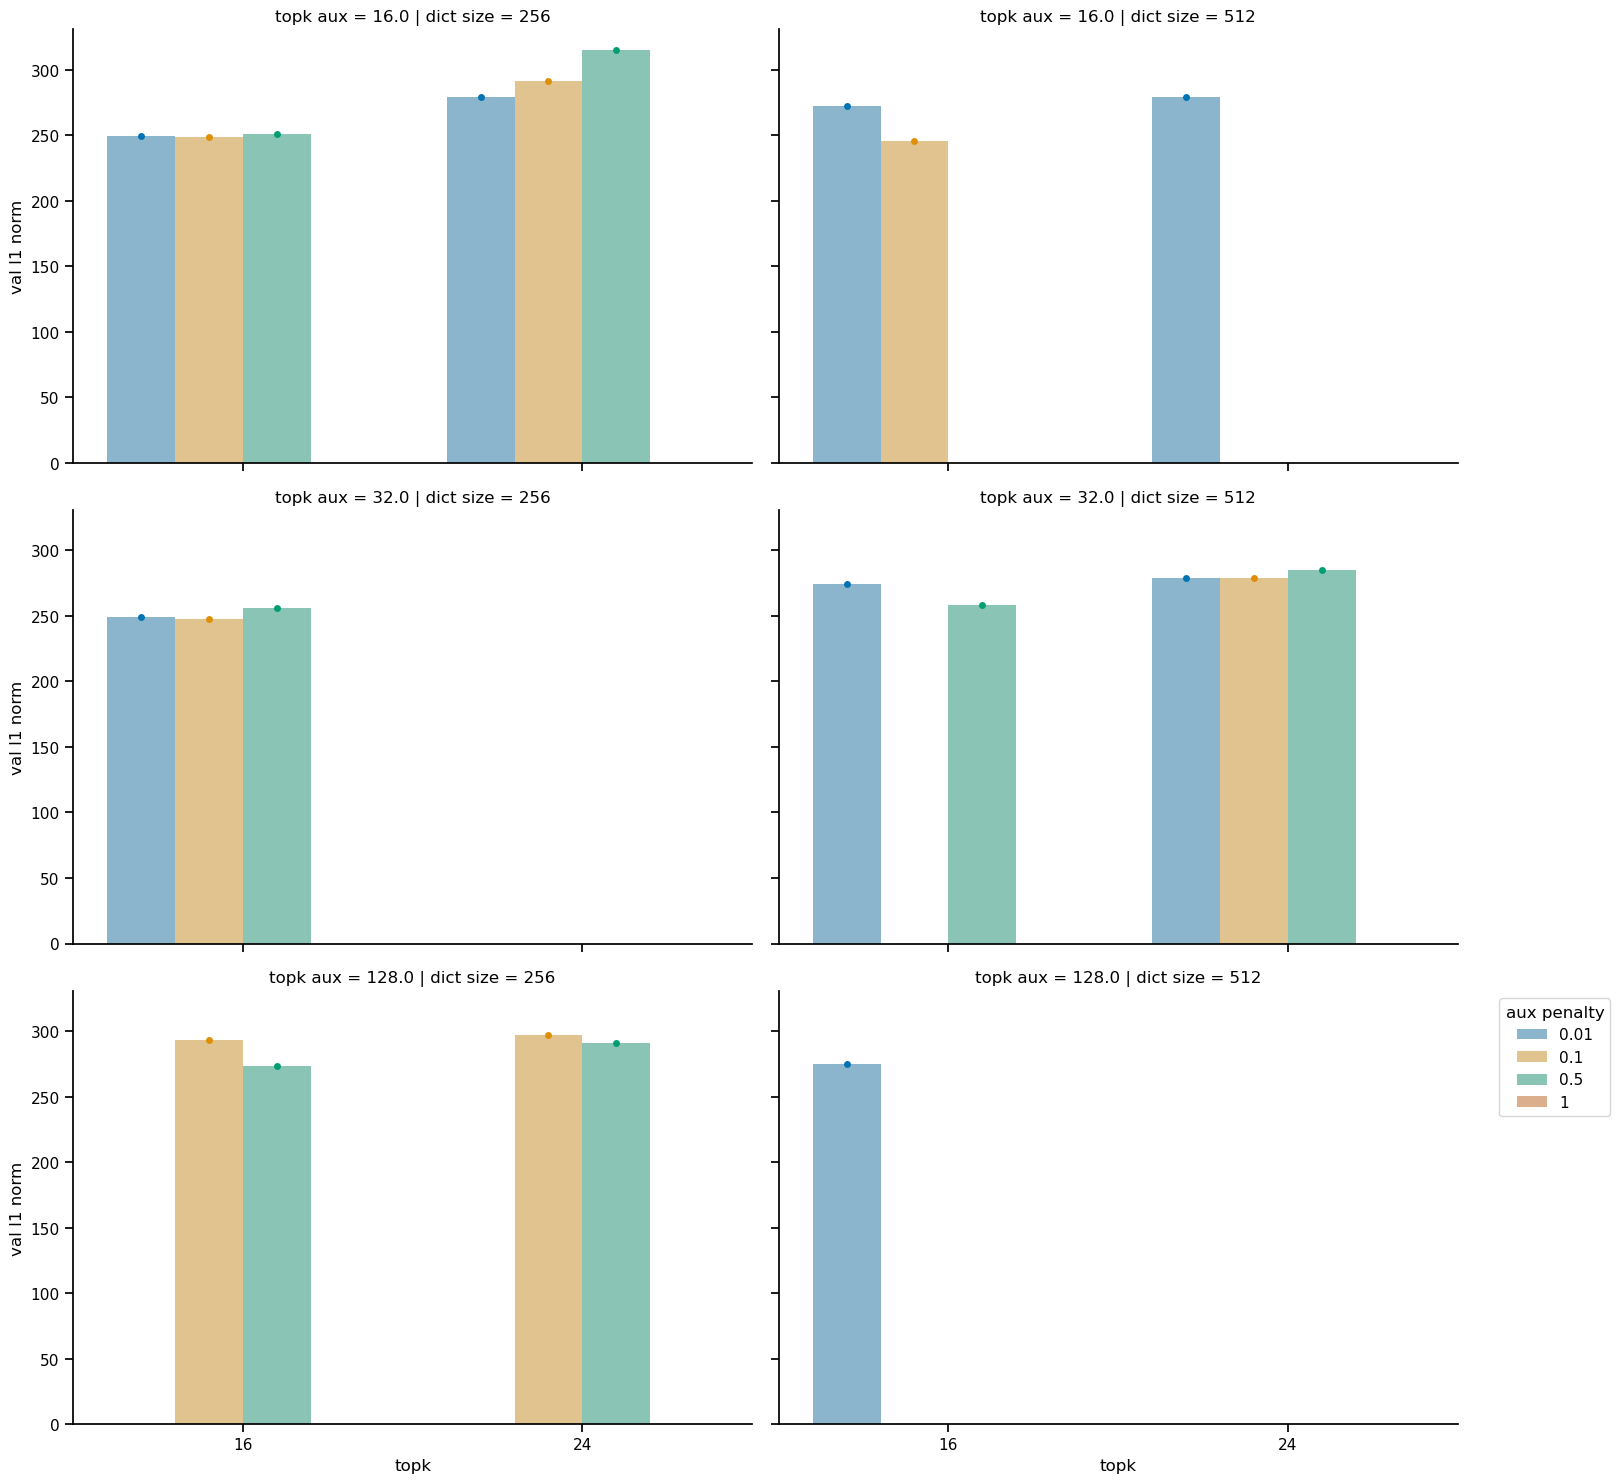

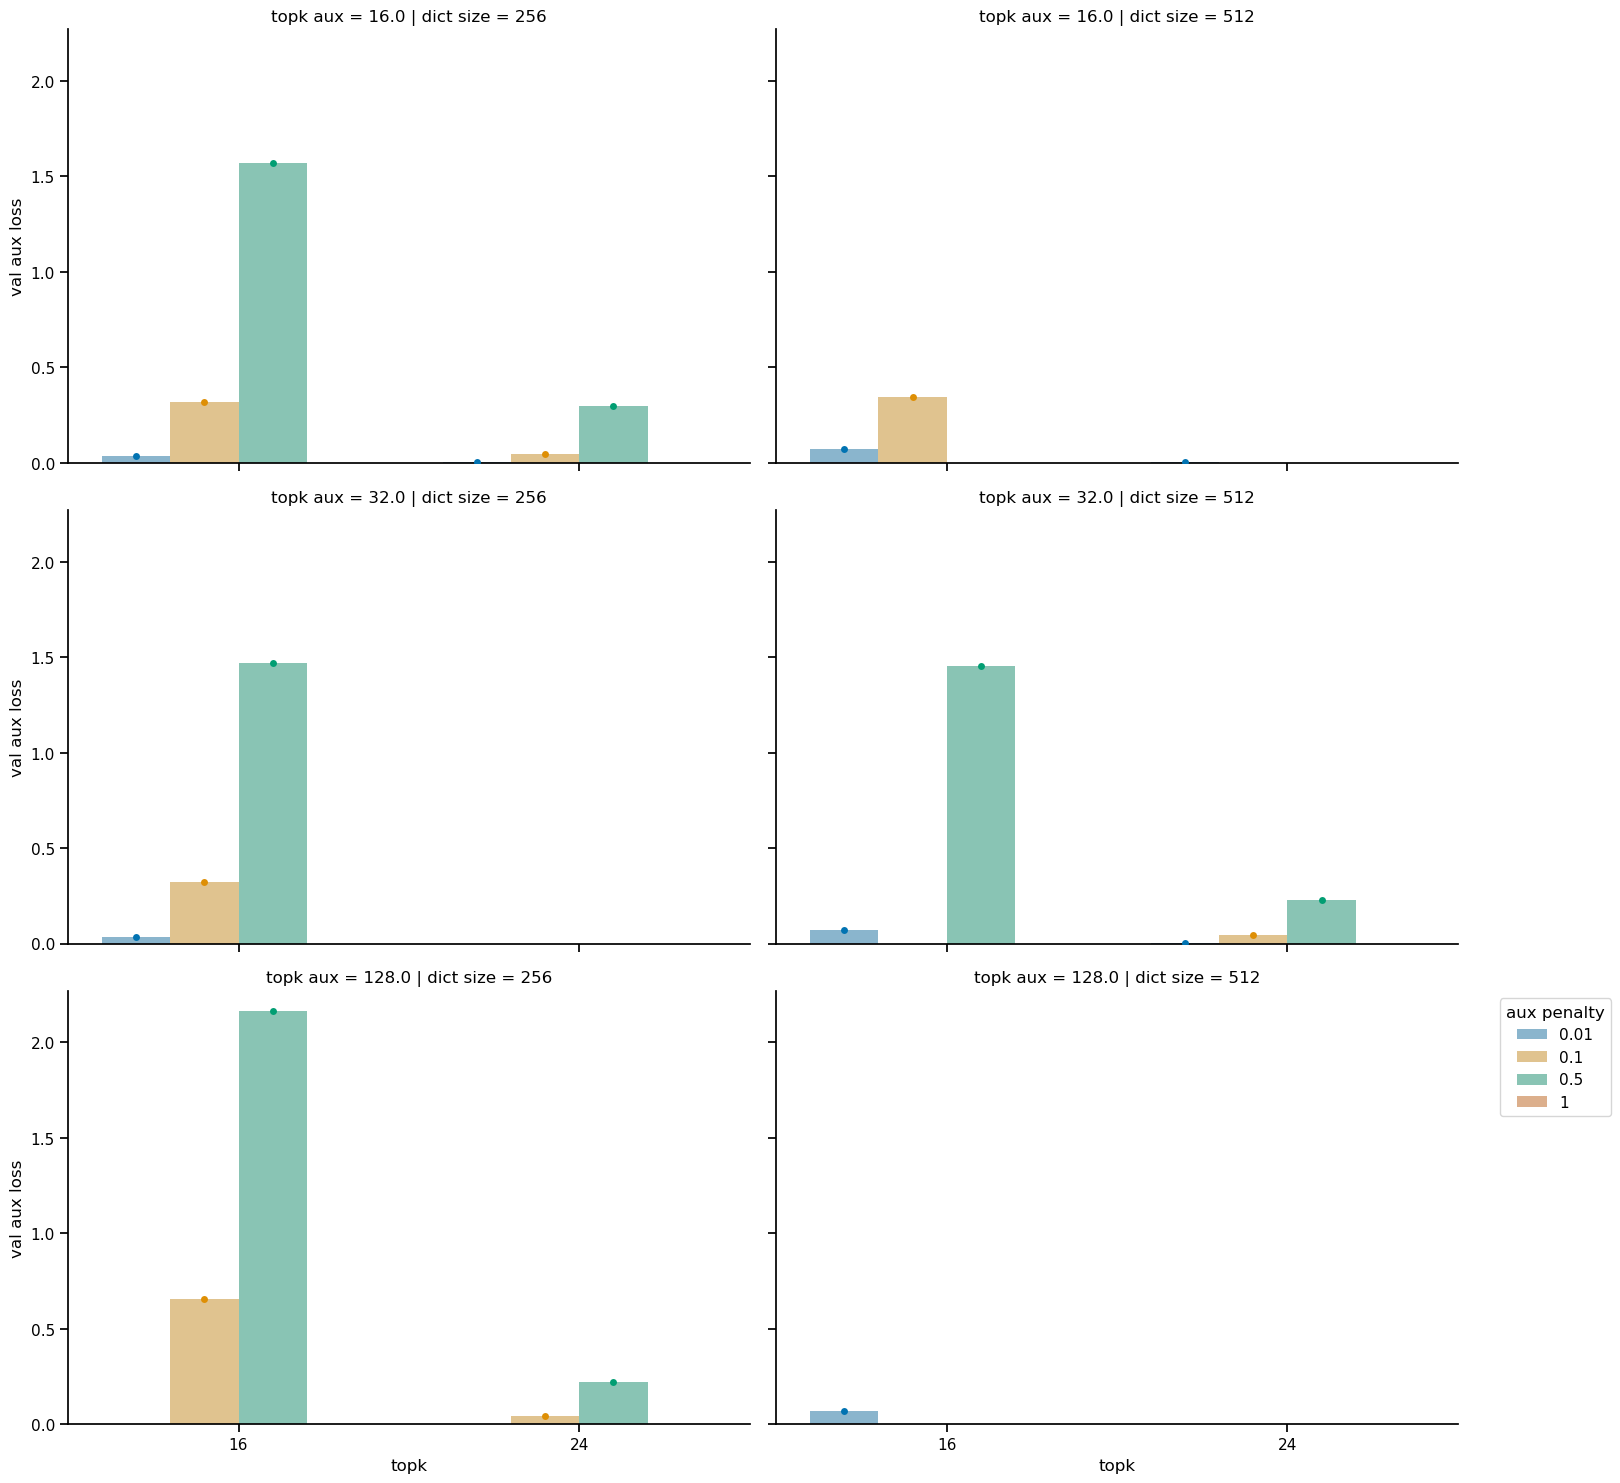

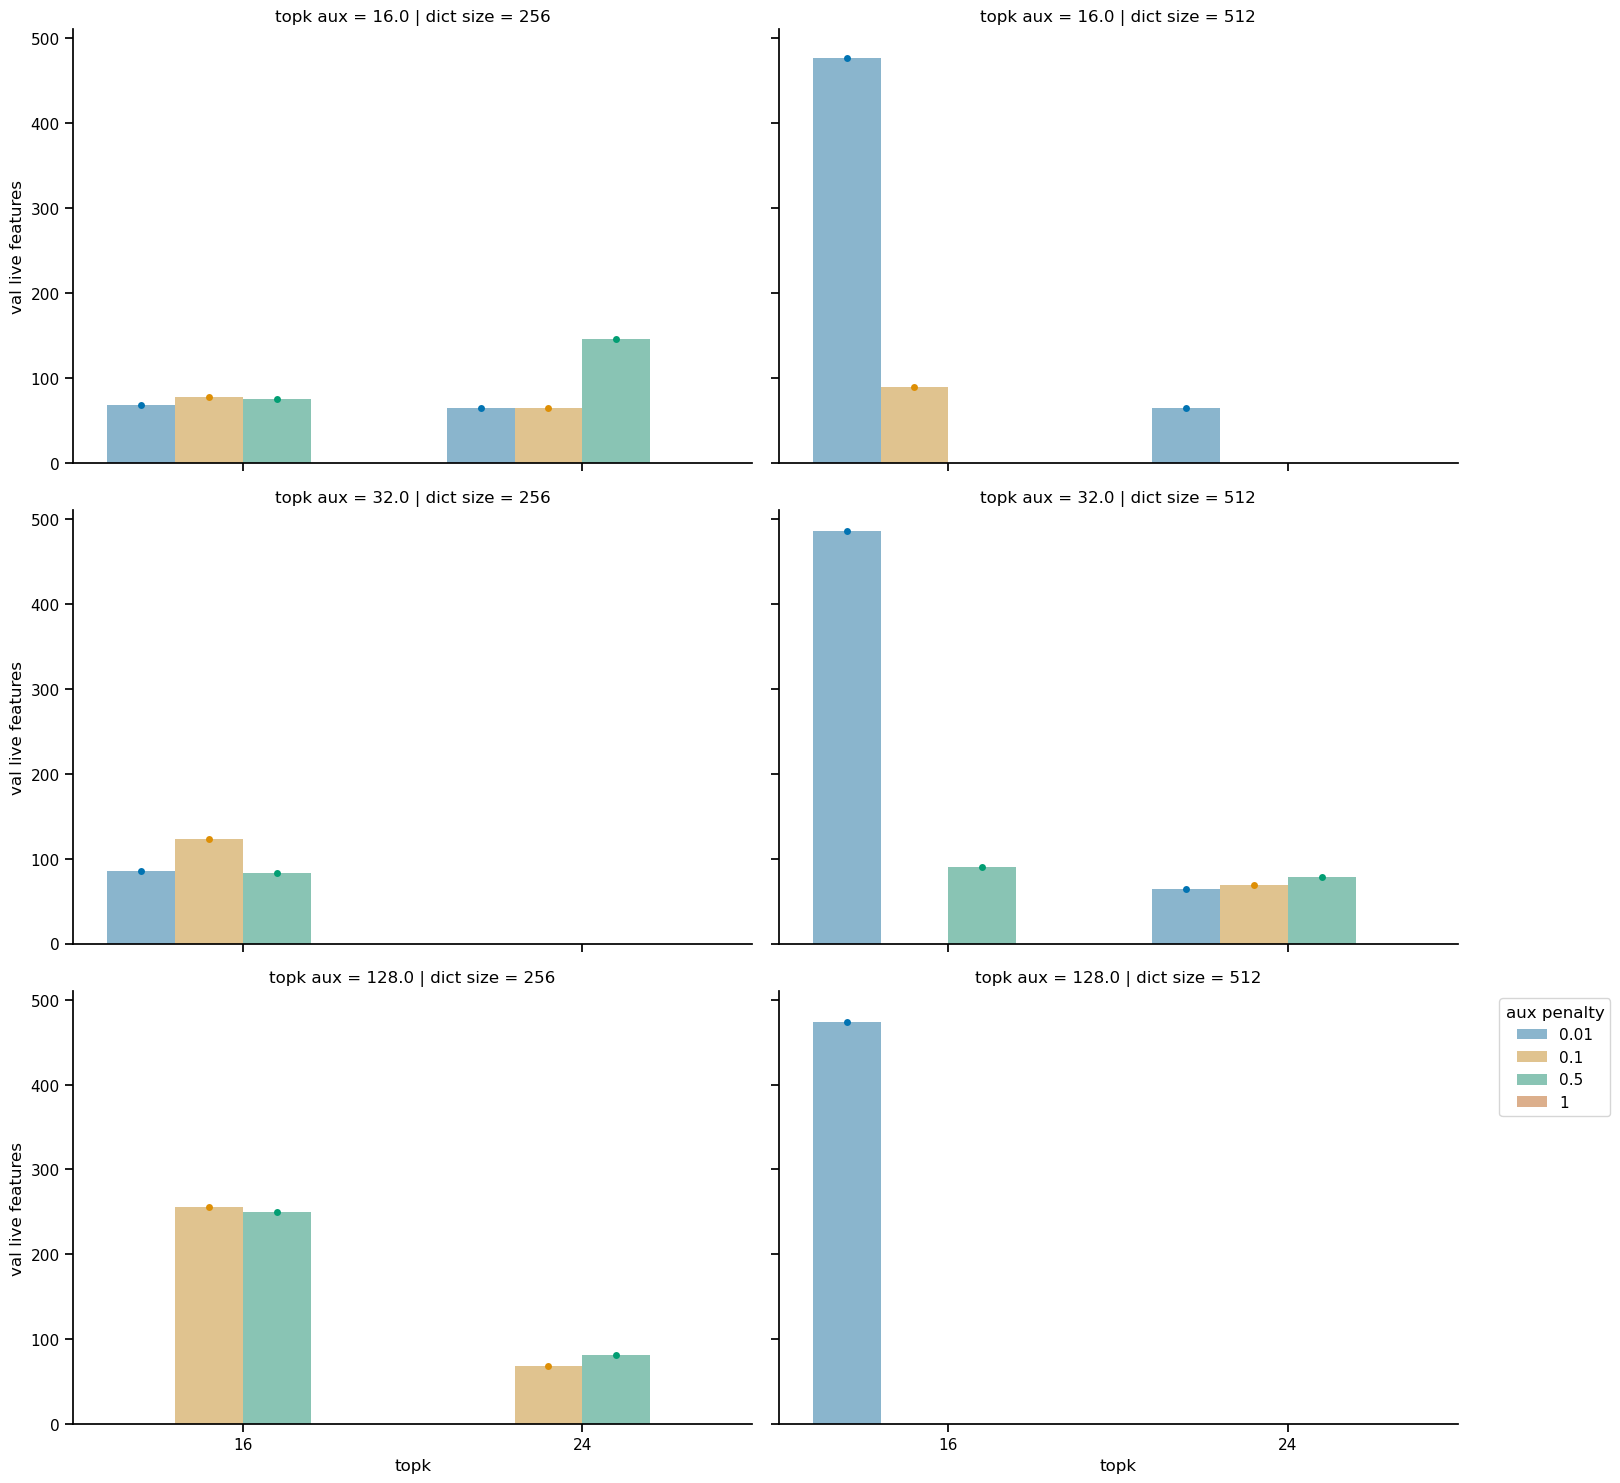

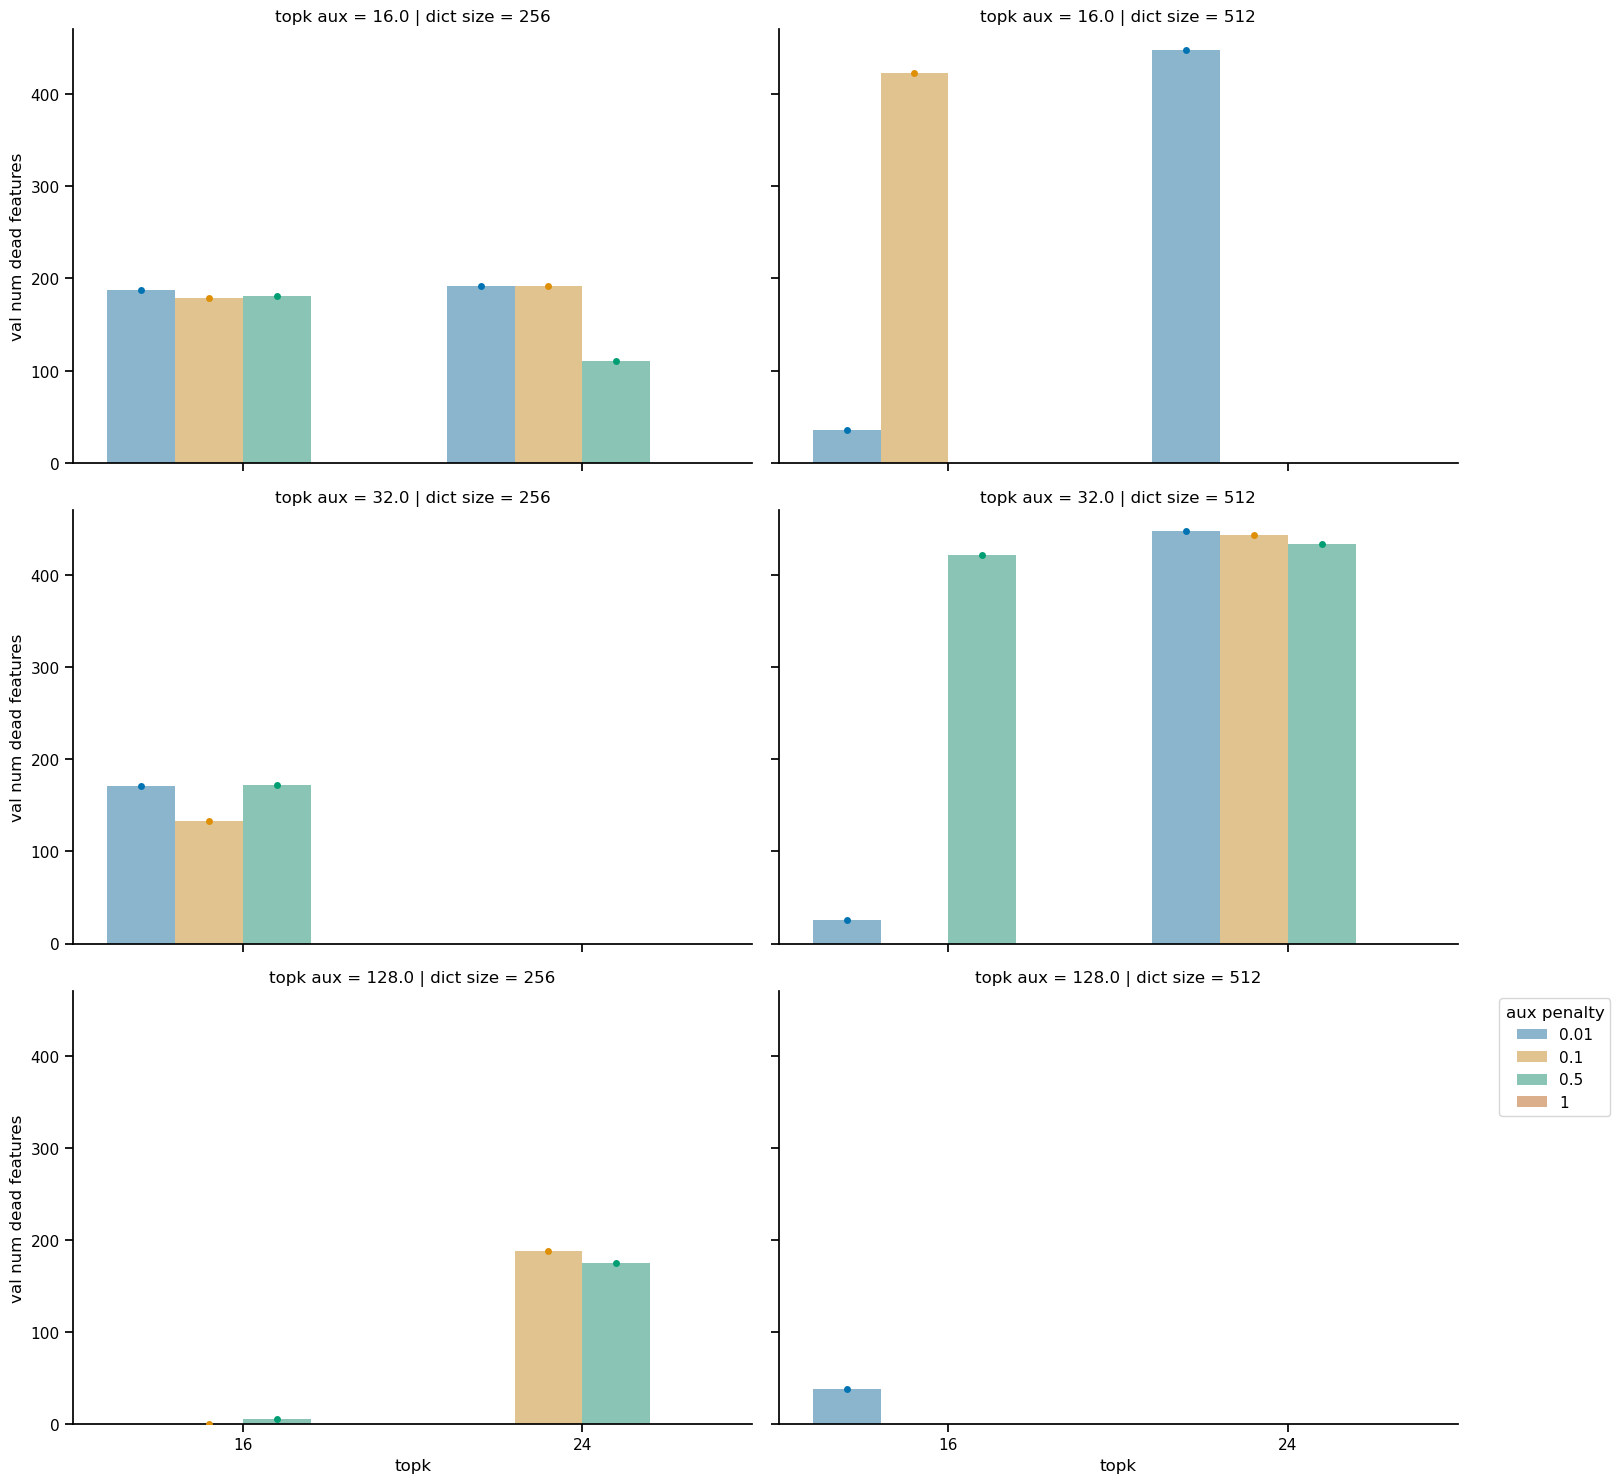

In [91]:
to_plot = bar.copy()
to_plot['topk aux'] = 2 ** np.round(np.log2(to_plot['topk aux']))

to_plot['aux penalty'] = to_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=to_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


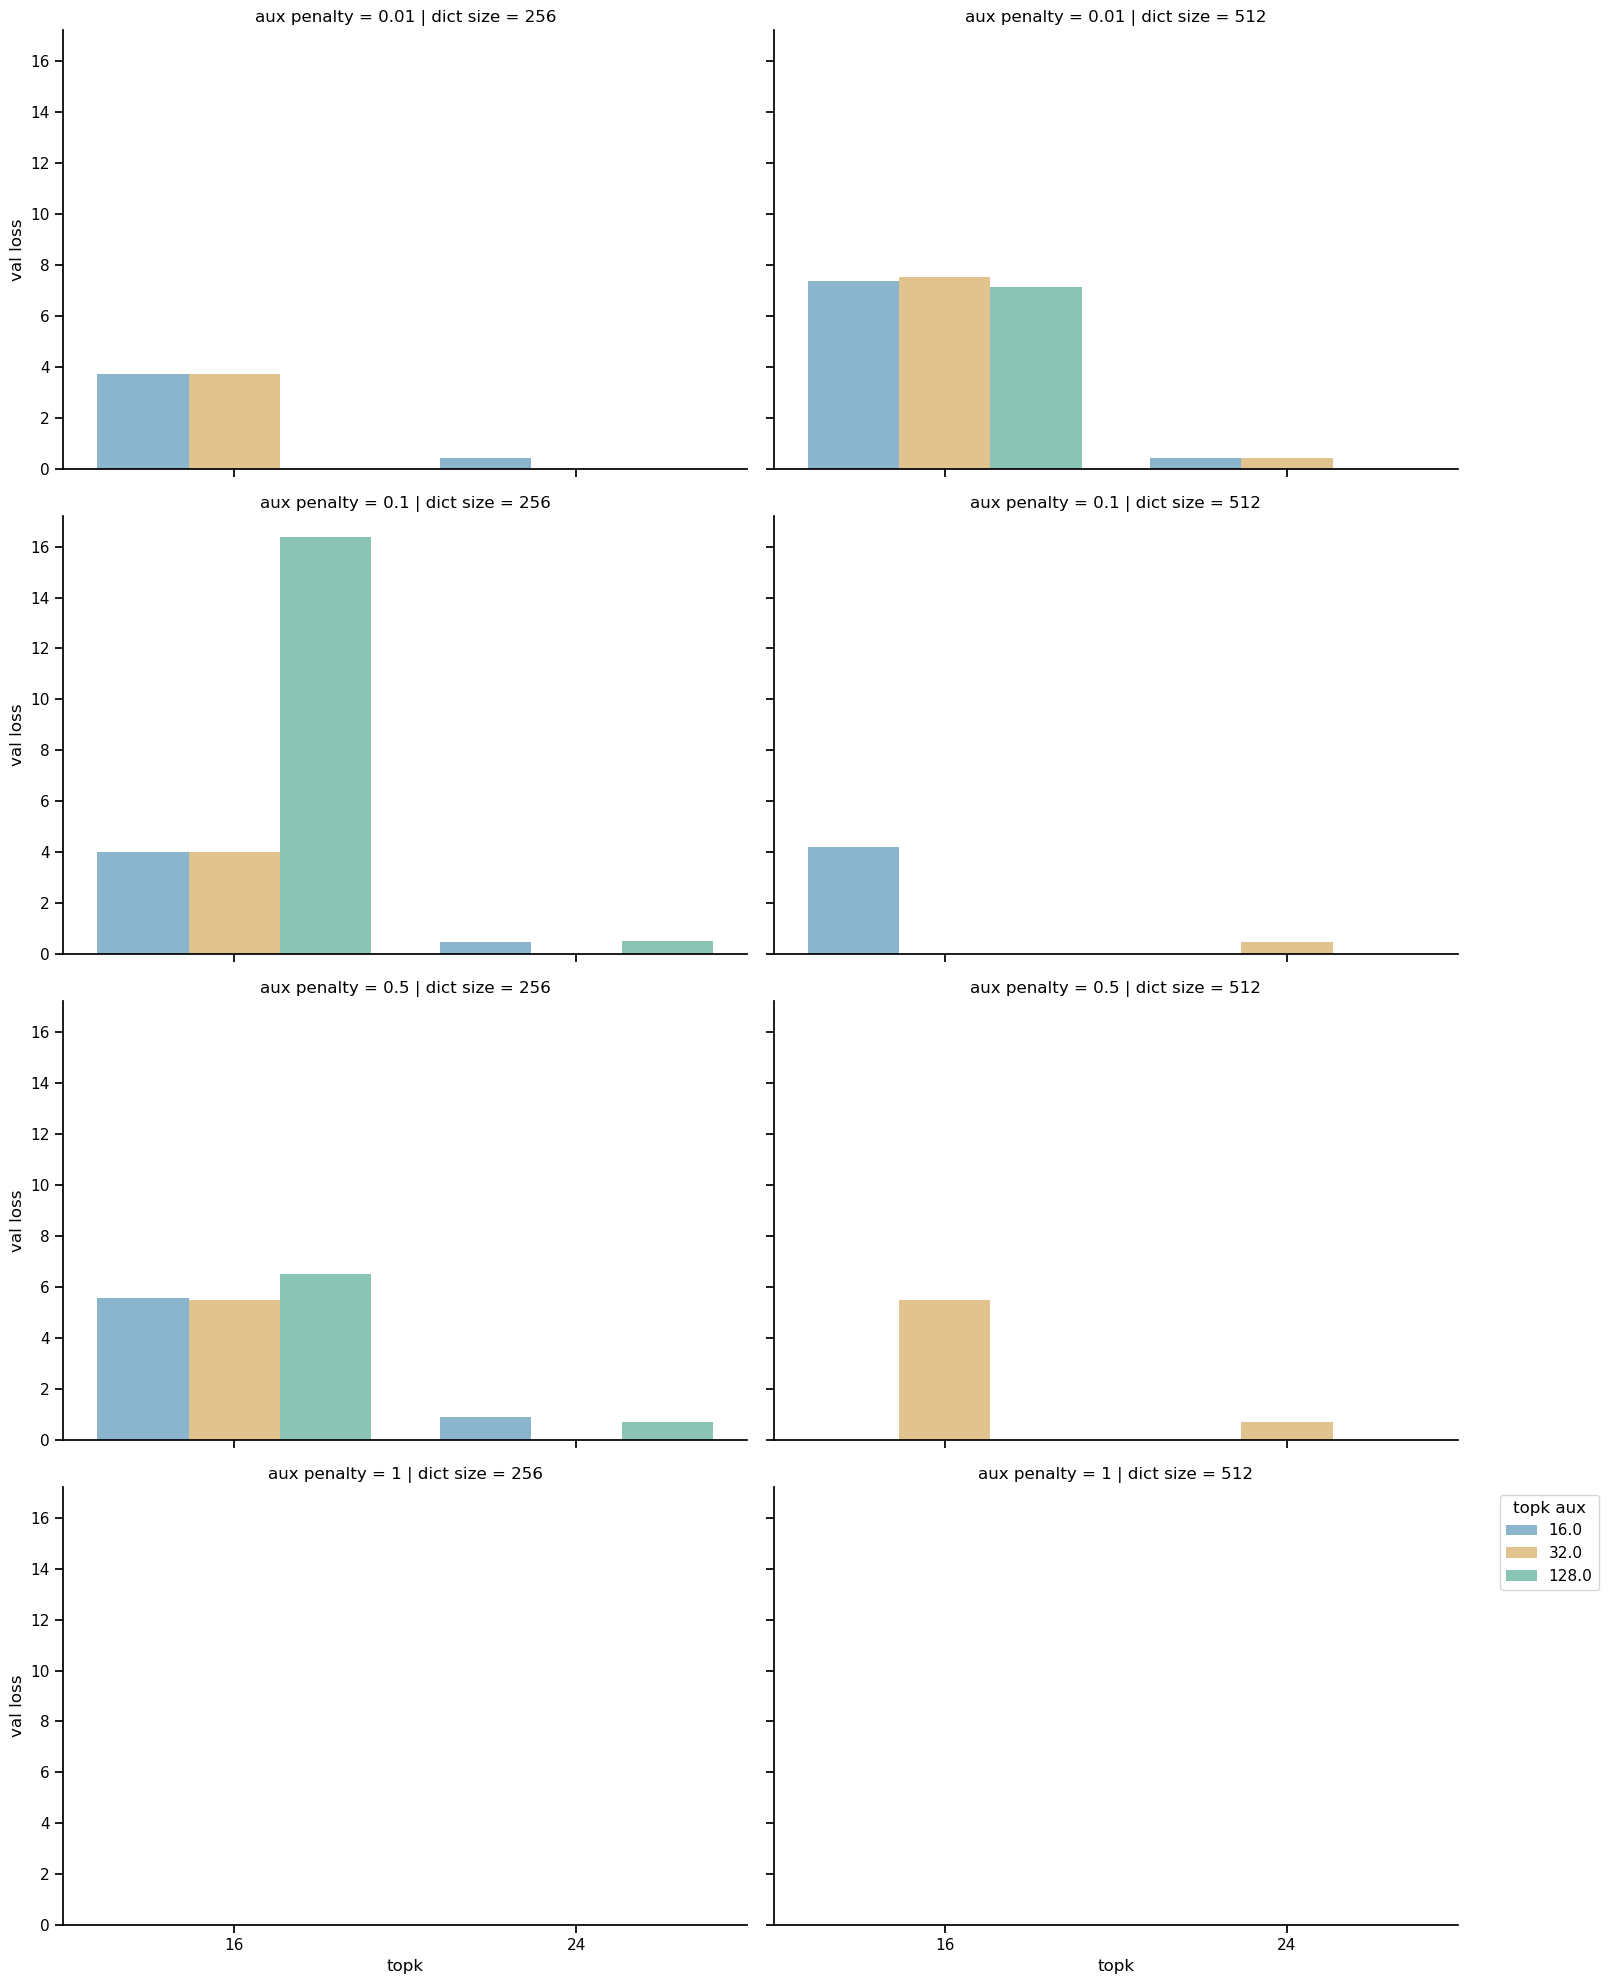

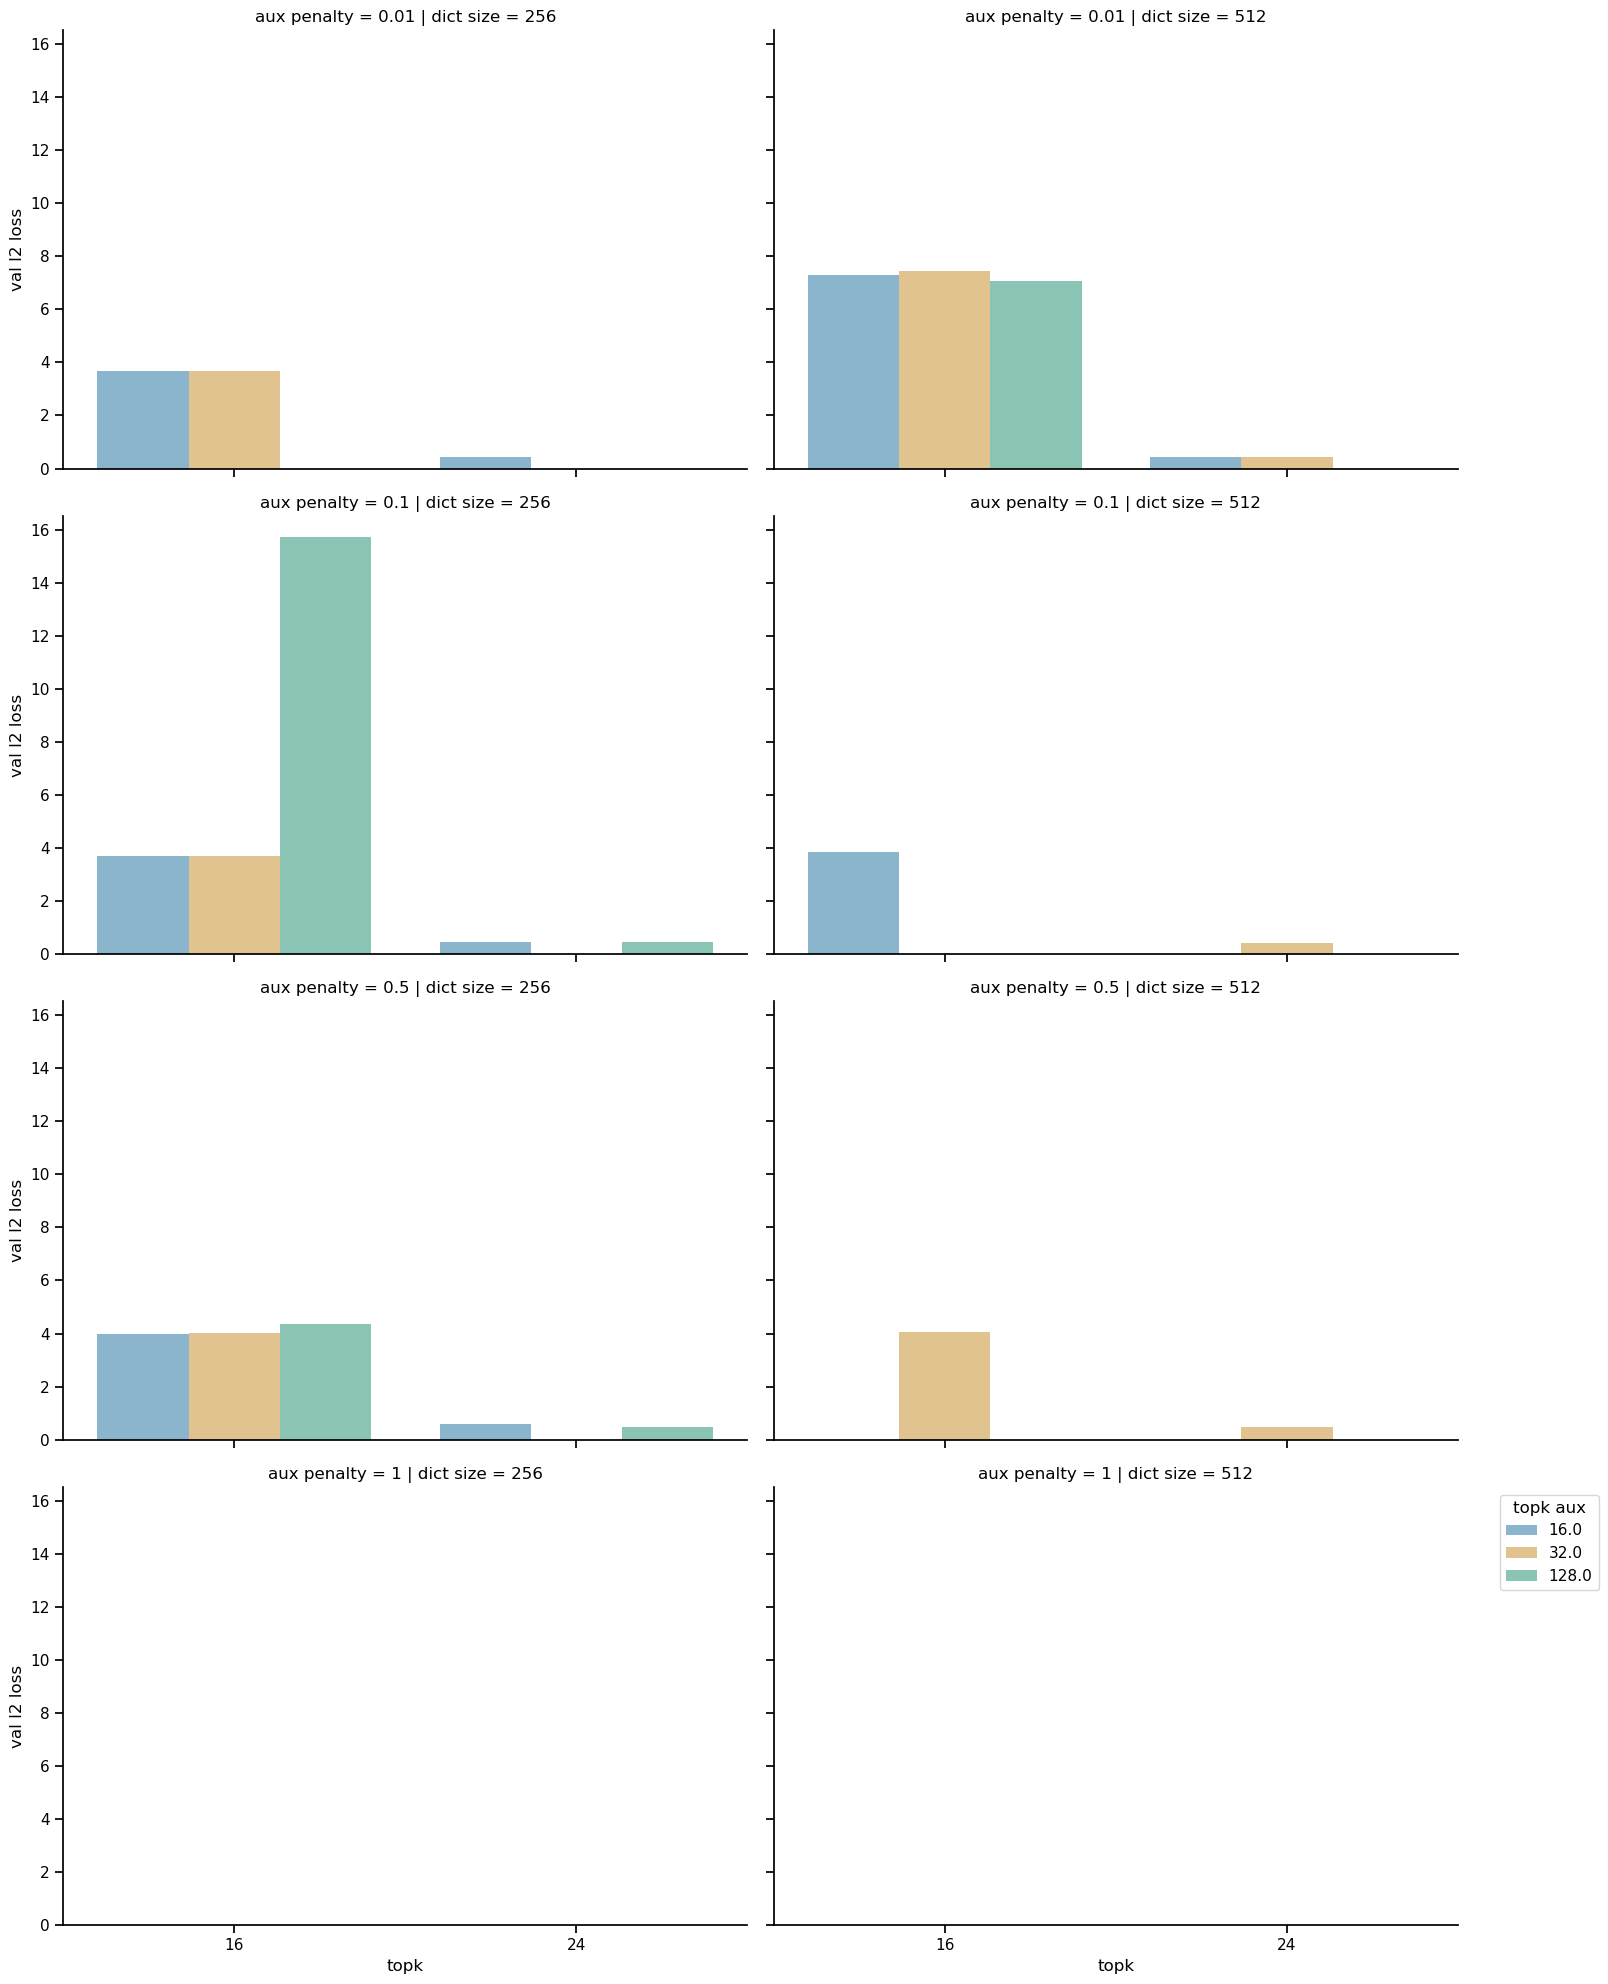

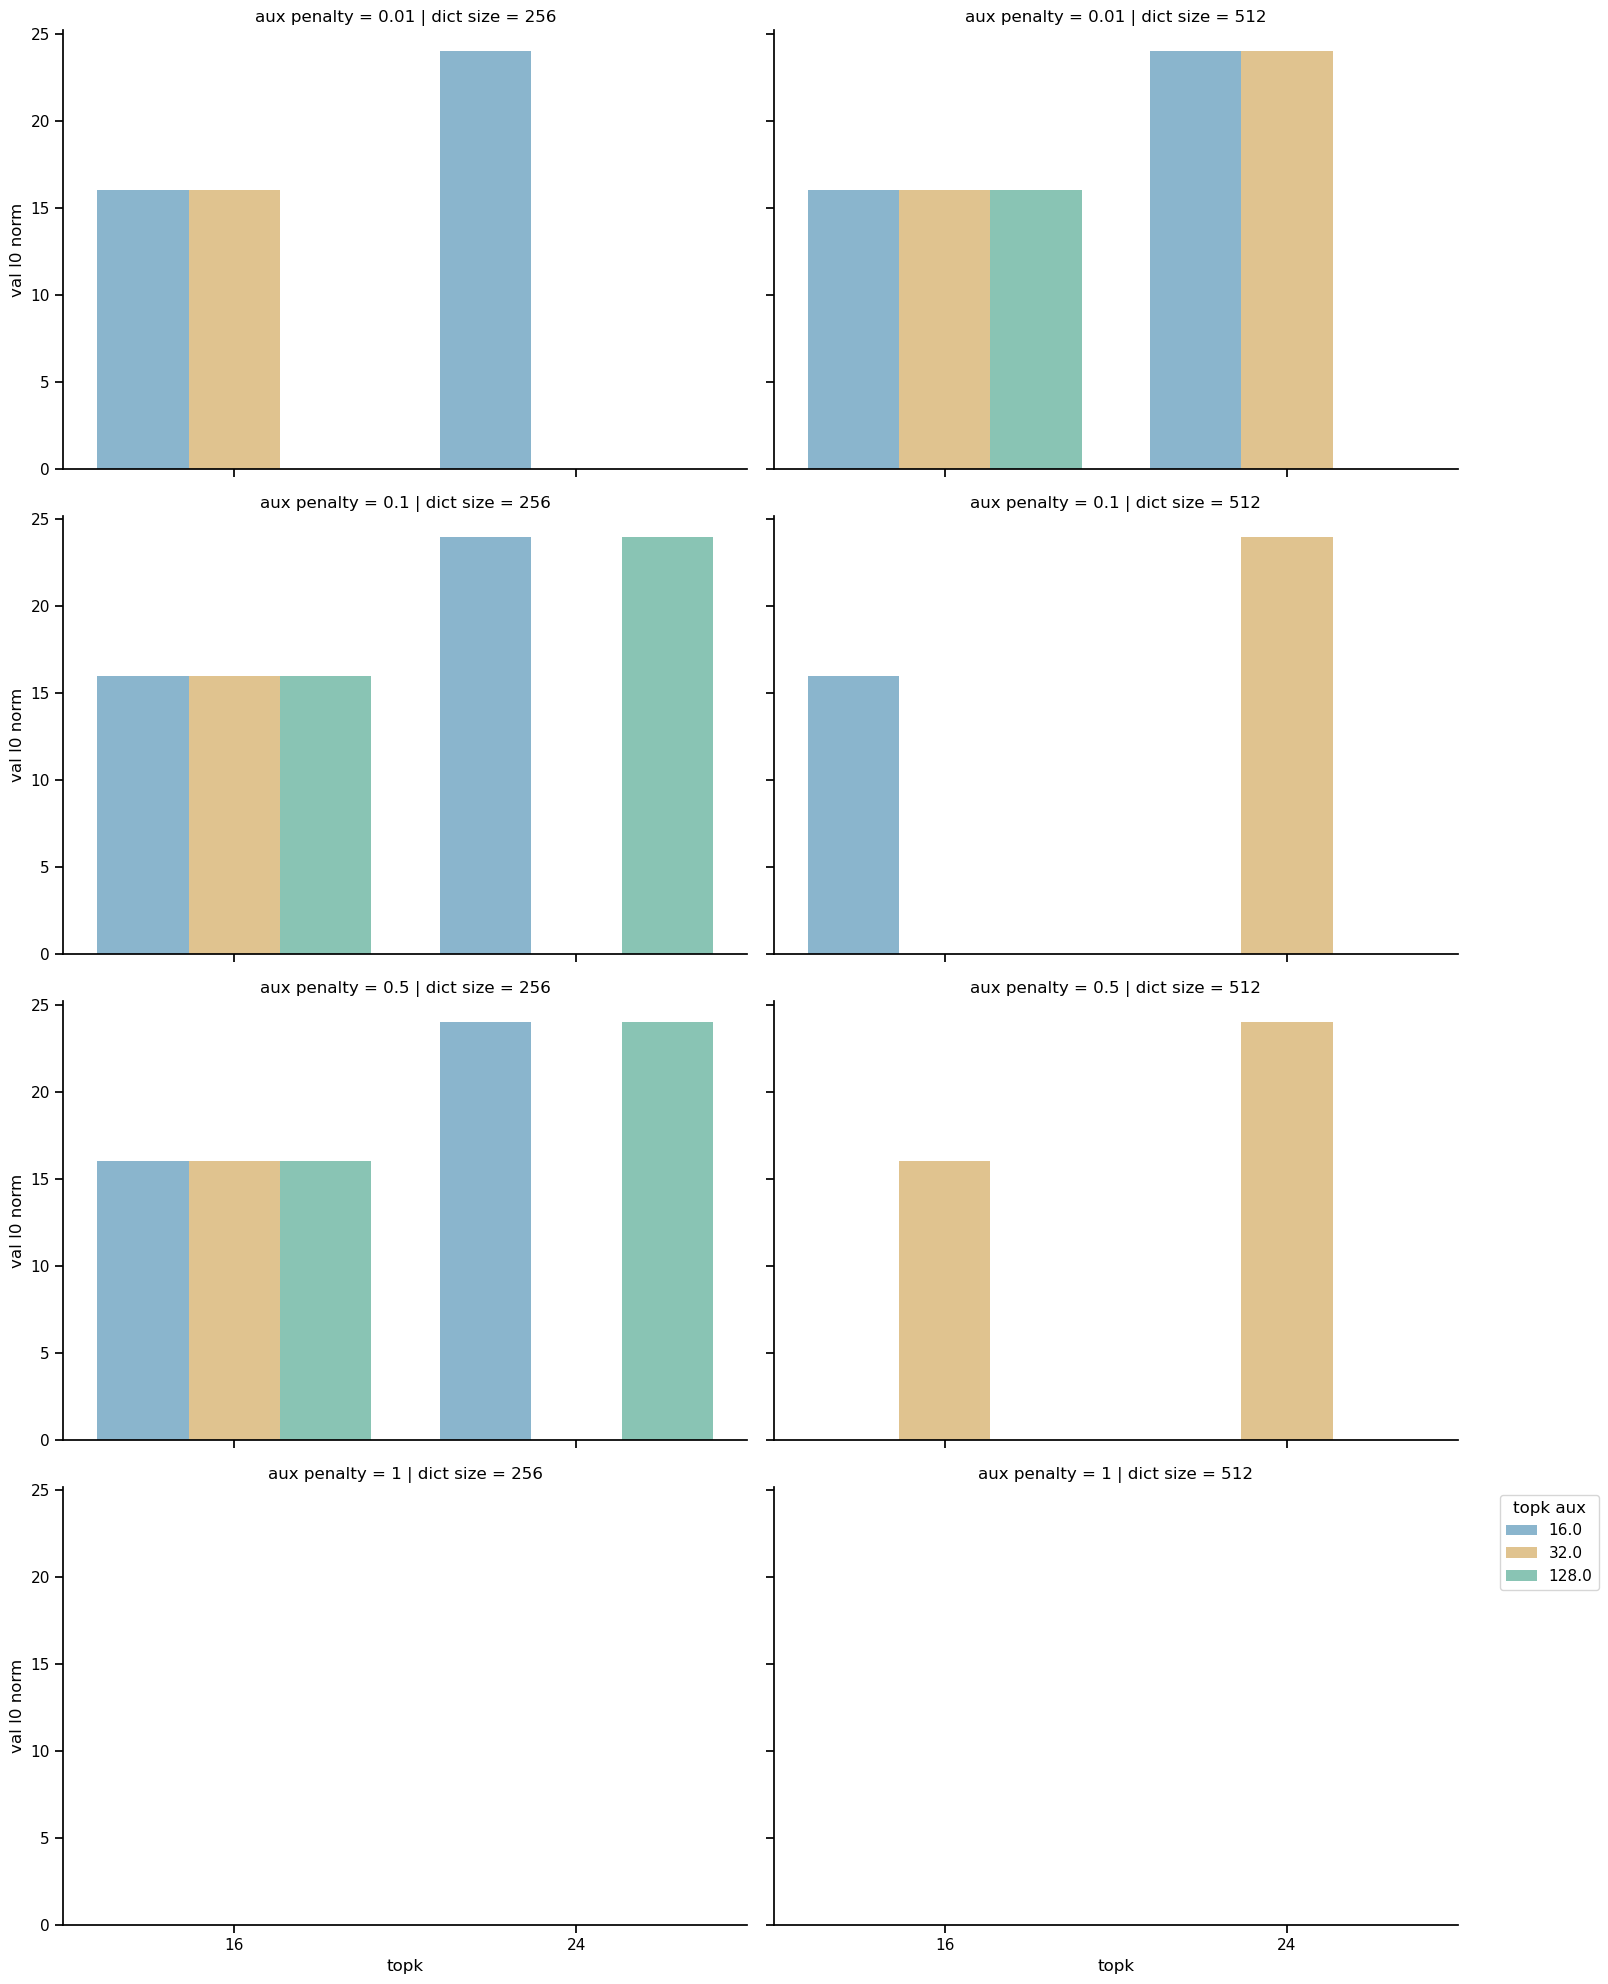

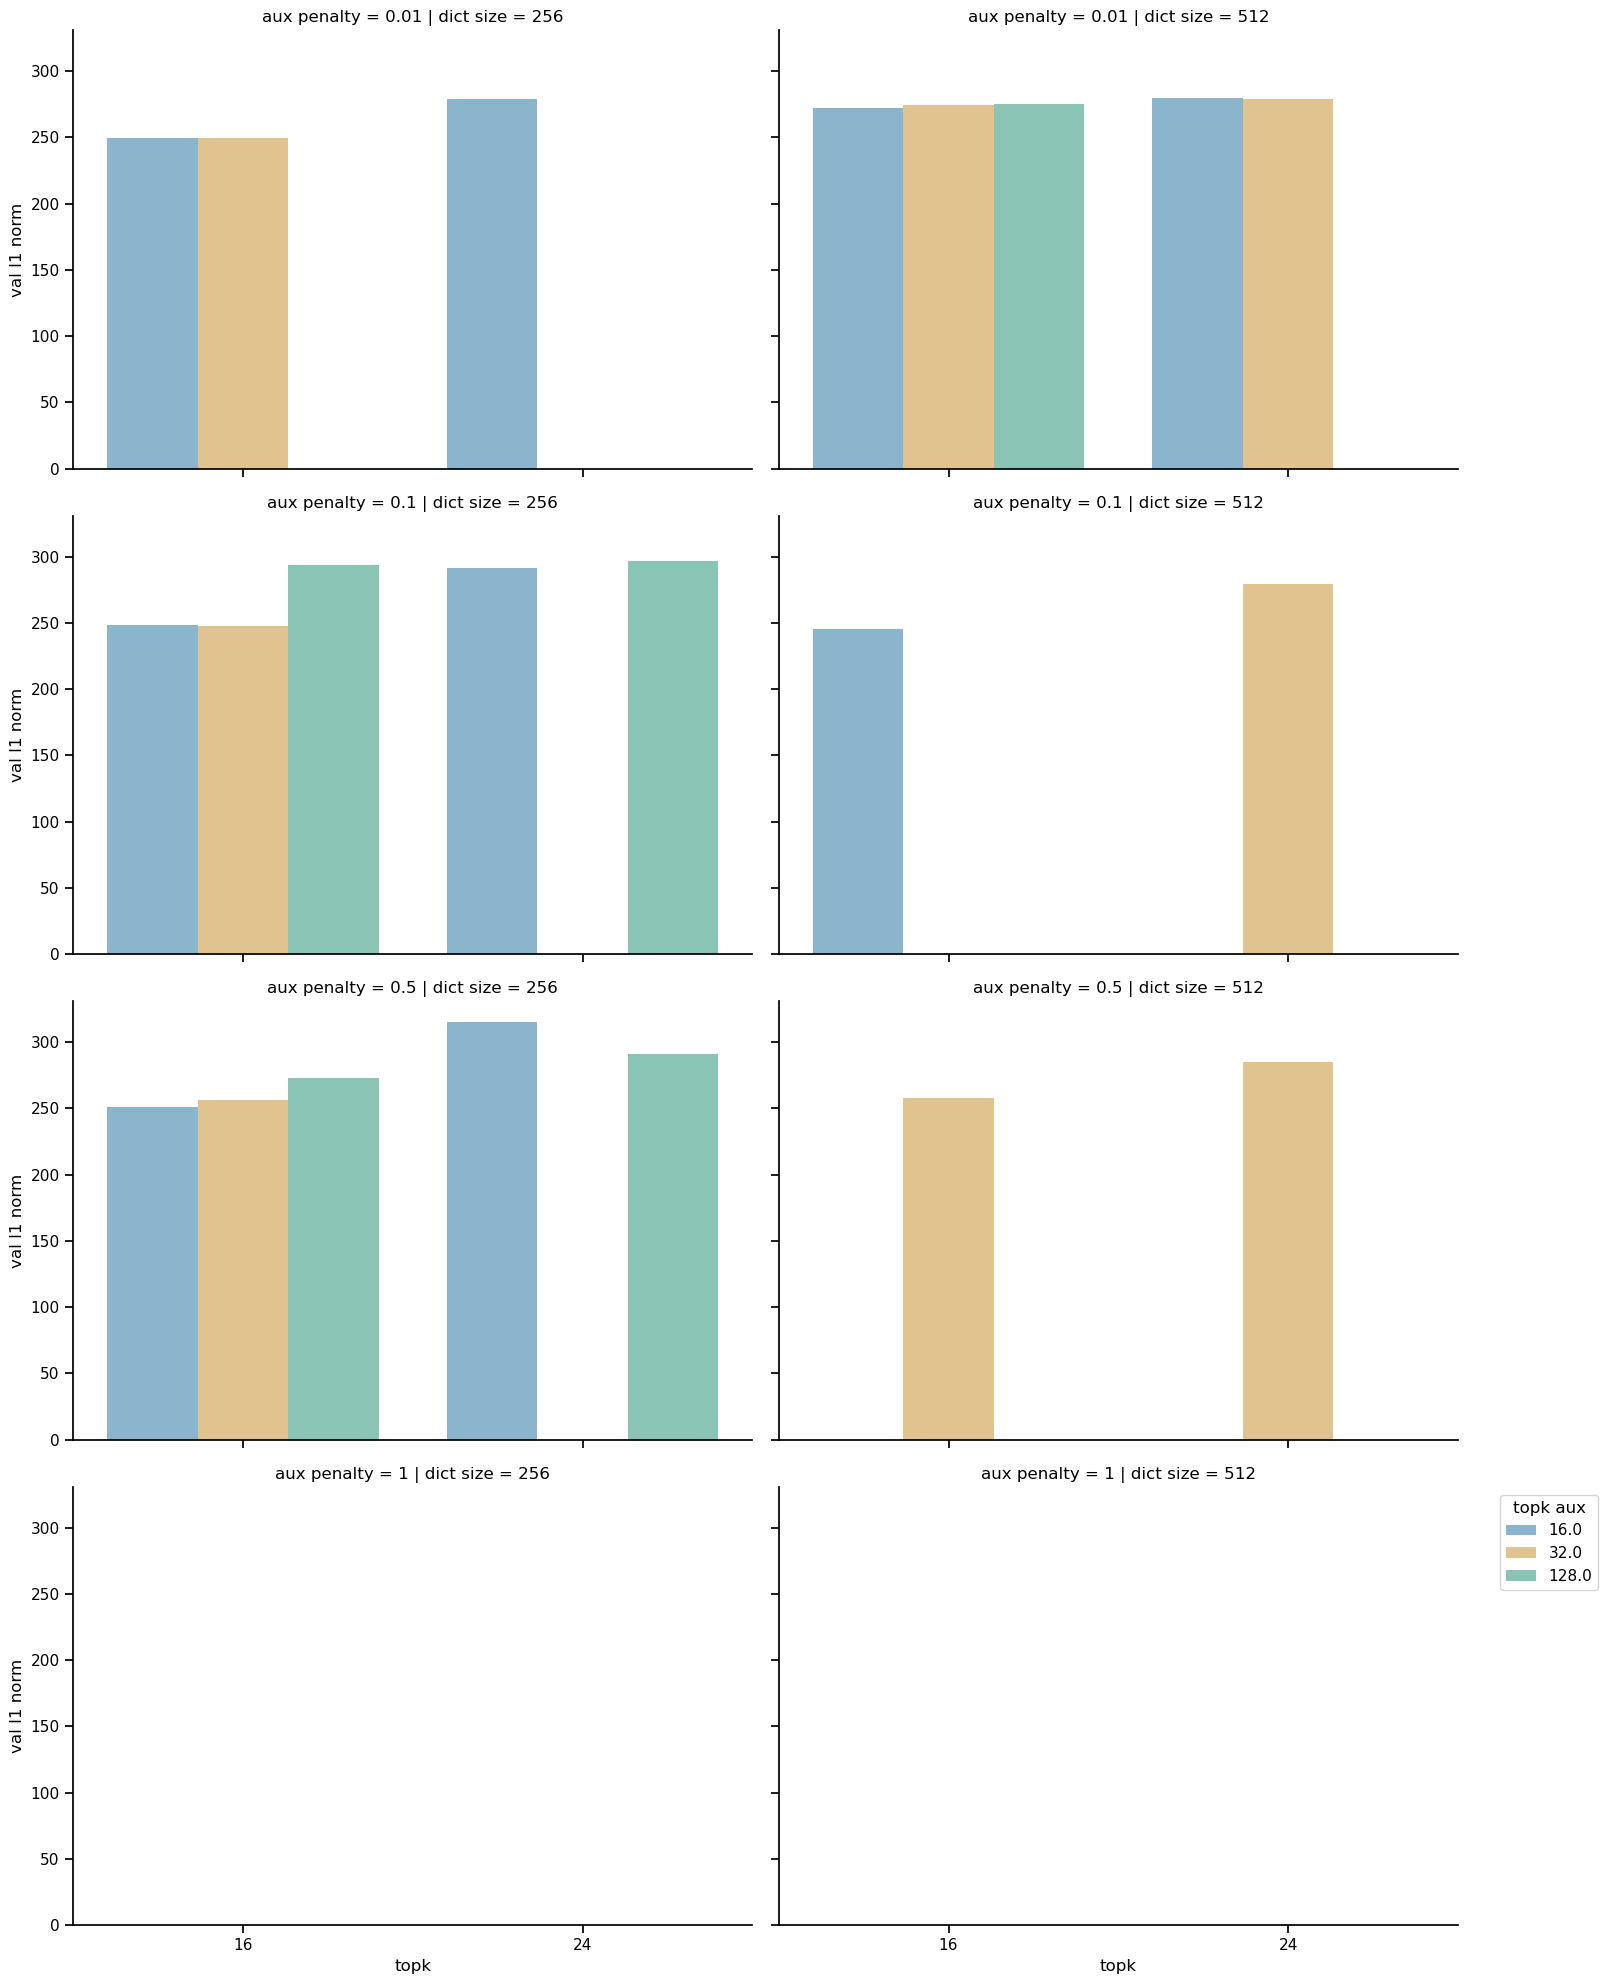

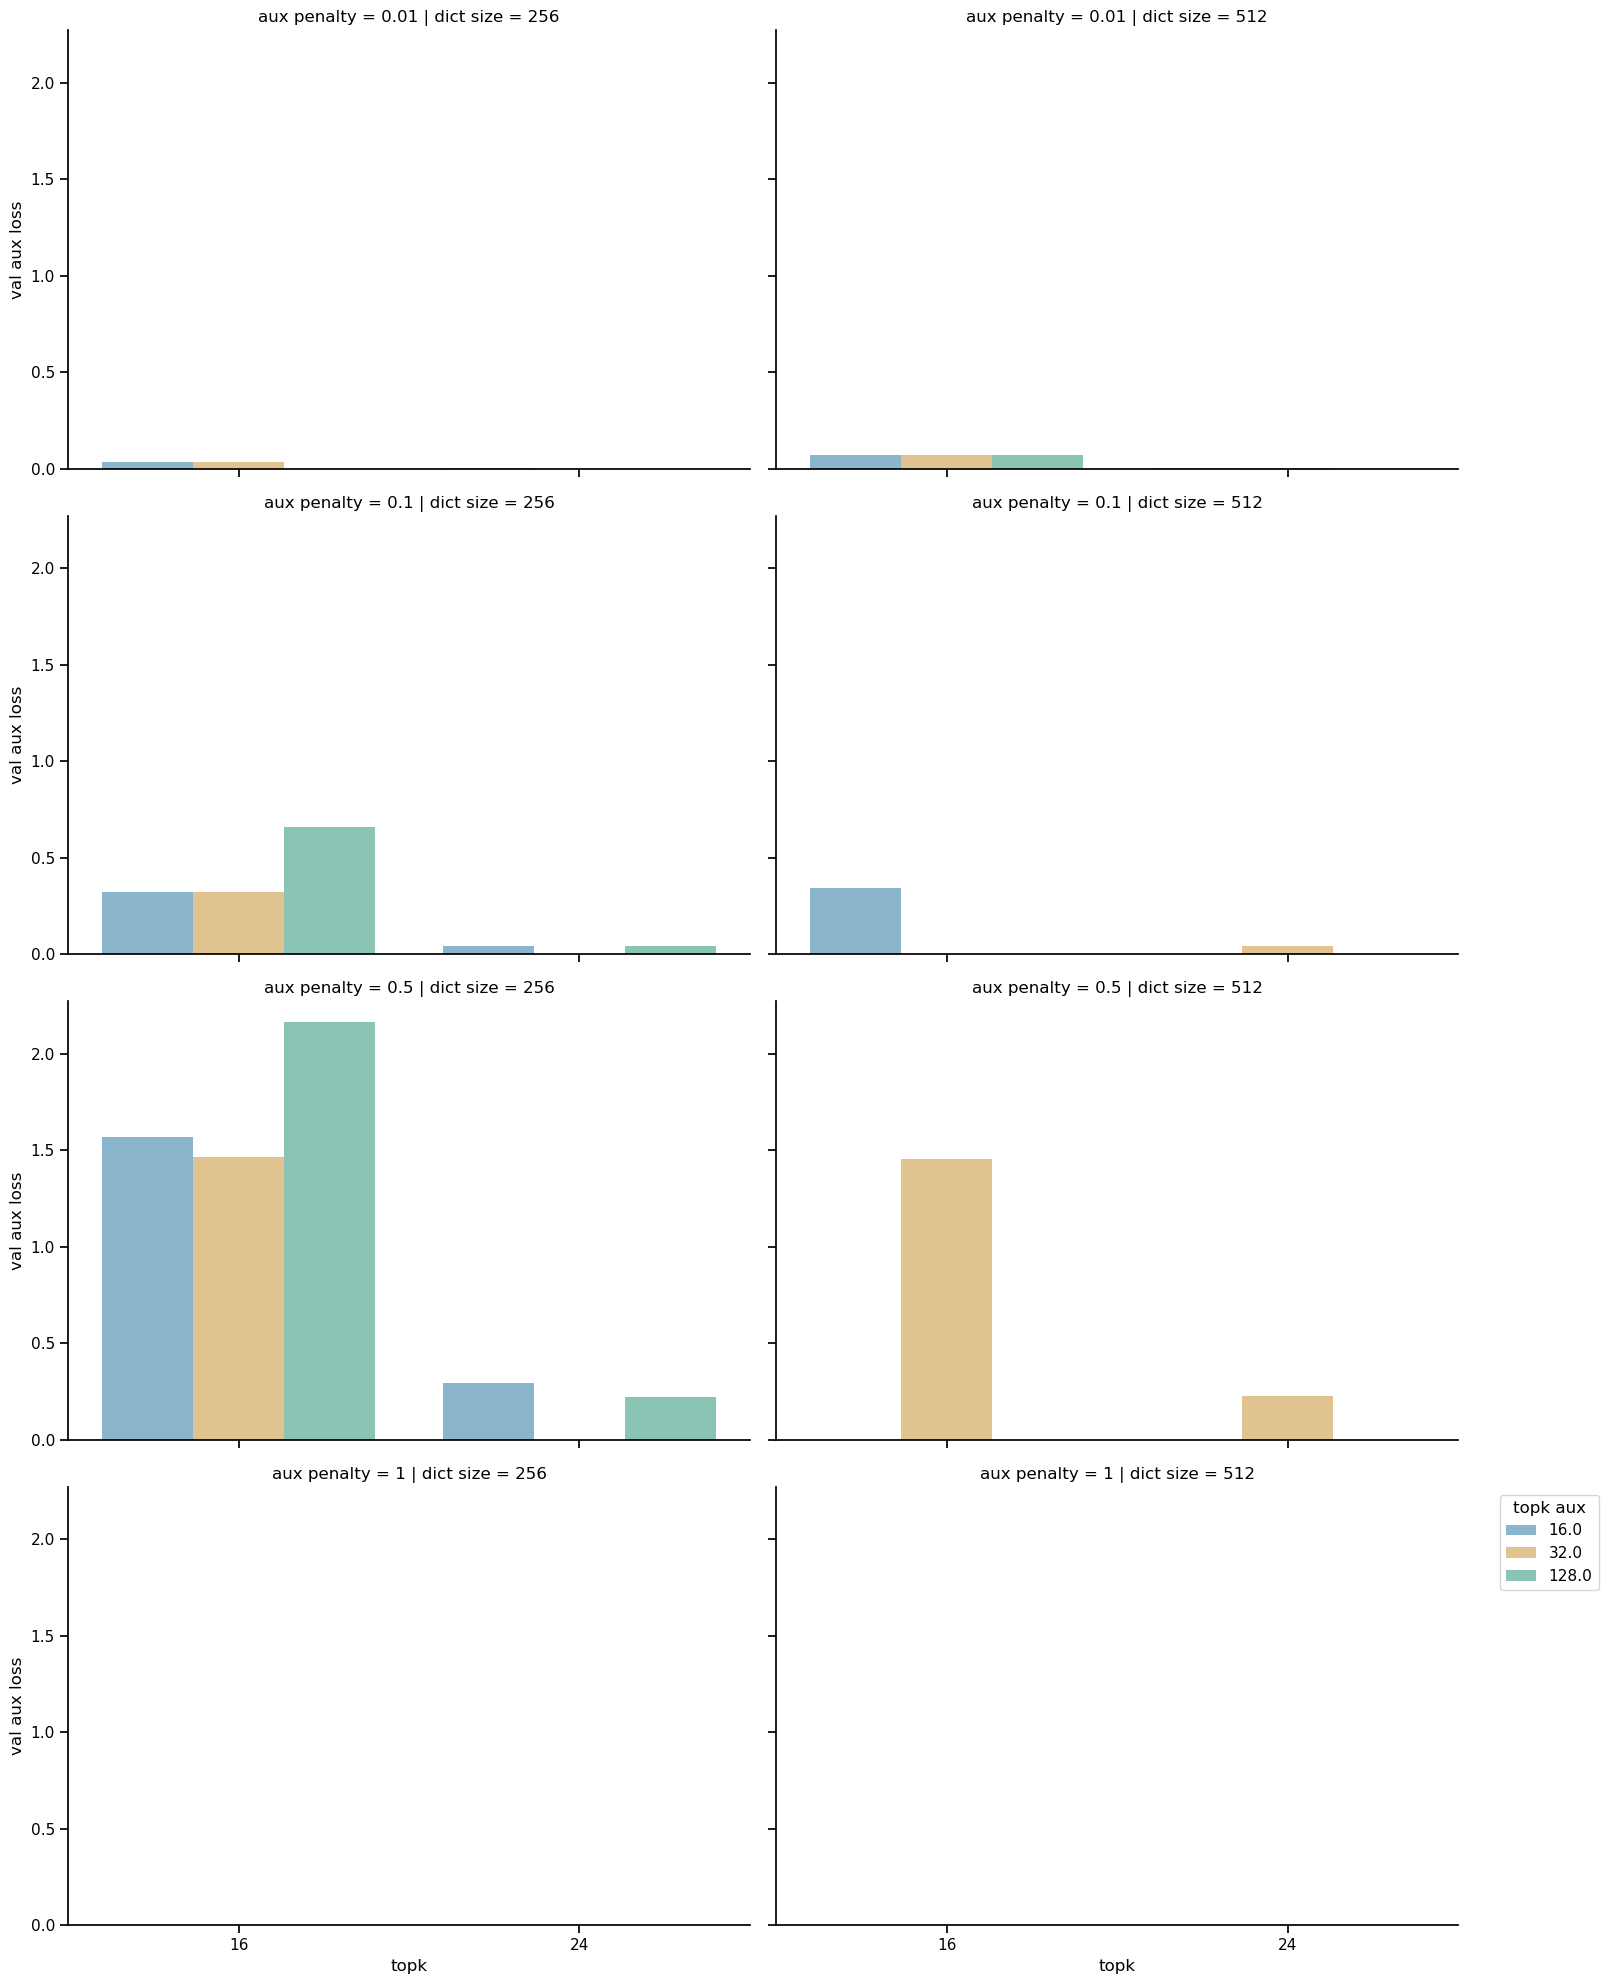

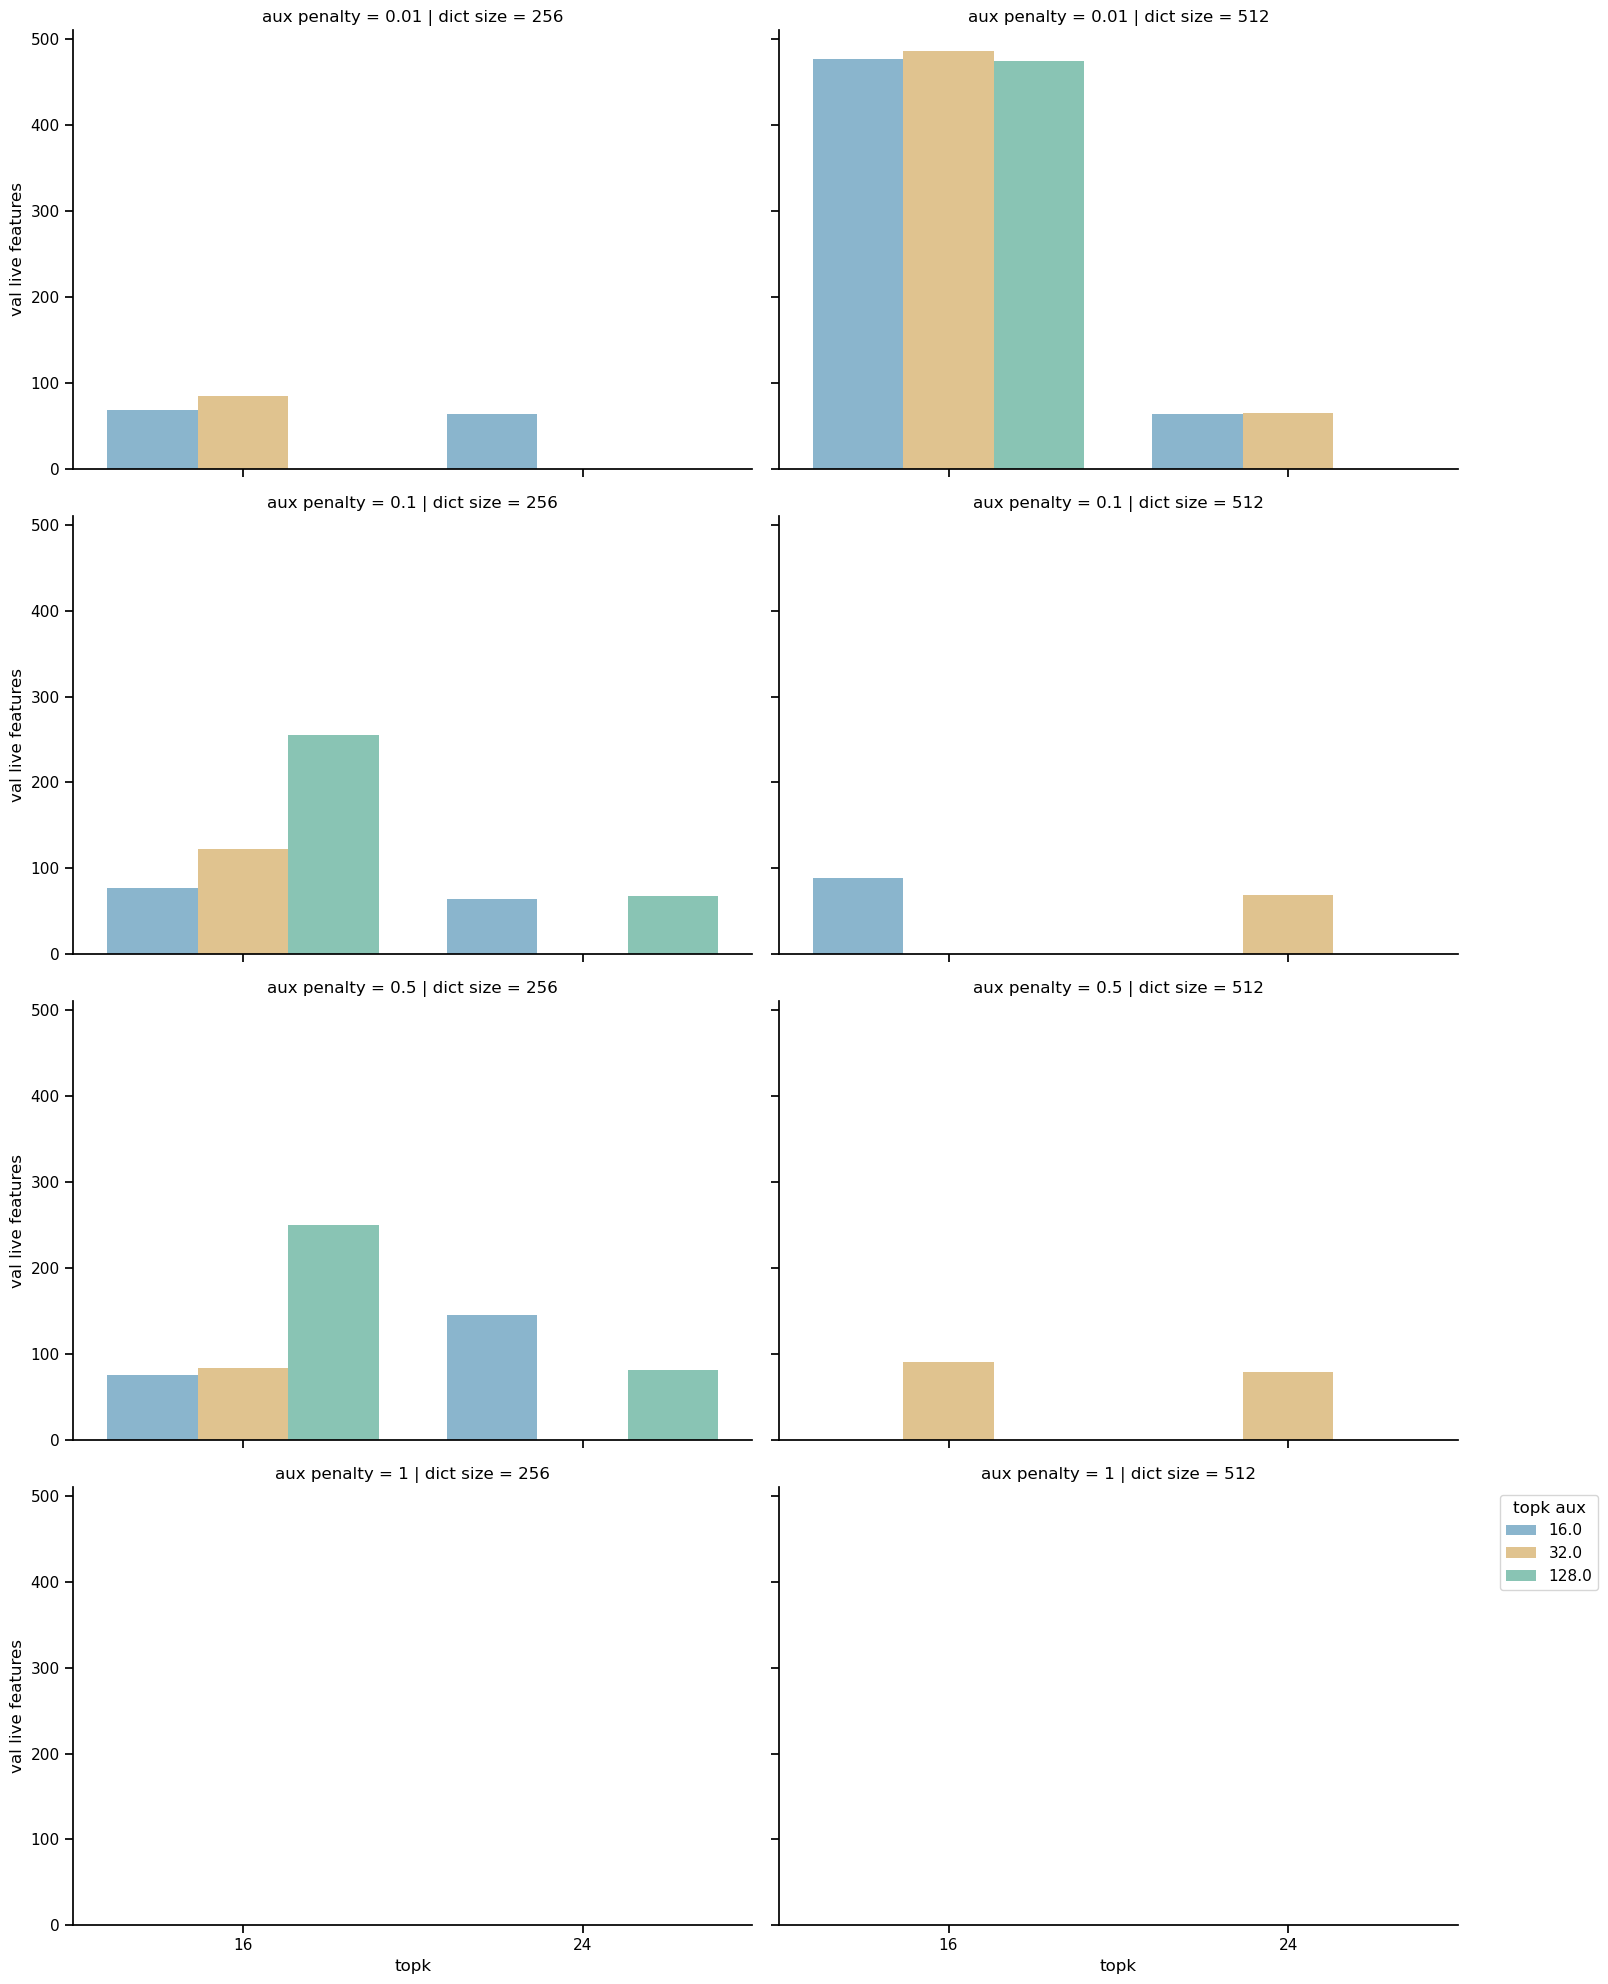

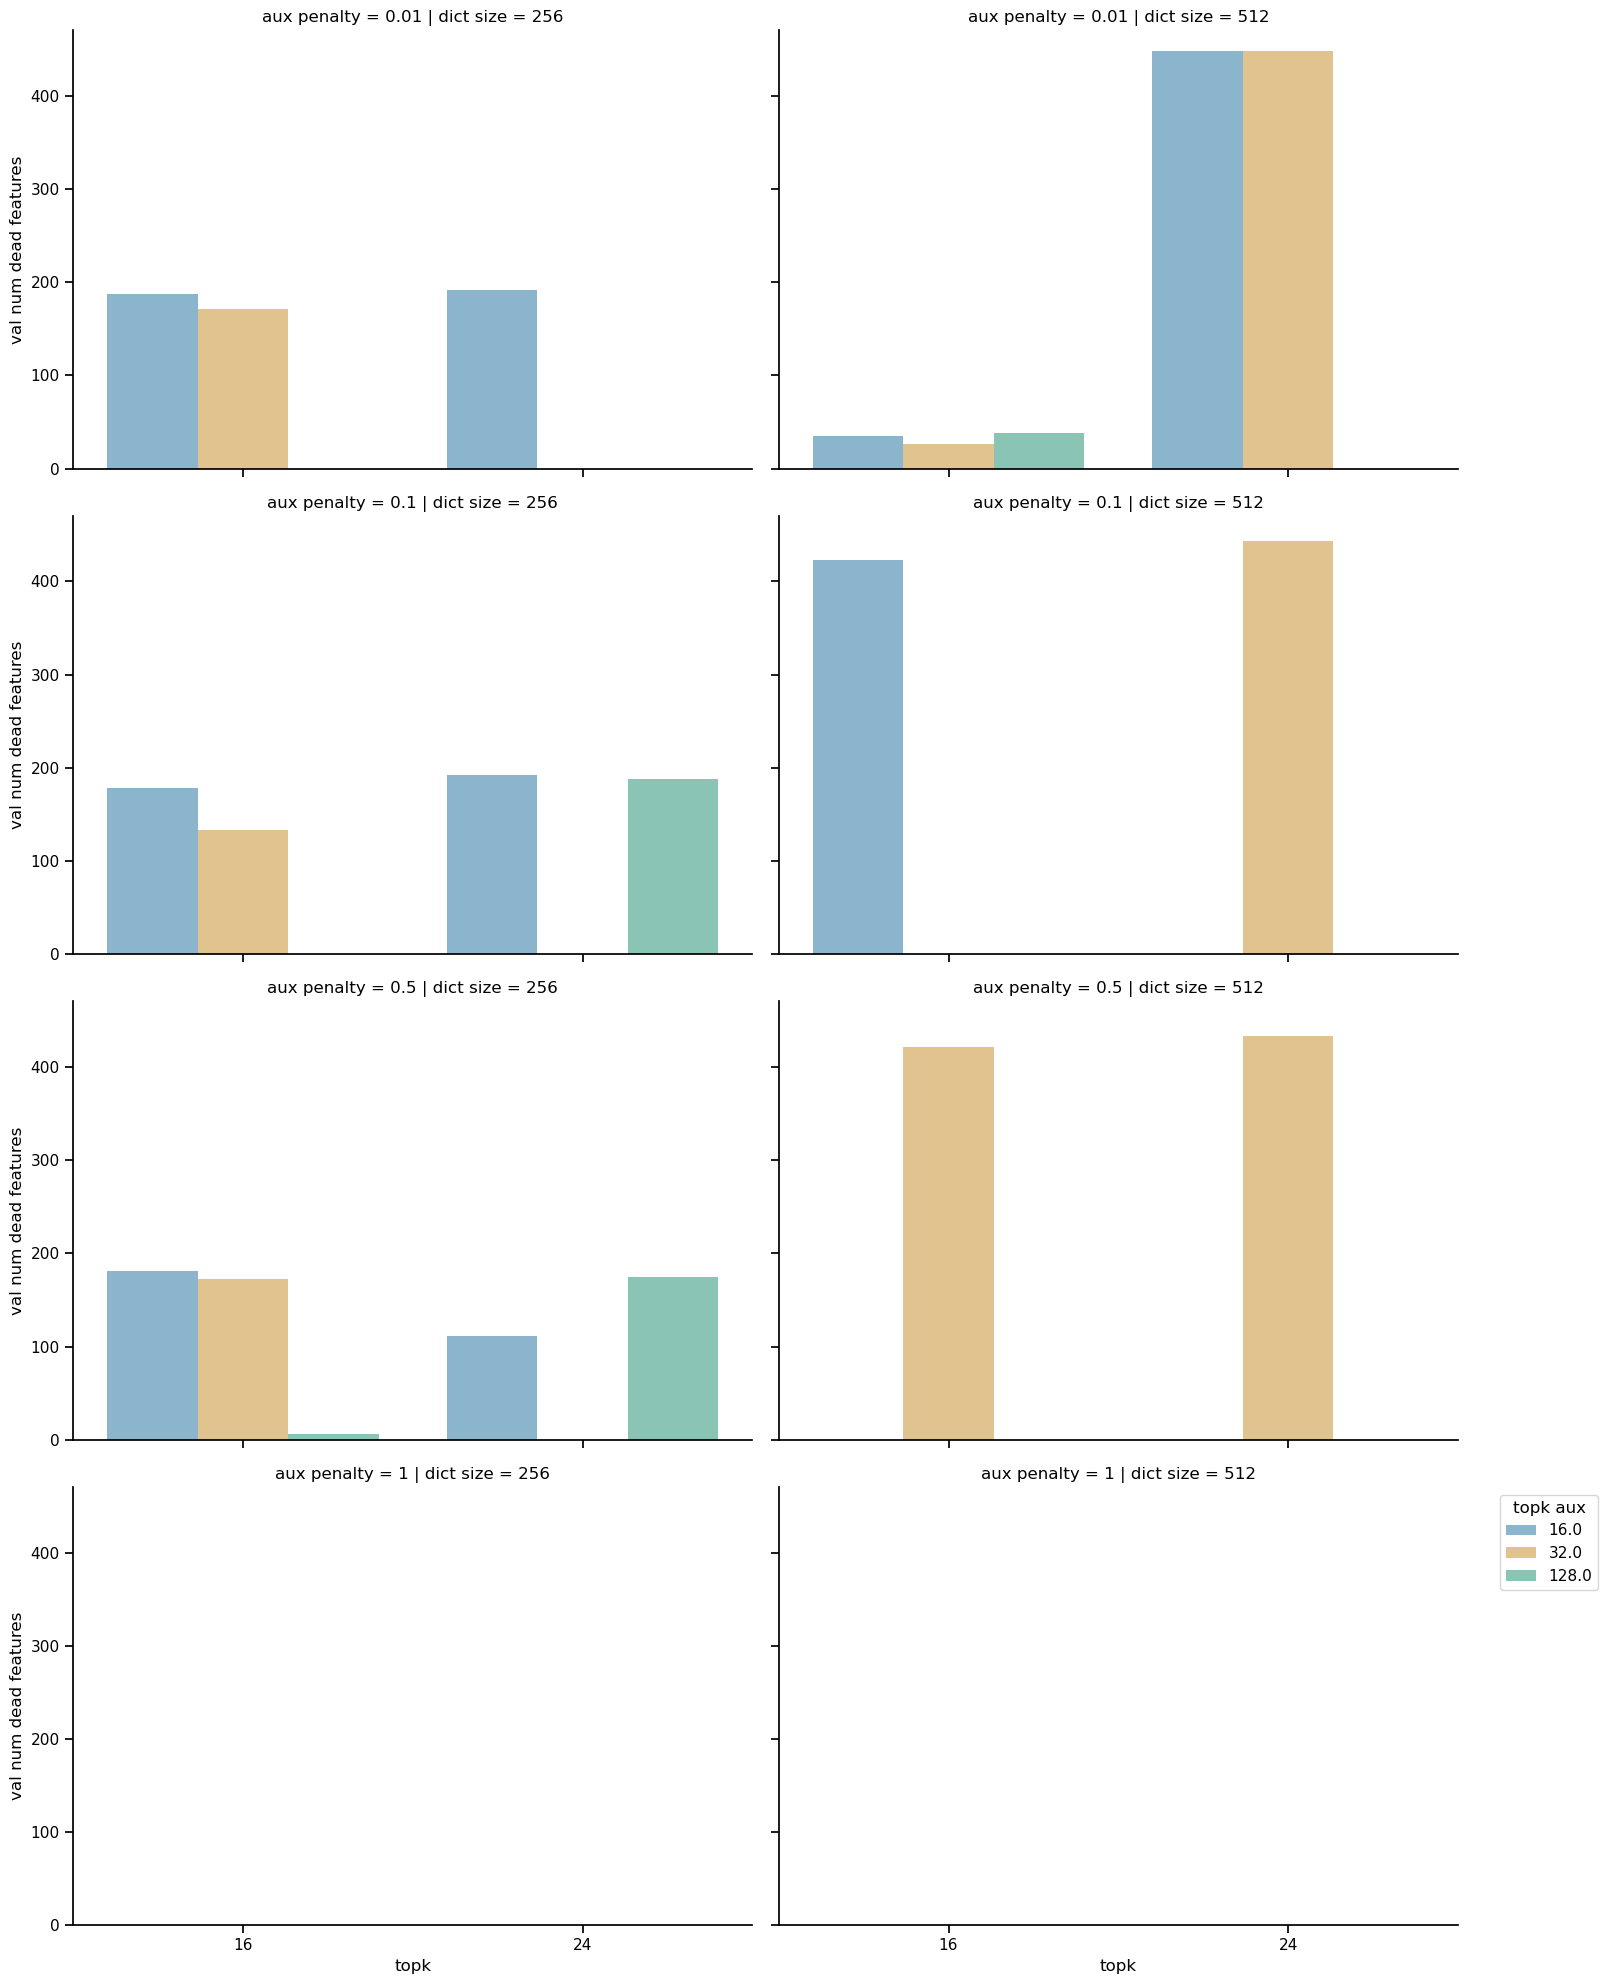

In [93]:
to_plot = bar.copy()
to_plot['topk aux'] = 2 ** np.round(np.log2(to_plot['topk aux']))

to_plot['aux penalty'] = to_plot['aux penalty'].astype(str)
to_plot['topk aux'] = to_plot['topk aux'].astype(str)
row_order = ['0.01', '0.1', '0.5', '1']
hue_order = ['16', '32', '128']
palette = ['C0','C1','C2']
for col in test_cols:
    g = sns.catplot(data=to_plot, kind='bar',
                    y=col, alpha=0.5,
                    row='aux penalty',
                    x='topk',
                    col='dict size',
                    hue='topk aux',
                    row_order=row_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='topk aux',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='topk aux', bbox_to_anchor=(1.05, 1), loc='upper left')


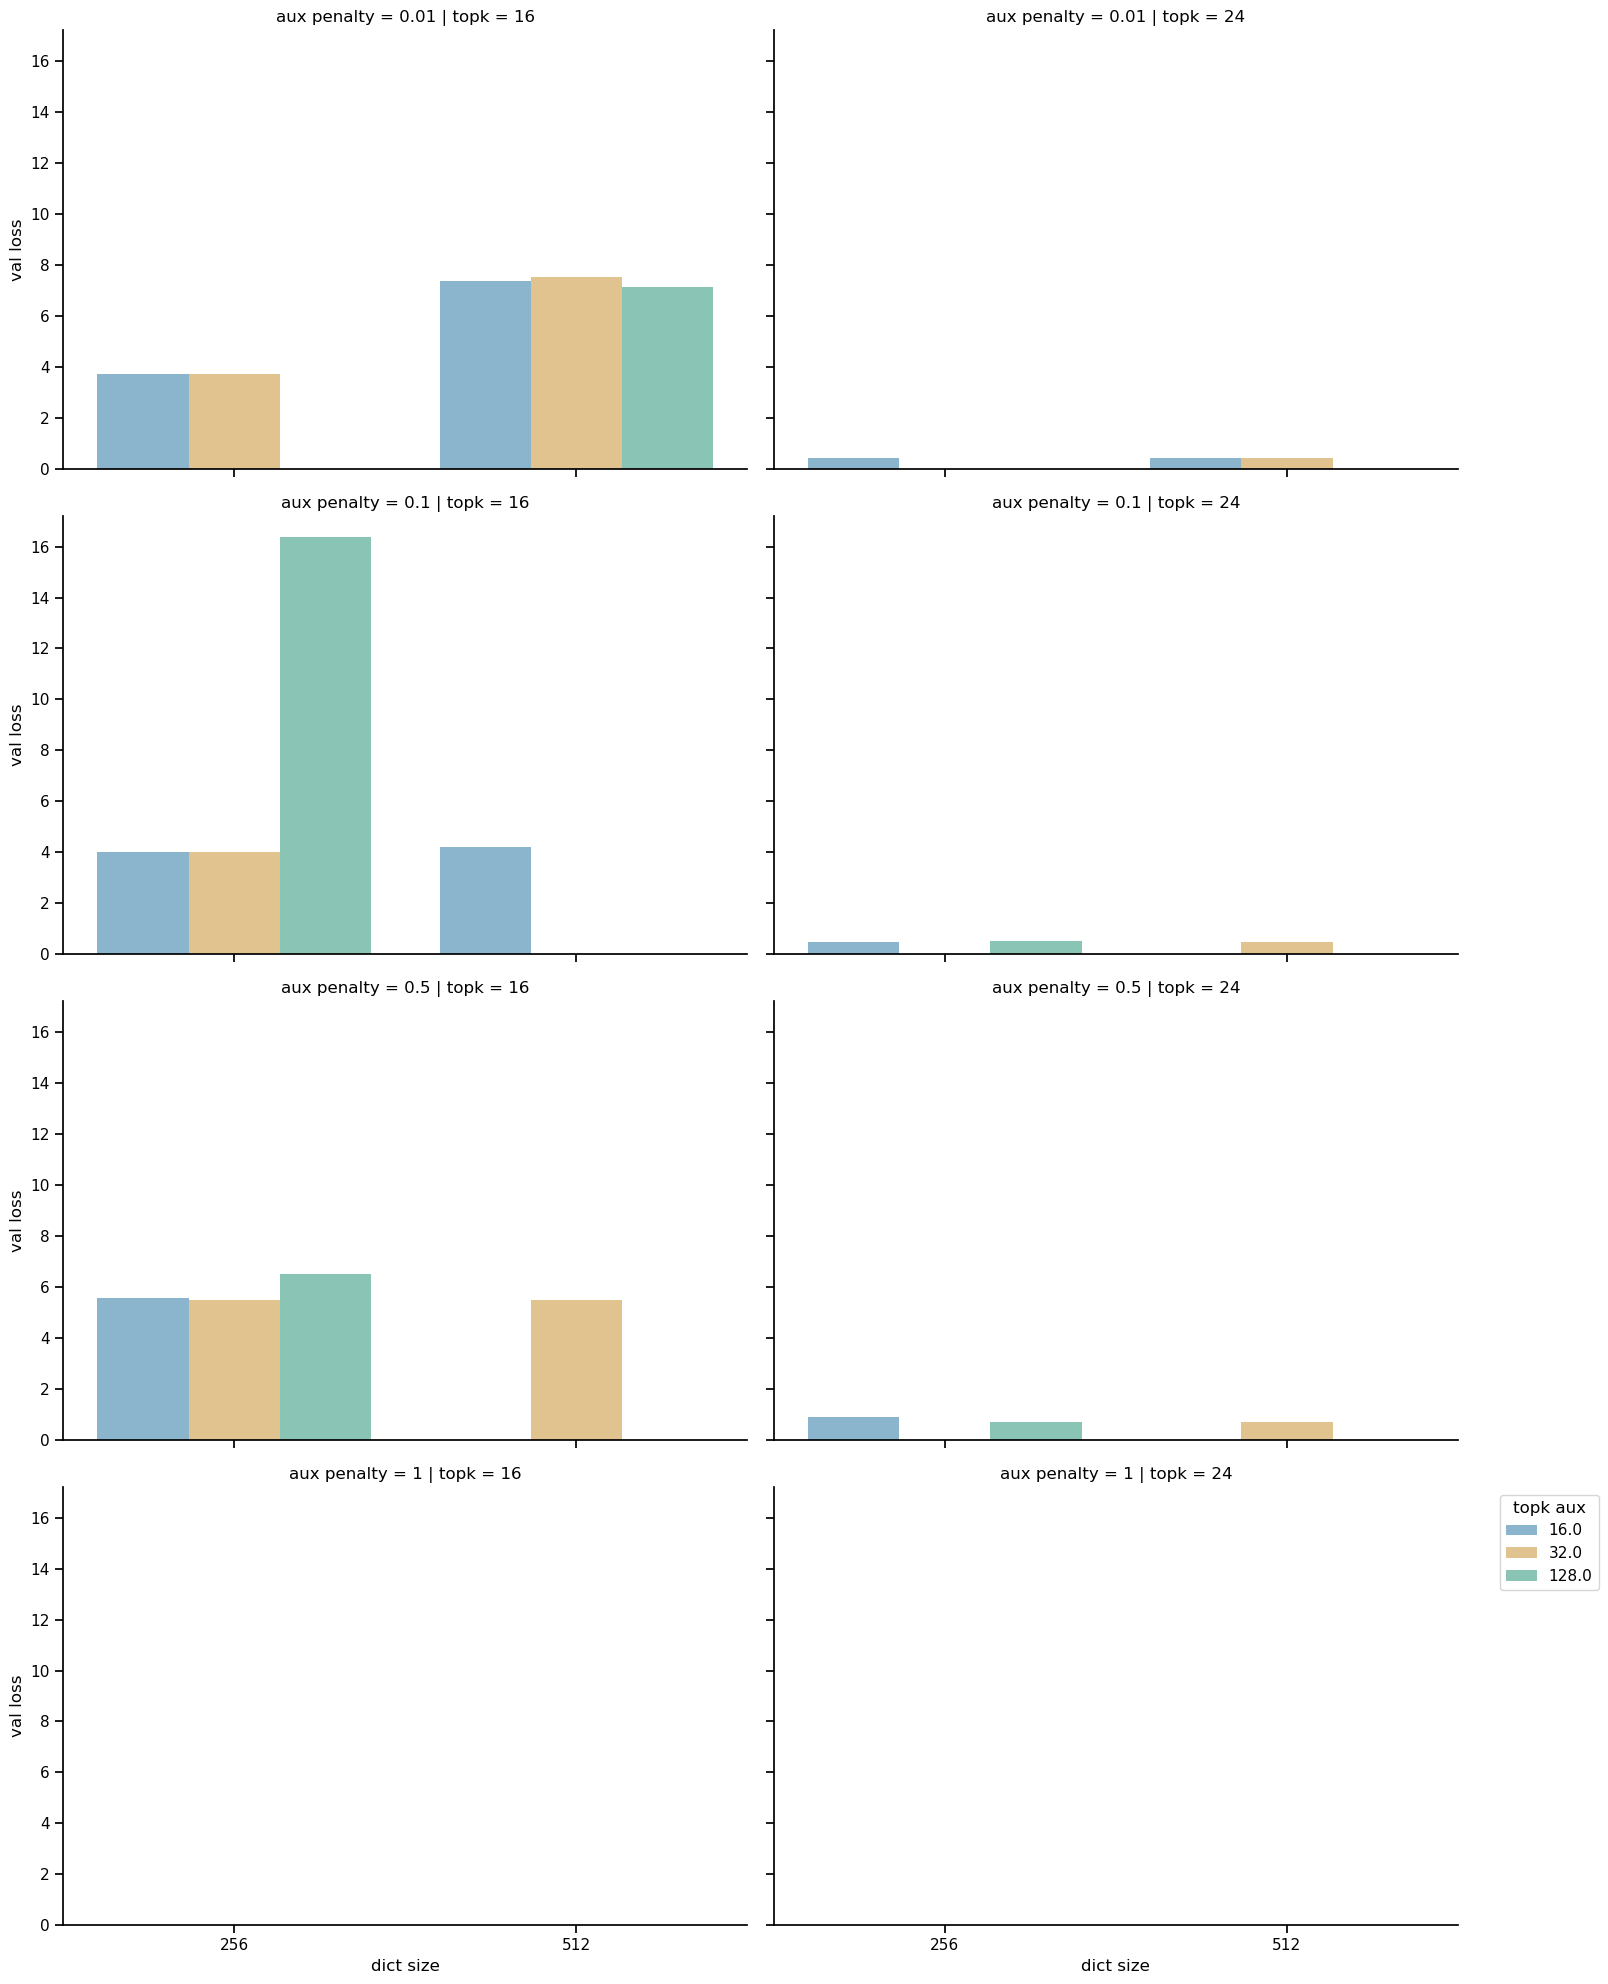

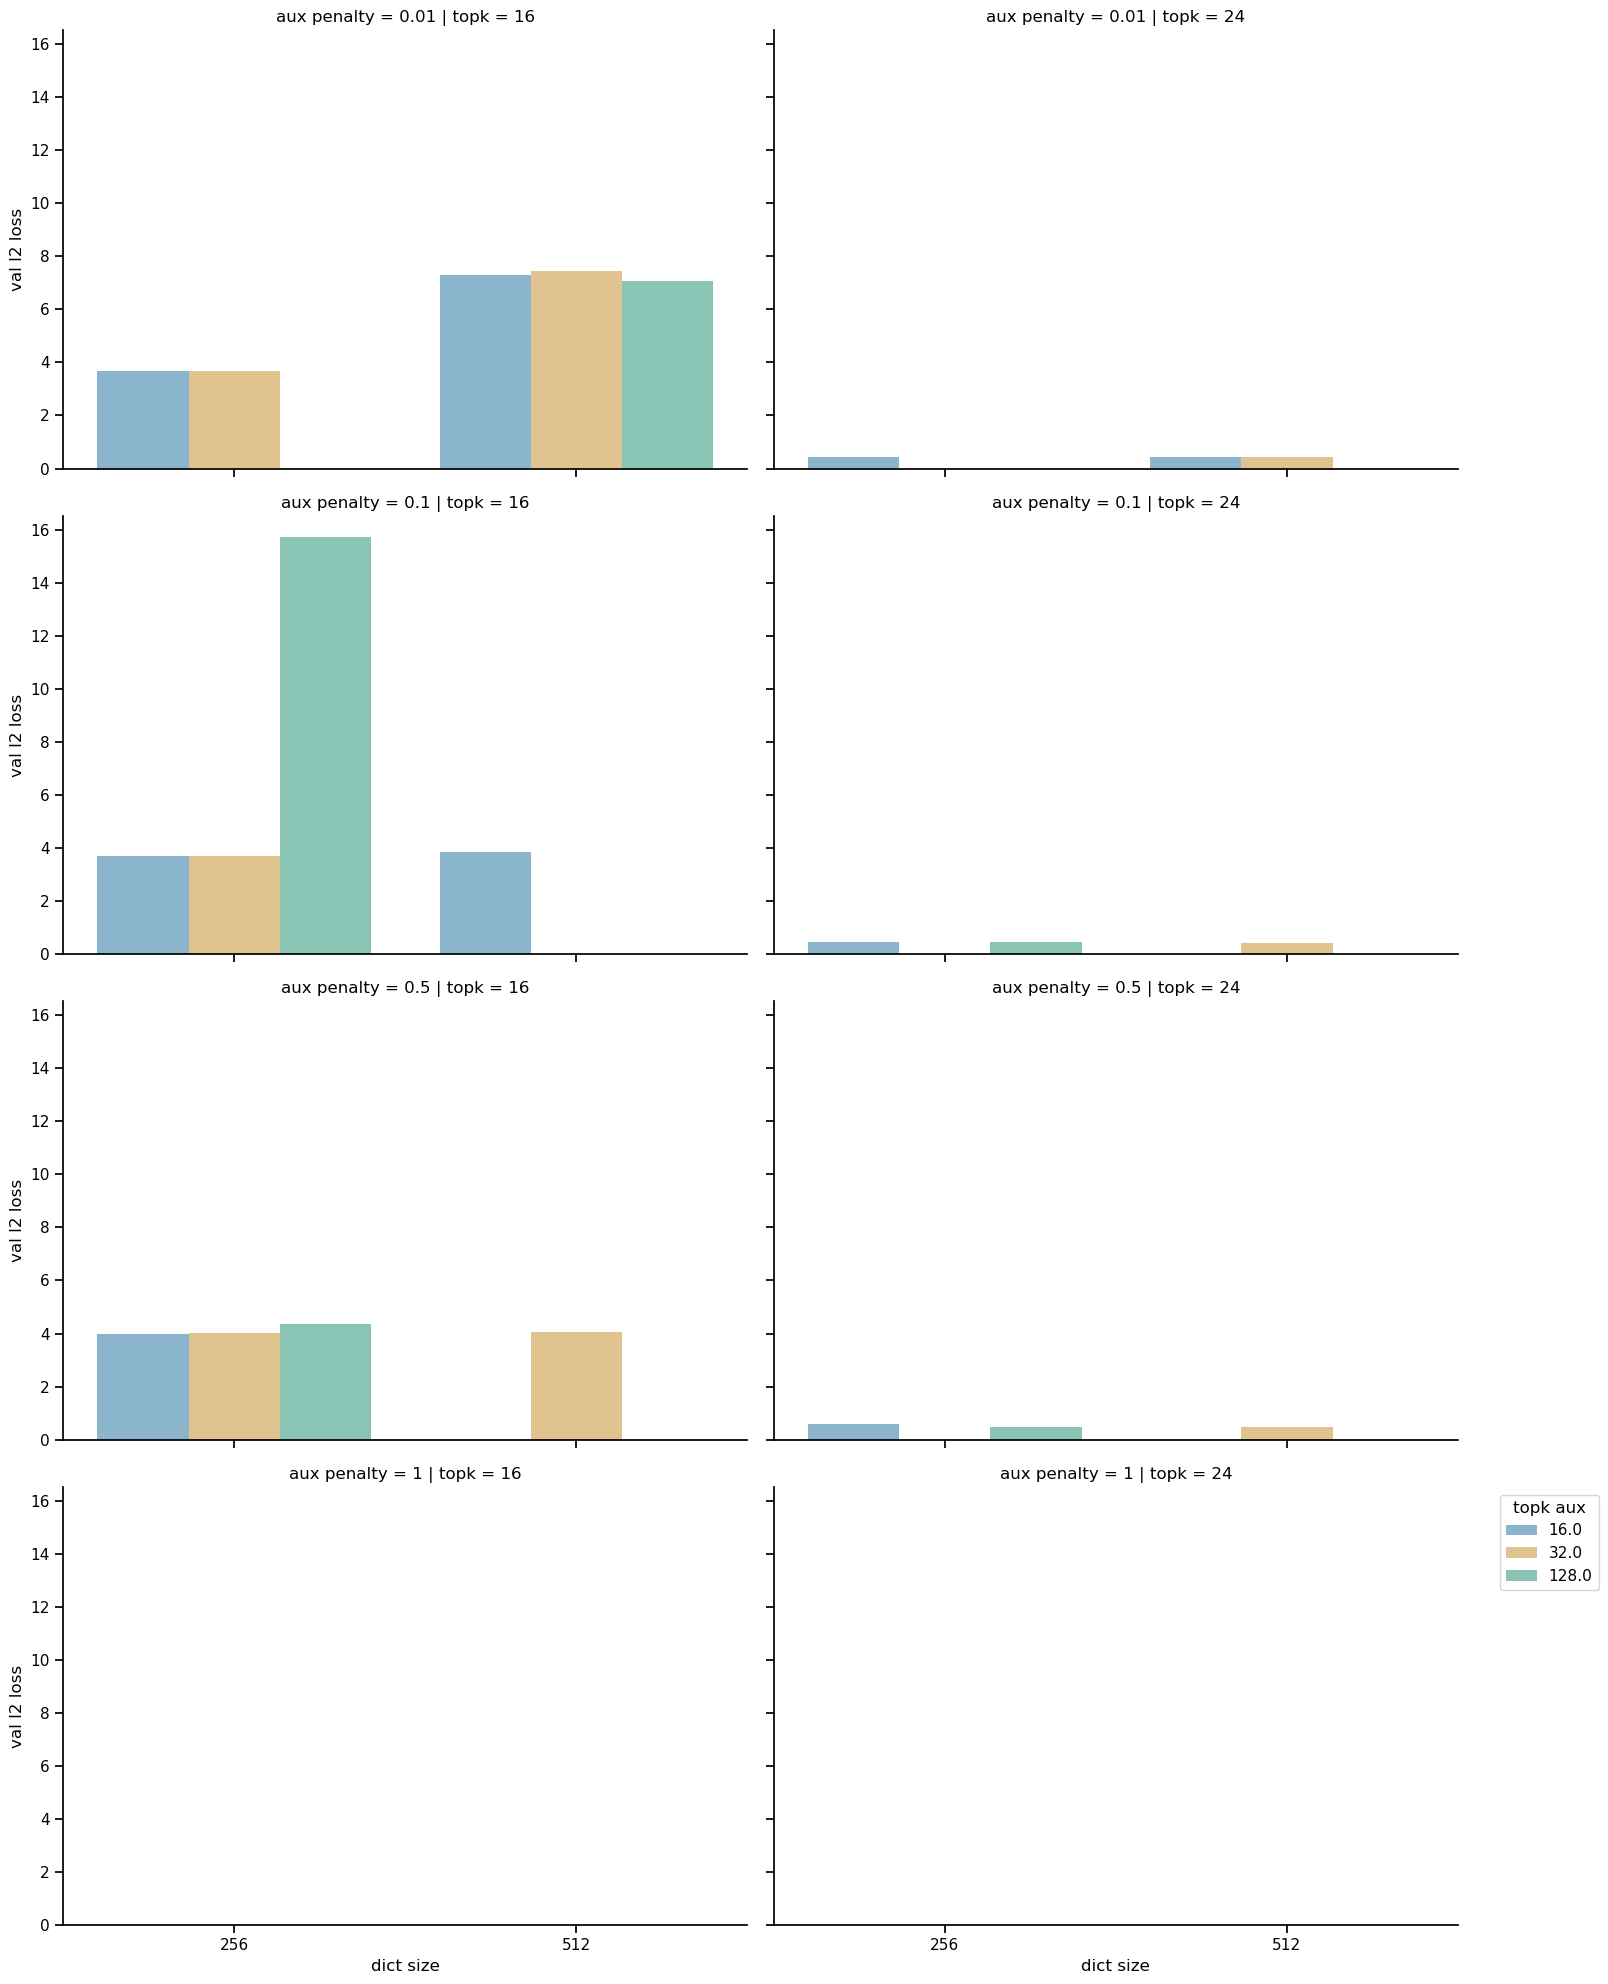

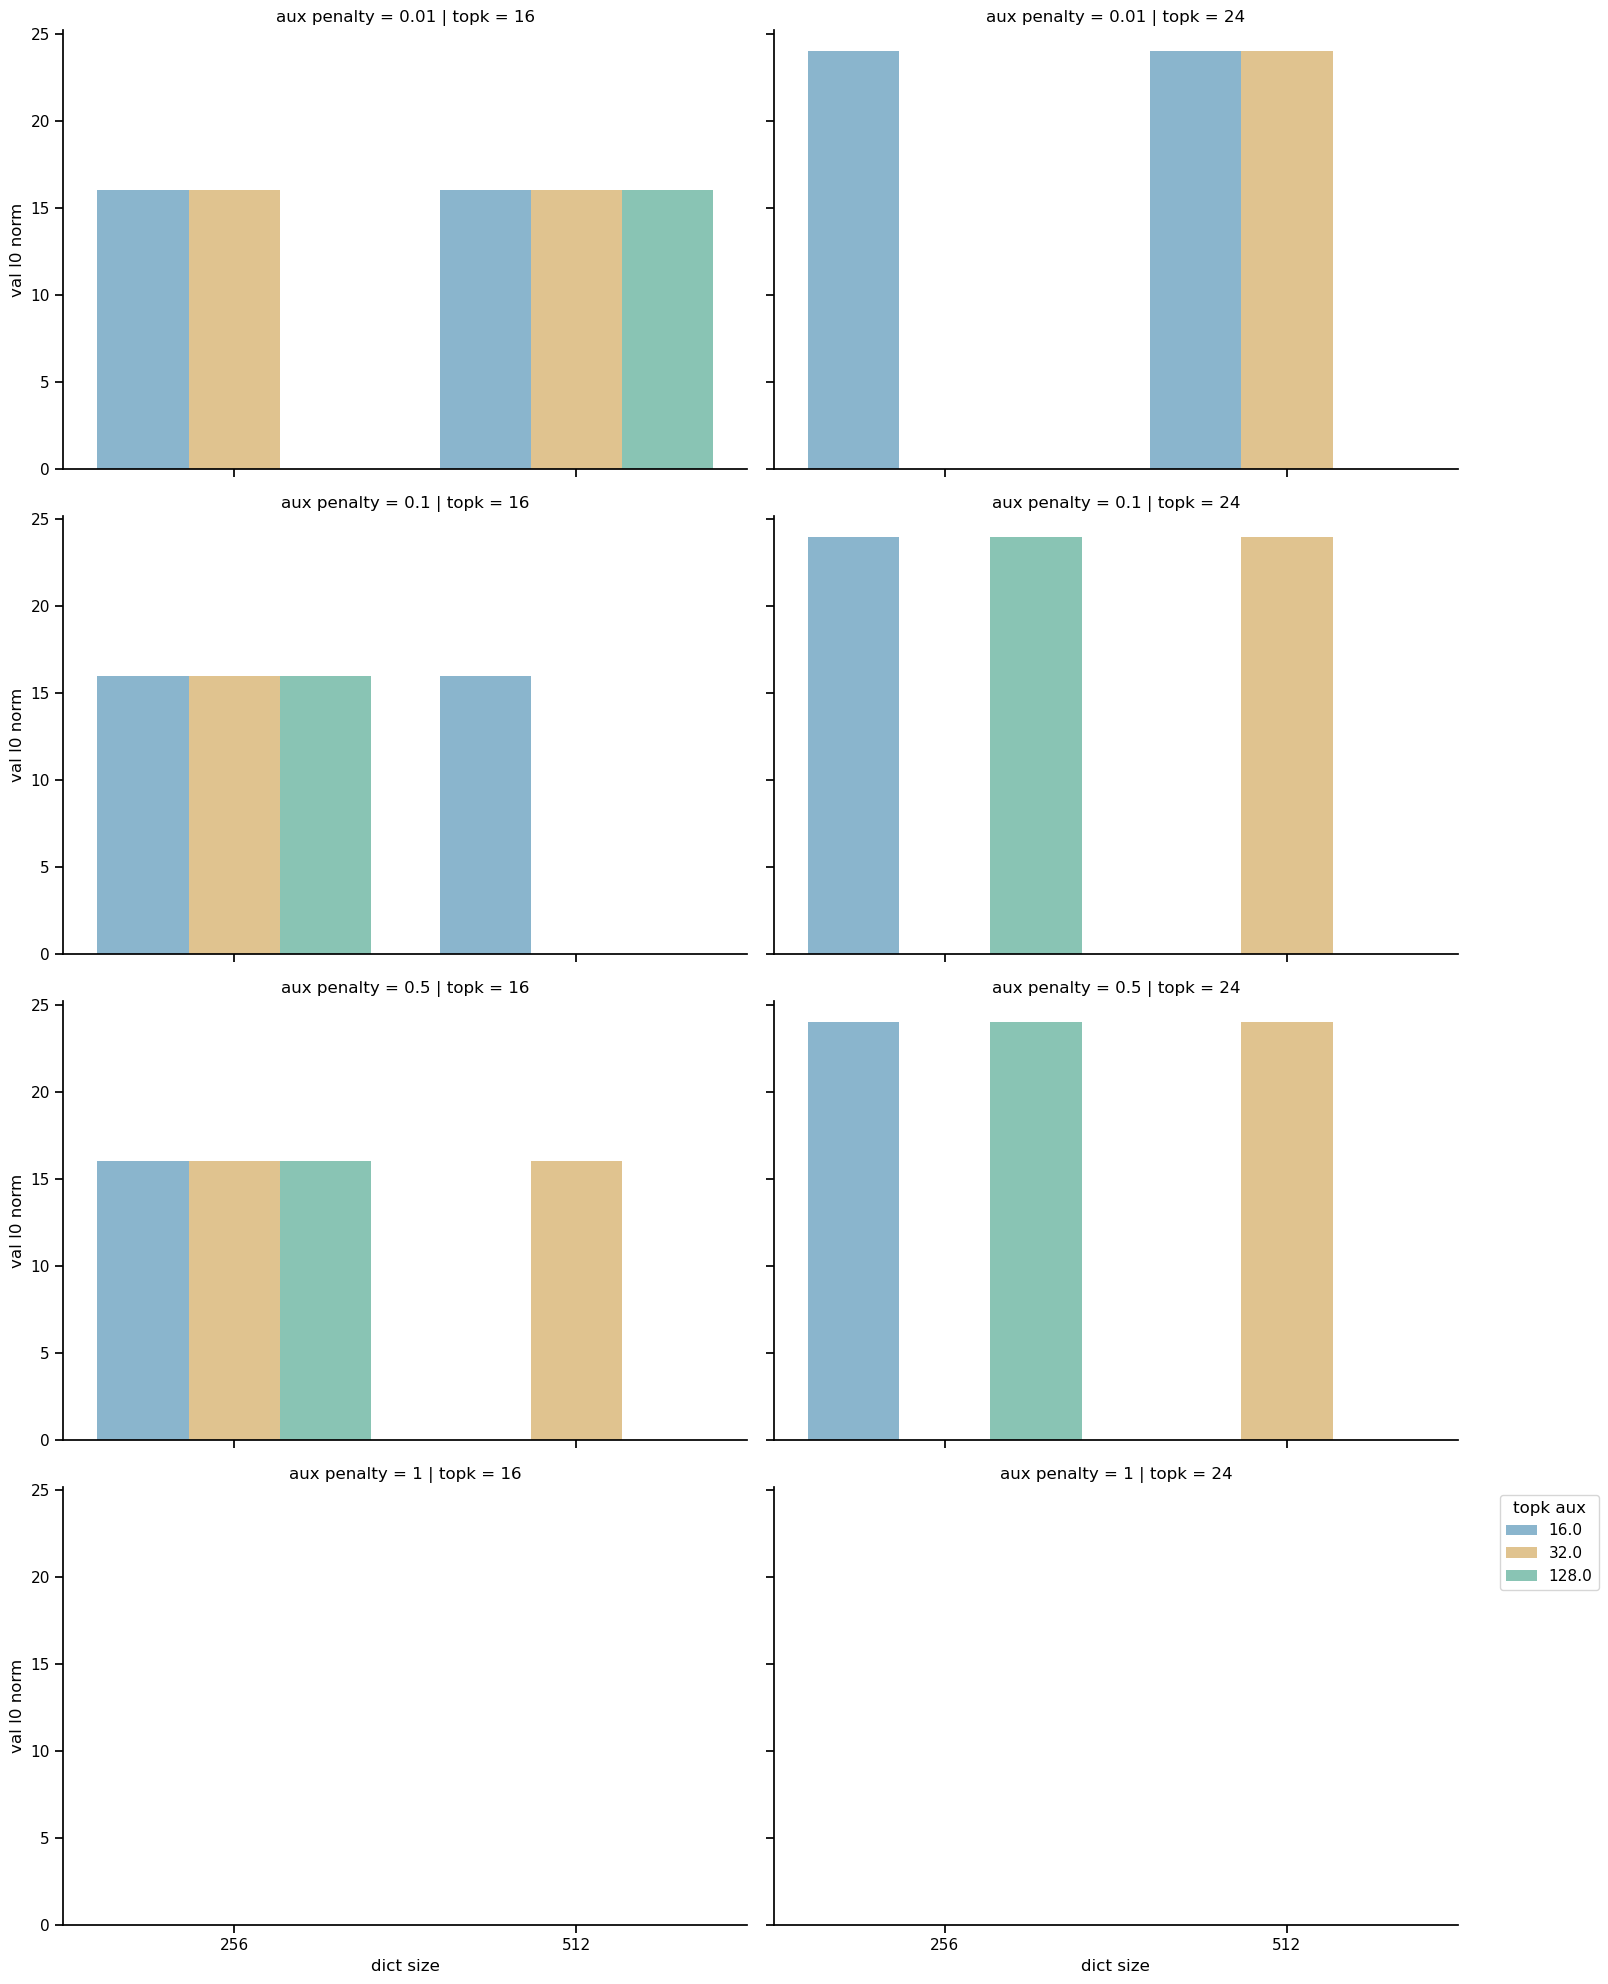

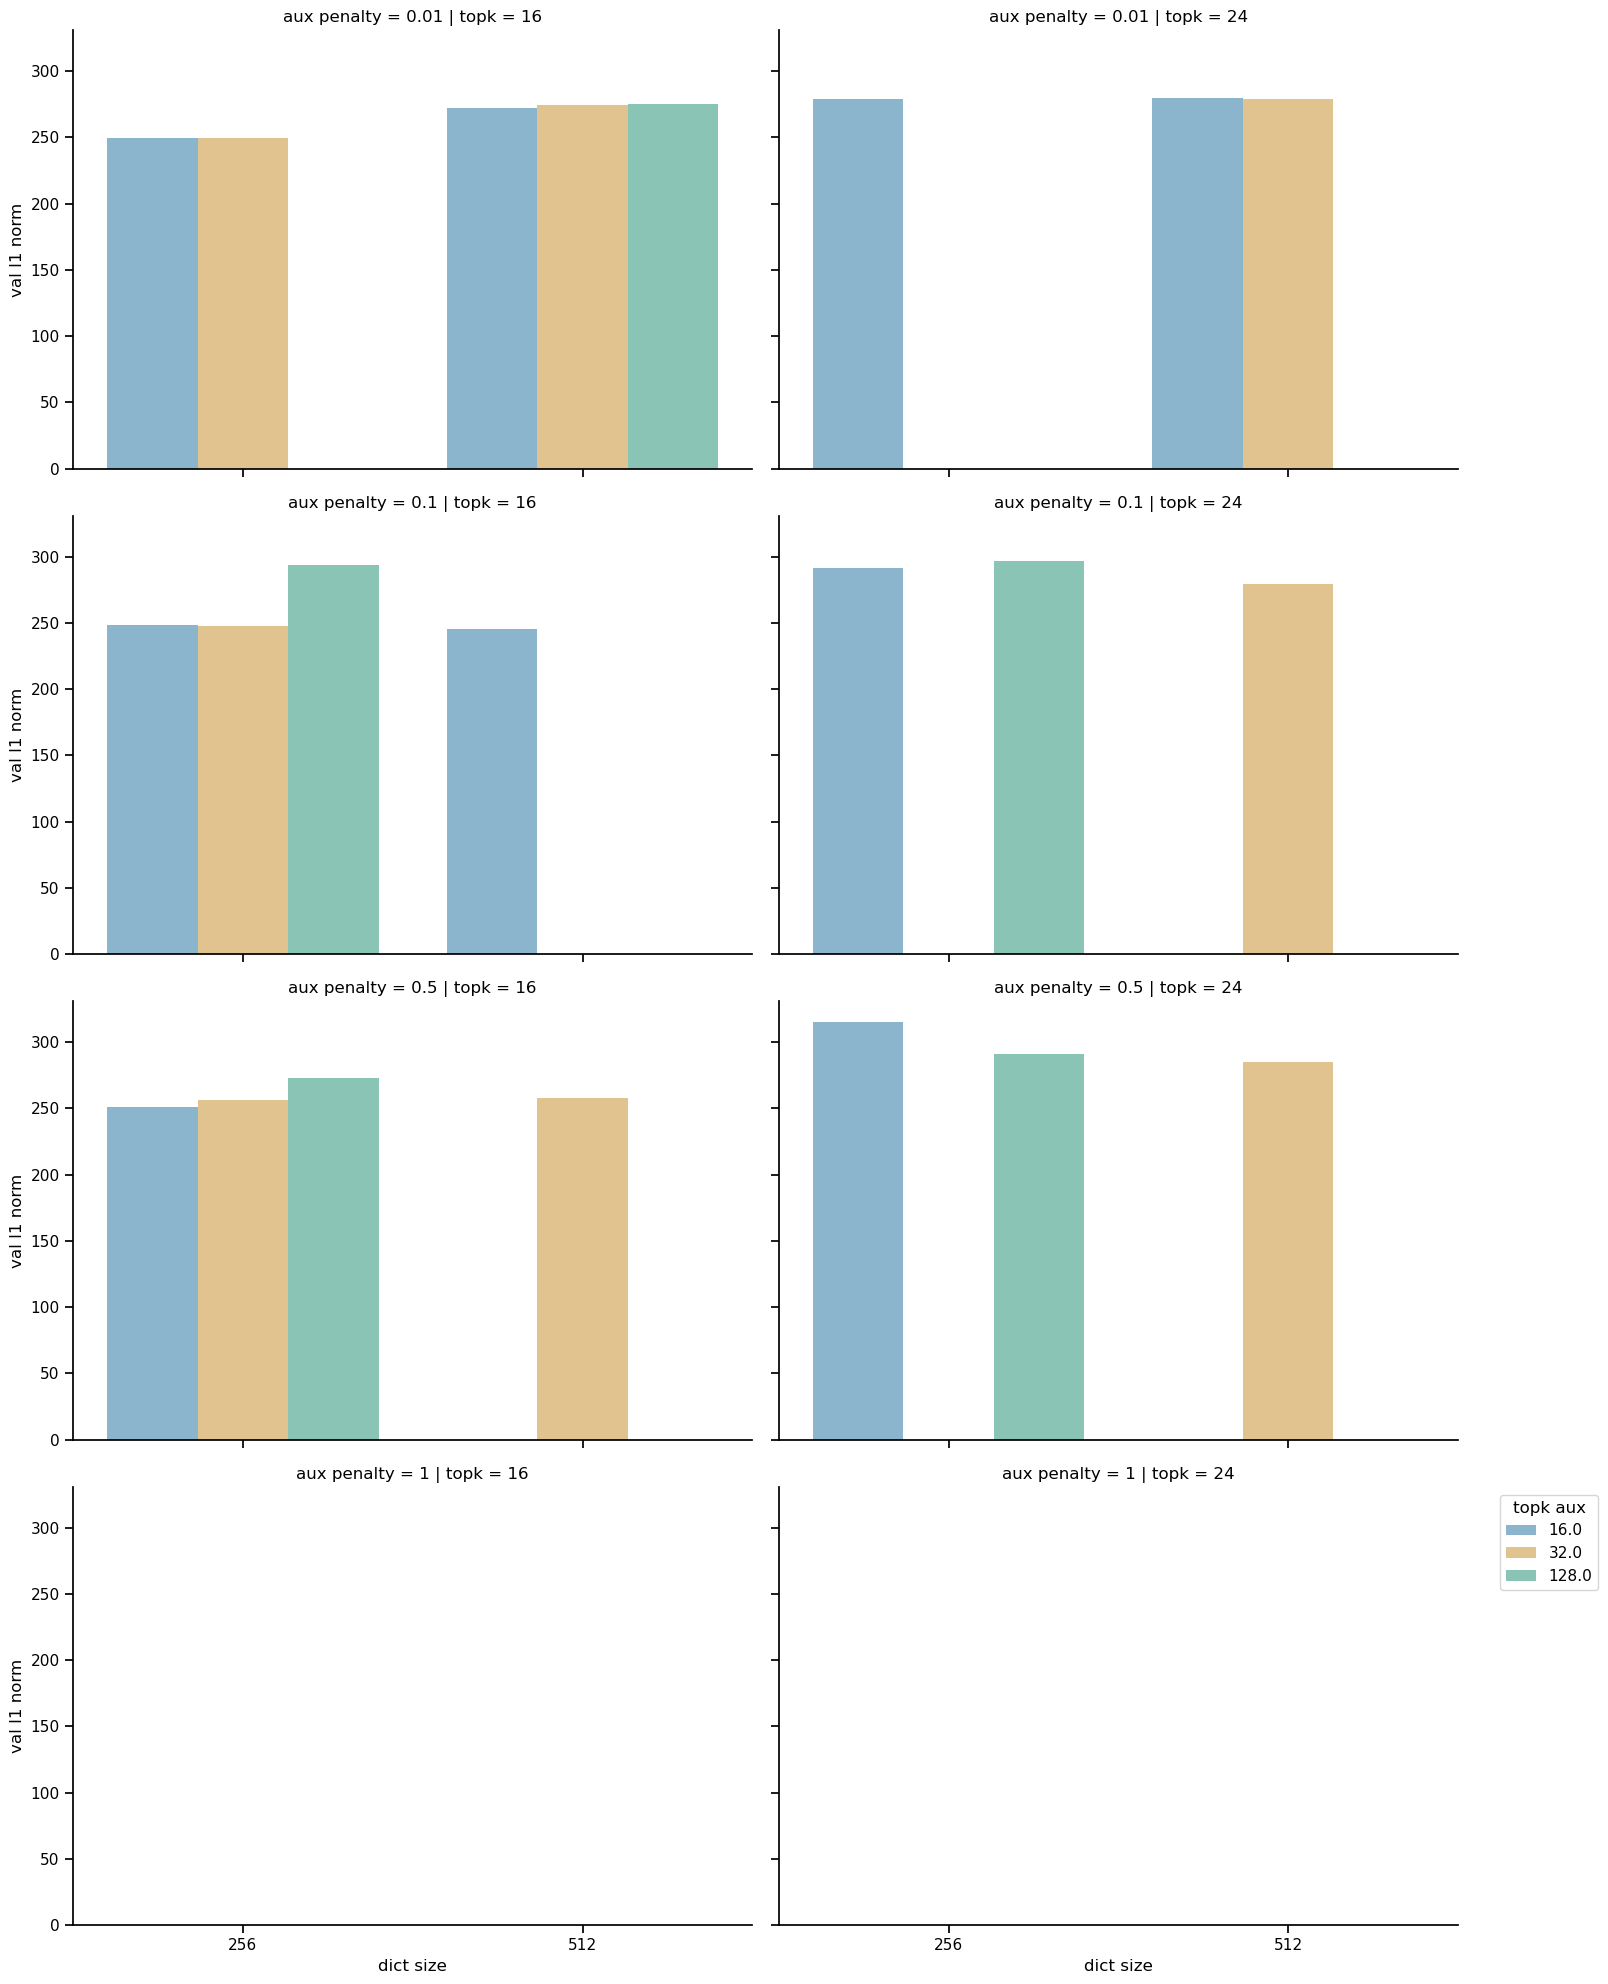

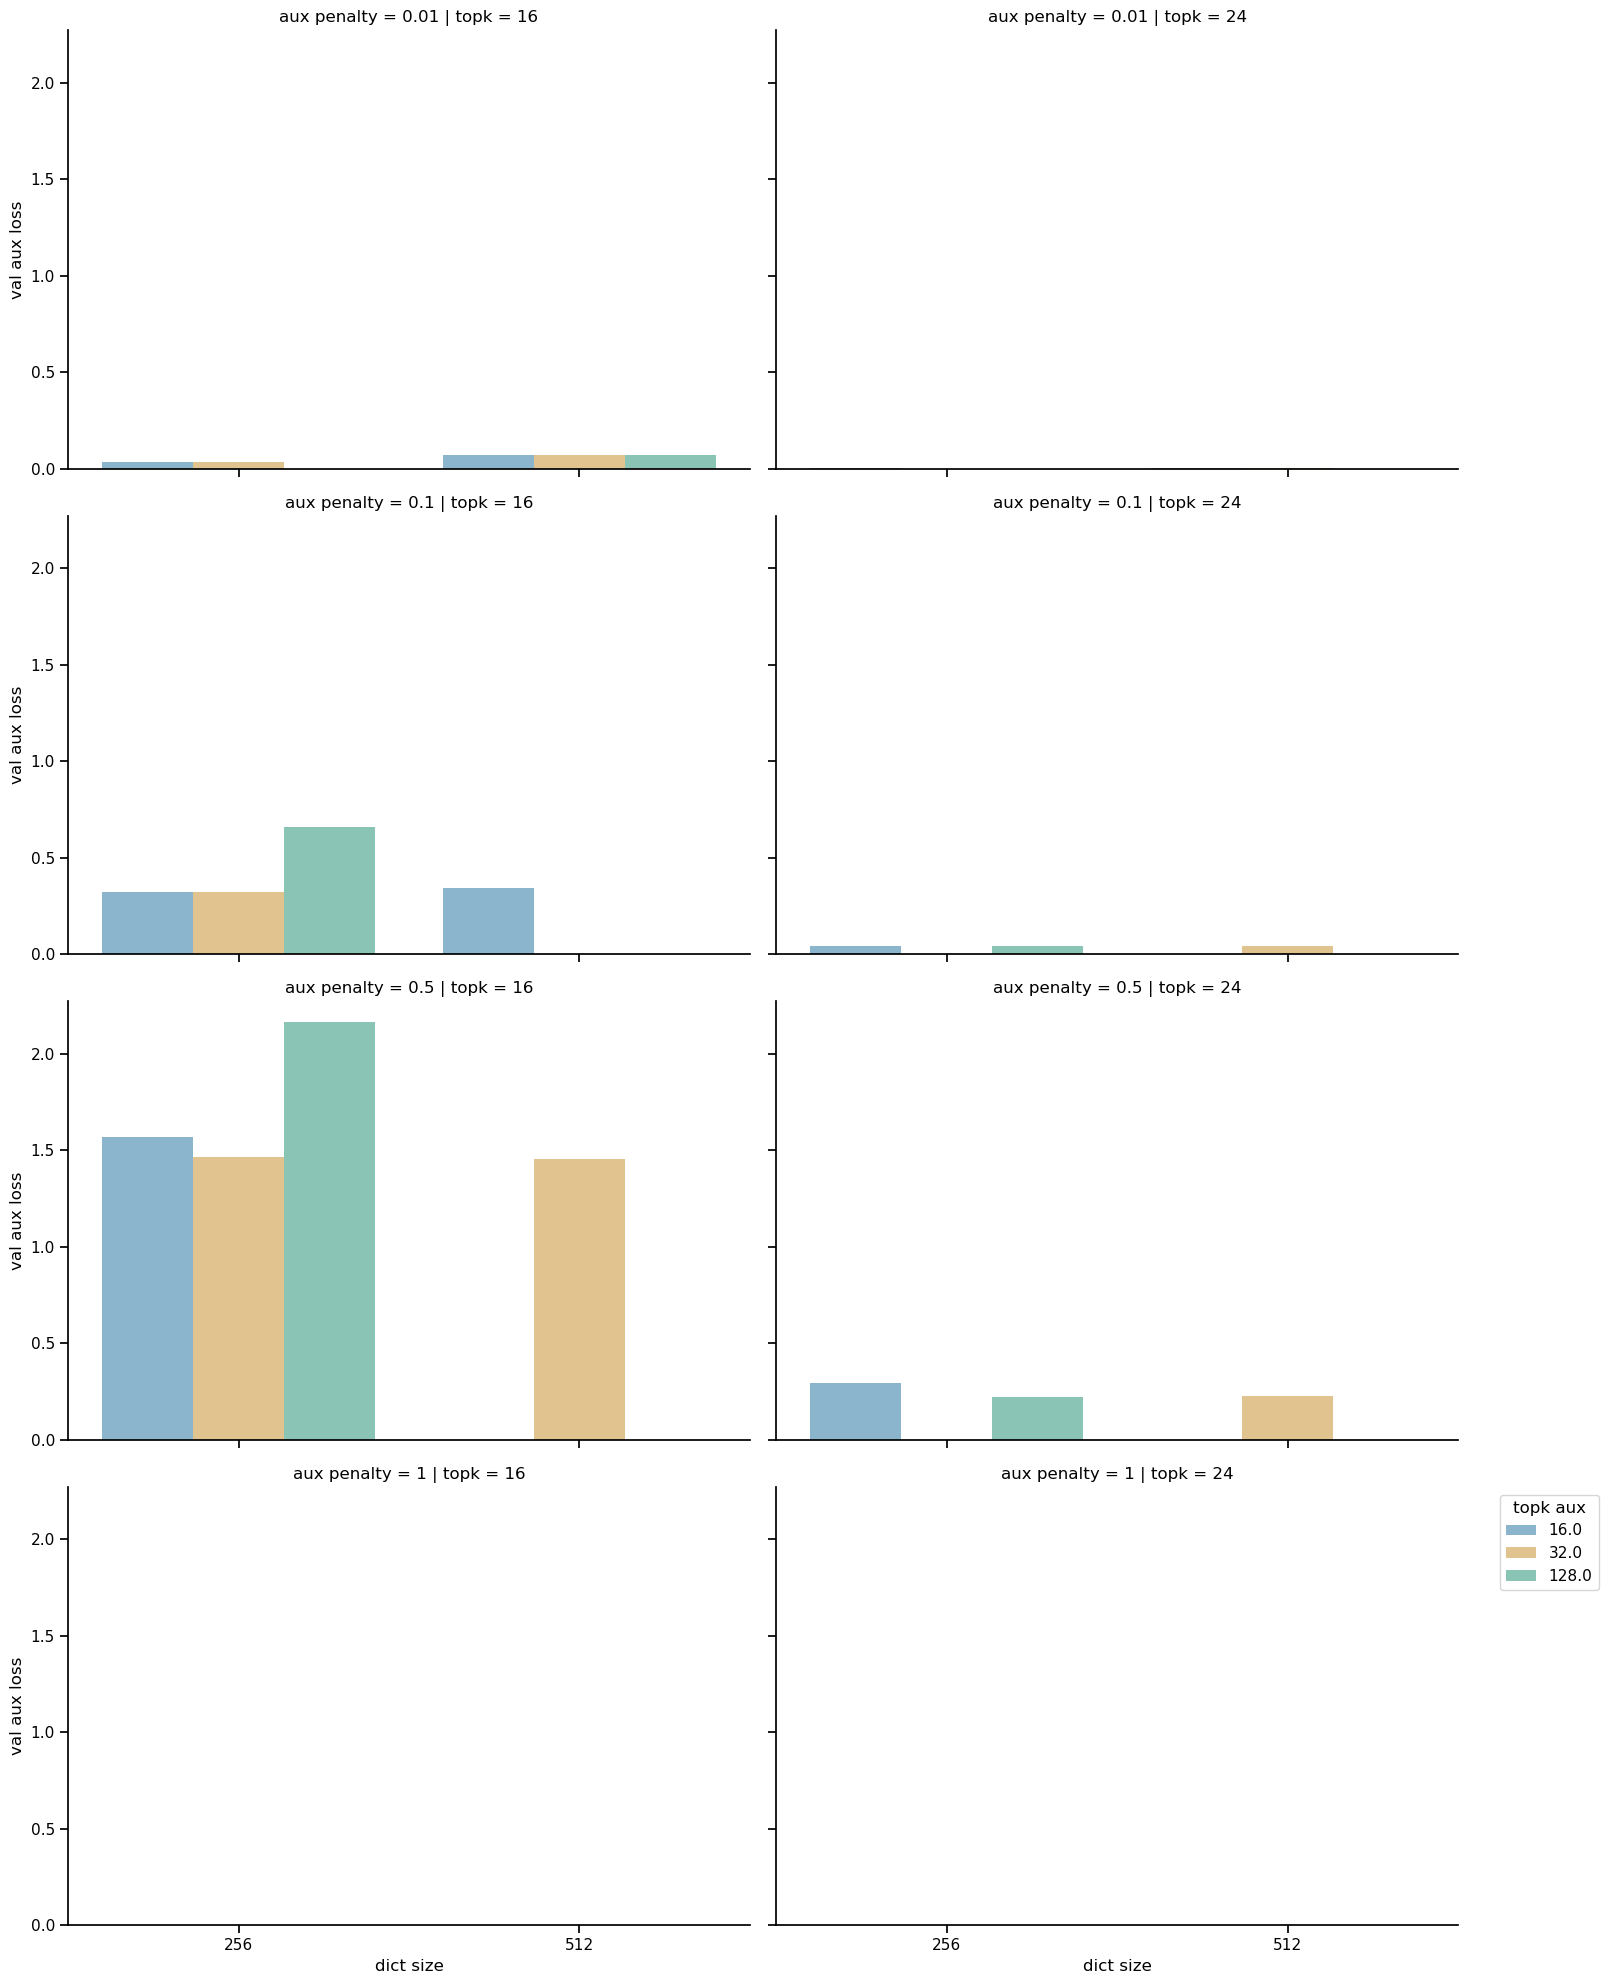

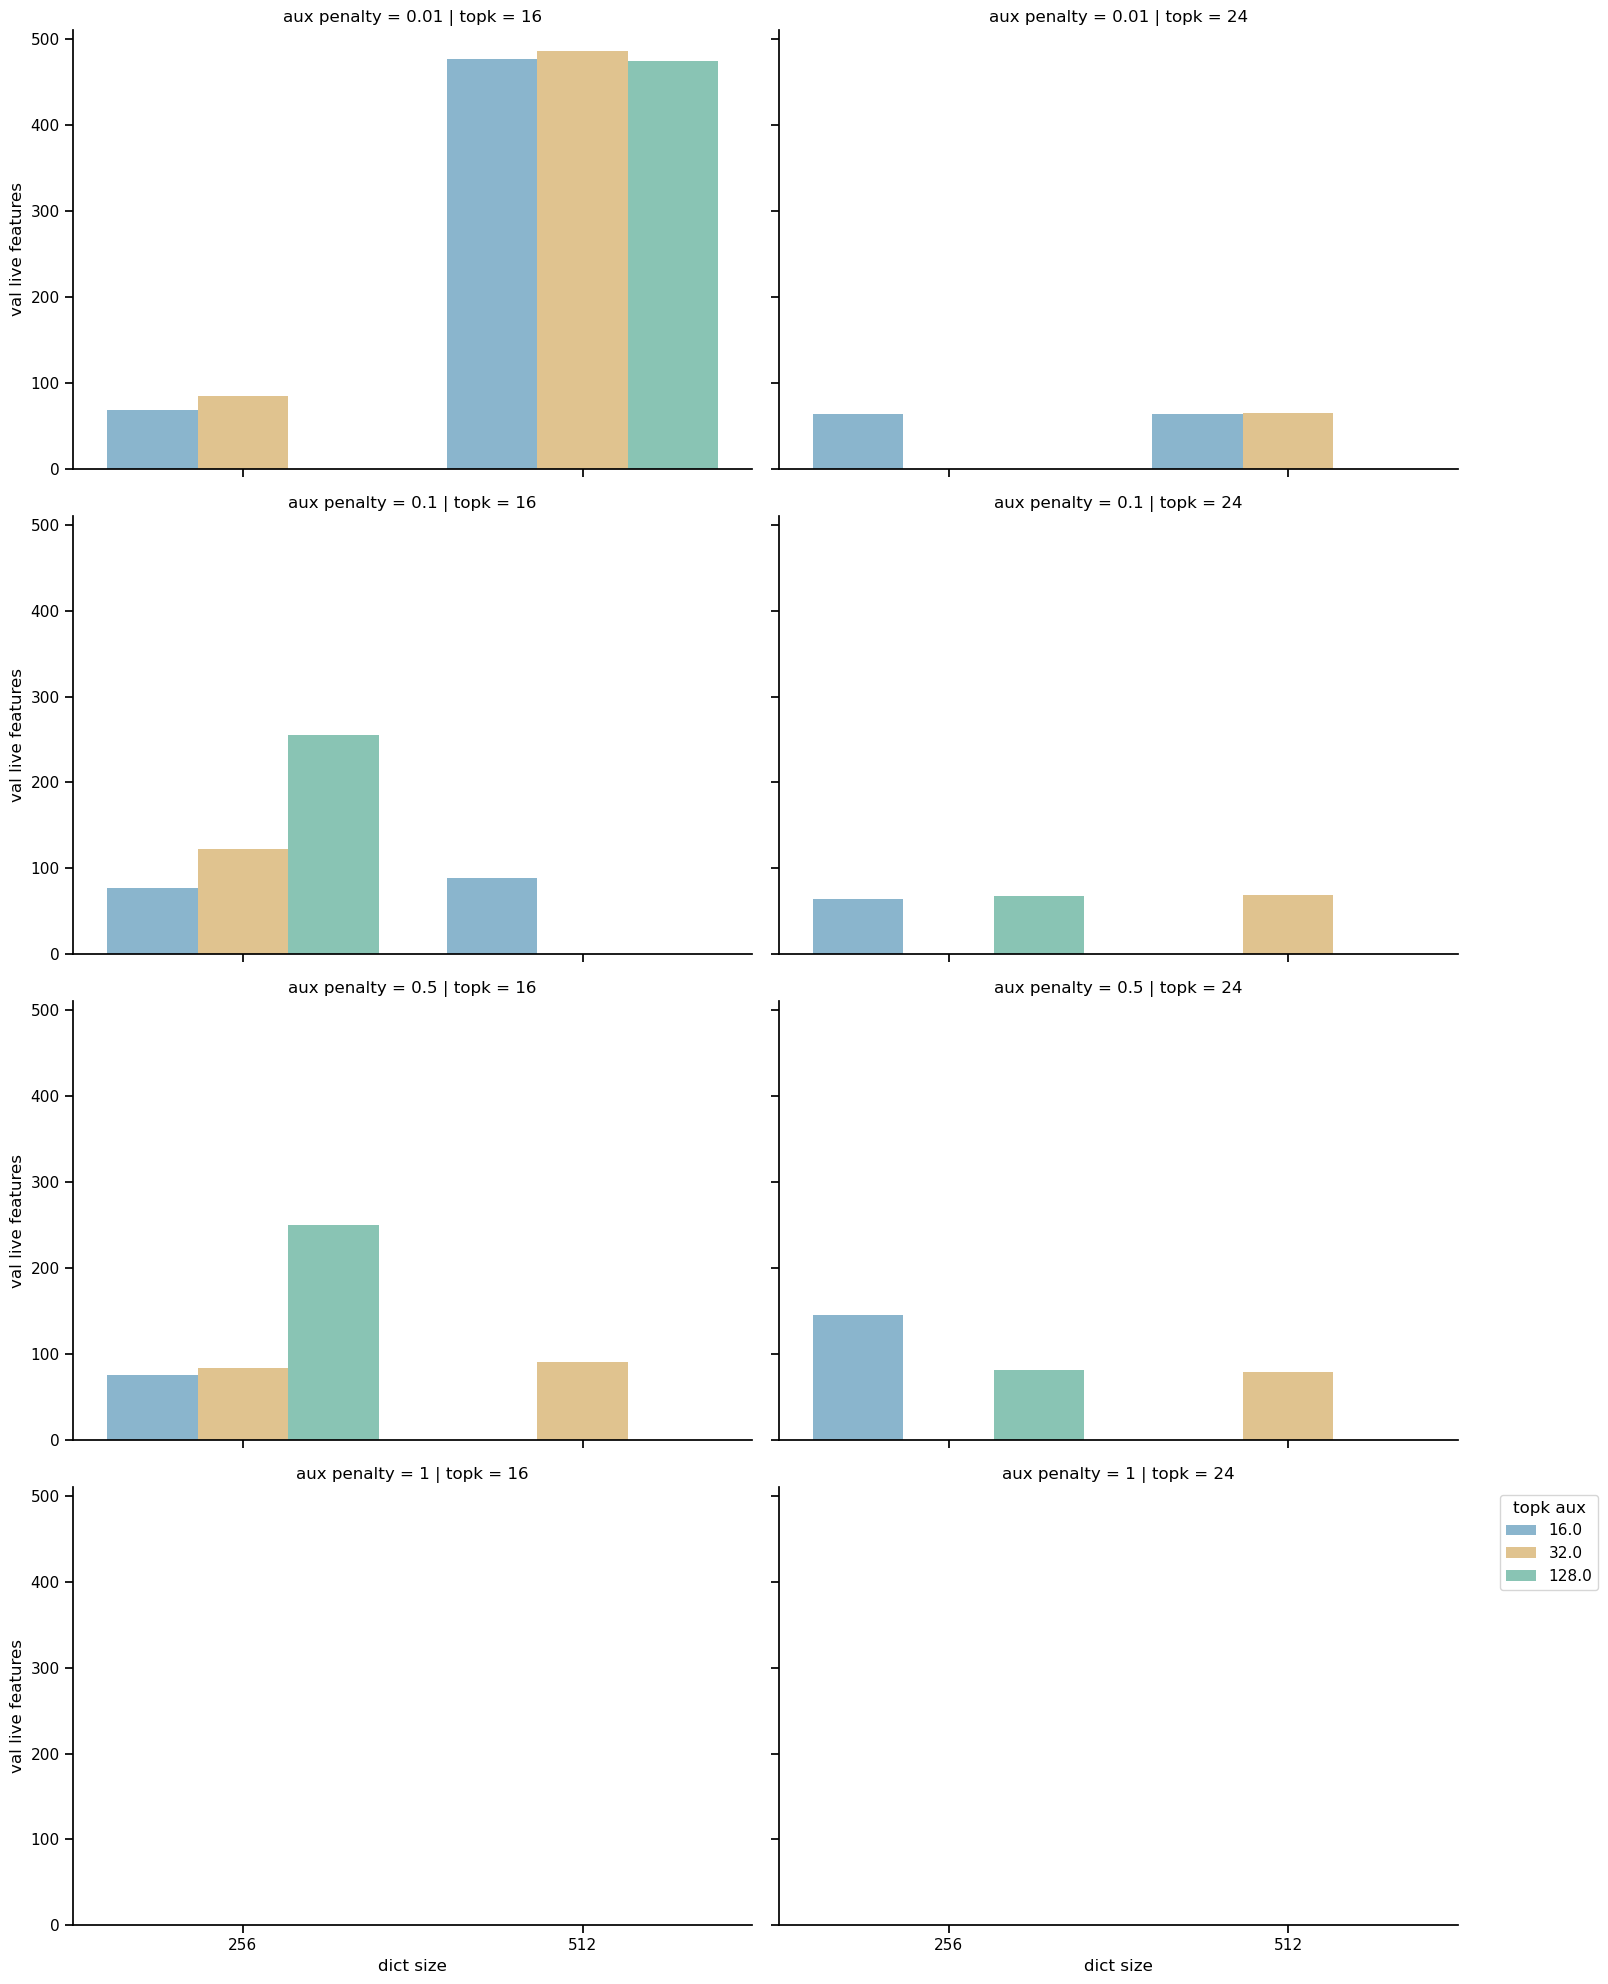

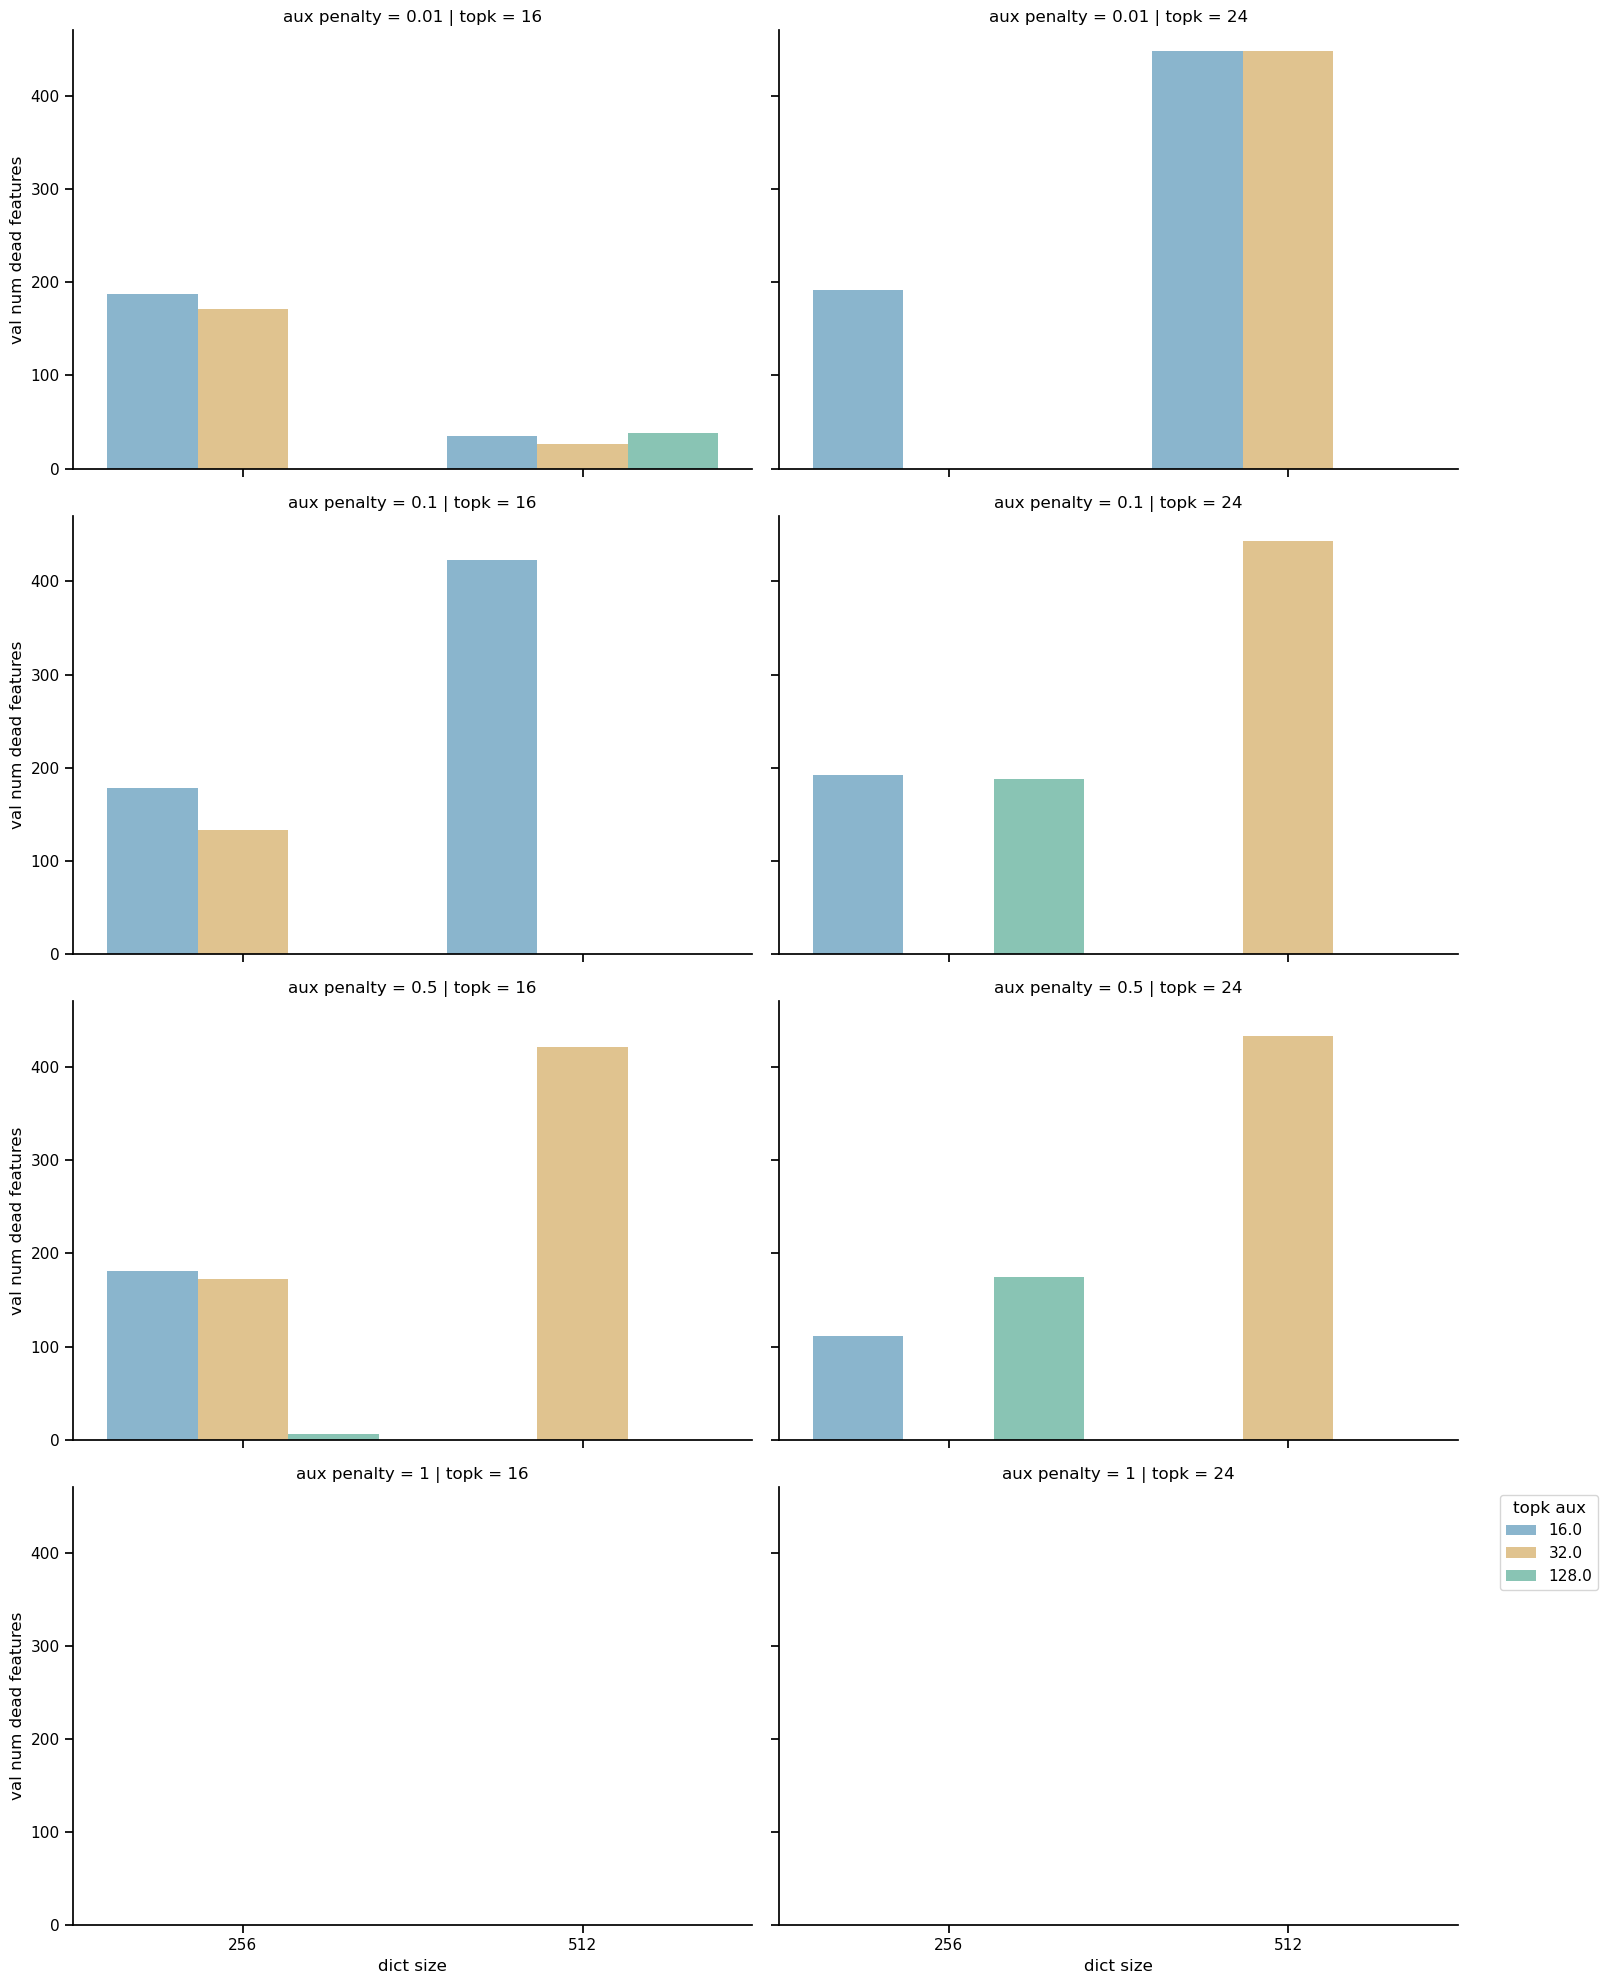

In [94]:
to_plot = bar.copy()
to_plot['topk aux'] = 2 ** np.round(np.log2(to_plot['topk aux']))

to_plot['aux penalty'] = to_plot['aux penalty'].astype(str)
to_plot['topk aux'] = to_plot['topk aux'].astype(str)
row_order = ['0.01', '0.1', '0.5', '1']
hue_order = ['16', '32', '128']
palette = ['C0','C1','C2']
for col in test_cols:
    g = sns.catplot(data=to_plot, kind='bar',
                    y=col, alpha=0.5,
                    row='aux penalty',
                    col='topk',
                    x='dict size',
                    hue='topk aux',
                    row_order=row_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='topk aux',
                    x='dict size',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='topk aux', bbox_to_anchor=(1.05, 1), loc='upper left')


In [71]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v7_hp_sweepHP_sweep'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    test_class_metrics = run.history(samples=1000, keys=['test_num_dead_features','test_loss','test_l1_loss','test_l2_loss','test_l0_norm','test_l1_norm','test_aux_loss'])
    # print(f'{test_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not test_class_metrics.empty):
        metrics = test_class_metrics.drop(columns='_step')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','epoch']

metrics

,,,,Metrics,test_num_dead_features,test_loss,test_l1_loss,test_l2_loss,test_l0_norm,test_l1_norm,test_aux_loss
dict_size,topk,topk_aux,aux_penalty,epoch,,,,,,,
256,16,16,0.5,0,181.933502,5.5714,0,4.006694,16,251.818756,1.564706


In [72]:
metrics.to_csv('./v7_hp_sweepHP_sweep-test_results.csv')

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v7_hp_sweepHP_sweep-test_results.csv',index_col=[0,1,2,3,4], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

,,,,Metrics,test_num_dead_features,test_loss,test_l1_loss,test_l2_loss,test_l0_norm,test_l1_norm,test_aux_loss
dict_size,topk,topk_aux,aux_penalty,epoch,,,,,,,
256,16,16,0.5,0,181.933502,5.5714,0,4.006694,16,251.818756,1.564706


In [74]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ') for col in to_plot.columns]
to_plot['test live features'] = to_plot['dict size'] - to_plot['test num dead features']
display(to_plot)

,dict size,topk,topk aux,aux penalty,epoch,test num dead features,test loss,test l1 loss,test l2 loss,test l0 norm,test l1 norm,test aux loss,test live features
0,256,16,16,0.5,0,181.933502,5.5714,0,4.006694,16,251.818756,1.564706,74.066498


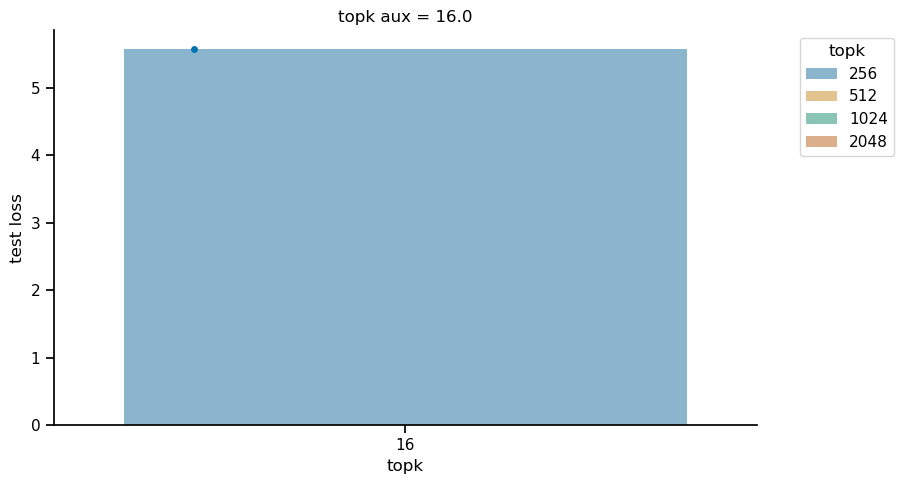

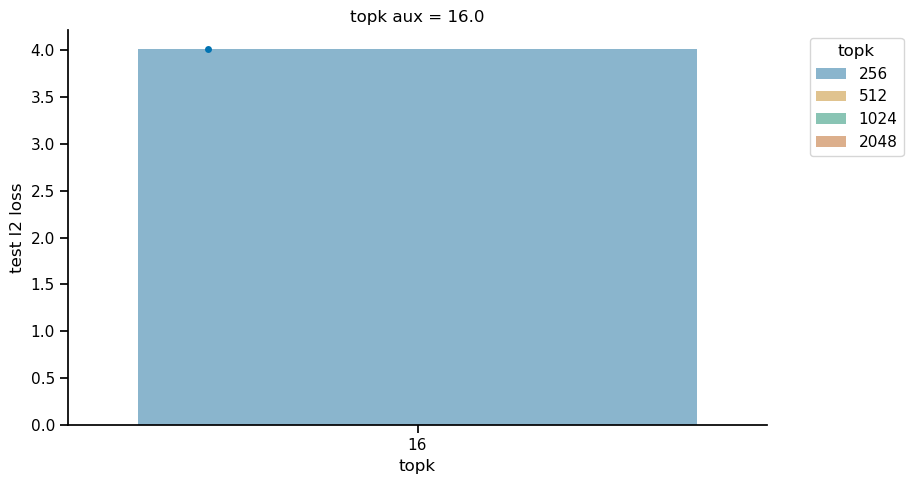

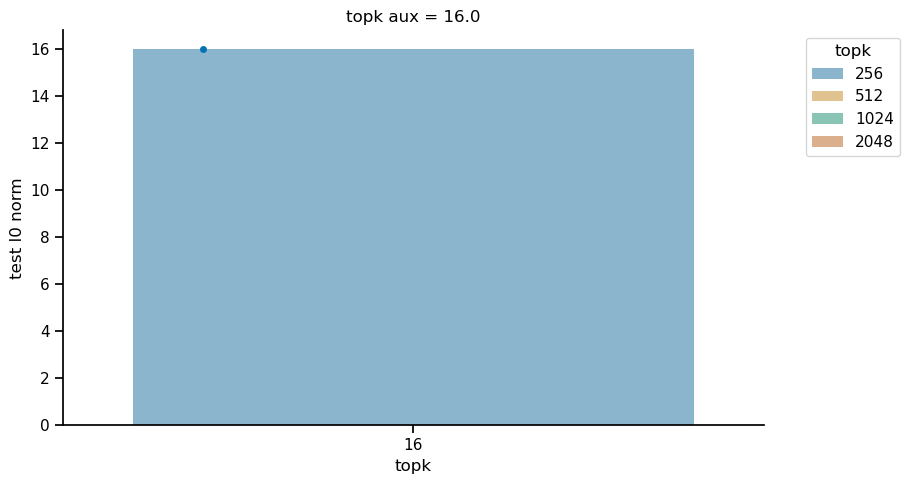

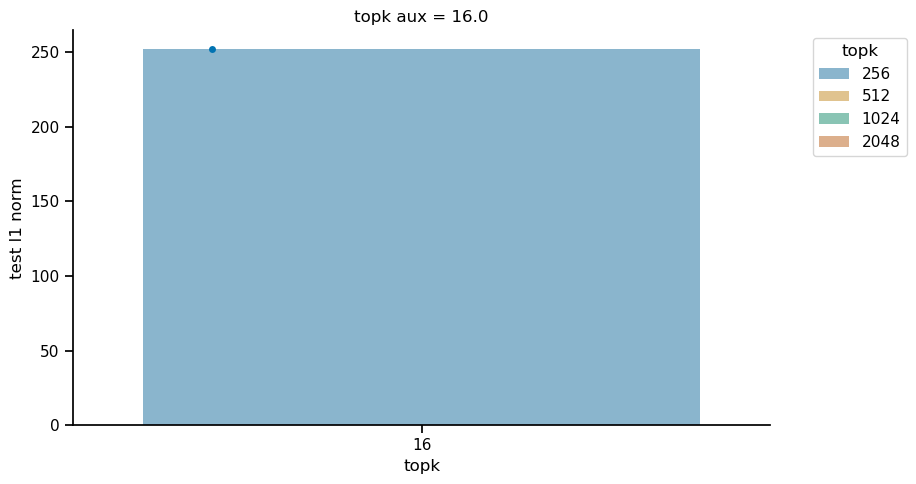

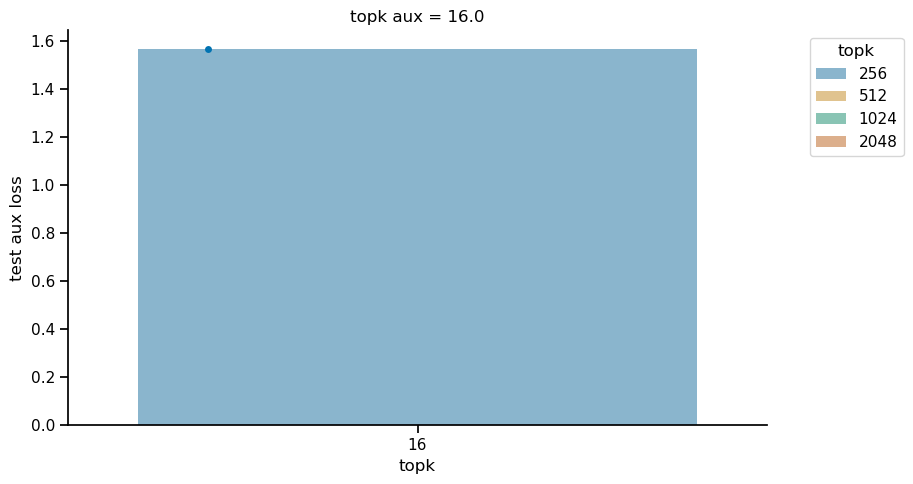

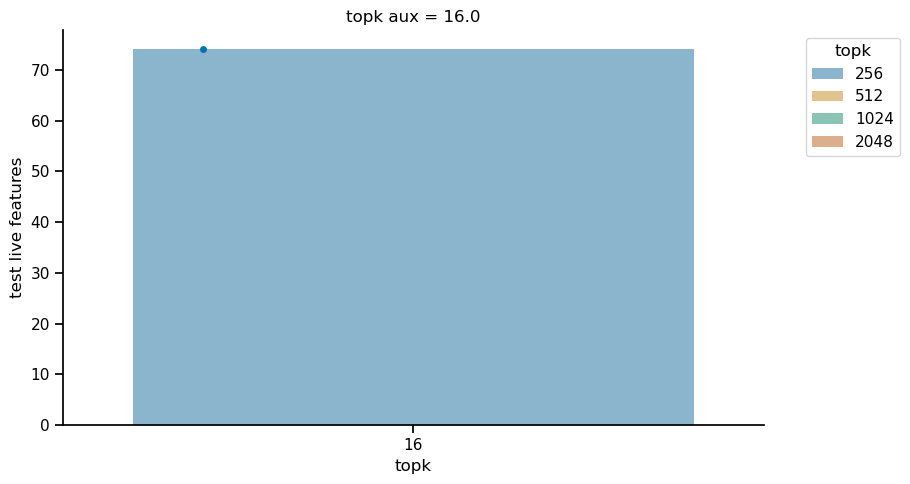

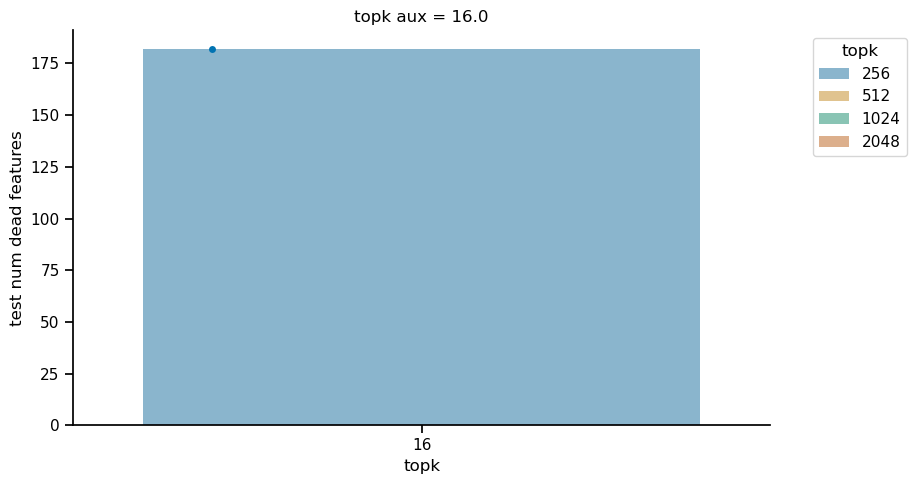

In [75]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ') for col in to_plot.columns]
to_plot['test live features'] = to_plot['dict size'] - to_plot['test num dead features']
to_plot['topk aux'] = 2 ** np.round(np.log2(to_plot['topk aux']))
test_cols = ['test loss', 'test l2 loss', 'test l0 norm', 'test l1 norm', 'test aux loss','test live features','test num dead features']
for col in test_cols:
    g = sns.catplot(data=to_plot, kind='bar',
                    y=col, alpha=0.5,
                    col='topk aux',
                    x='topk',
                    hue='dict size',
                    hue_order=[256, 512, 1024, 2048],
                    palette=['C0','C1','C2','C3'],
                    aspect=1.5, col_wrap=3, legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='dict size',
                    x='topk',
                    hue_order=[256, 512, 1024, 2048],
                    palette=['C0','C1','C2','C3'],
                    dodge=True,
                    legend=False)
    
    plt.legend(title='topk', bbox_to_anchor=(1.05, 1), loc='upper left')
